In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

import numpy as np
import seaborn as sns

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers import GRU
from keras.layers import Bidirectional

from sklearn.svm import SVR
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans


In [2]:
# Load the data
beverage_data = pd.read_excel('Beverage manufacturing data.xlsx')

# Display the first few rows and the columns to understand its structure
print(beverage_data.head())
print(beverage_data.columns)


                         Indicator Company  Year  Value Category  \
0       - Accumulated depreciation     BHN  2020   -6.0   ASSETS   
1       - Accumulated depreciation     BHN  2021   -7.0   ASSETS   
2       - Accumulated depreciation     BHN  2022   -8.0   ASSETS   
3       - Accumulated depreciation     SAB  2020  -27.0   ASSETS   
4       - Accumulated depreciation     SAB  2021  -26.0   ASSETS   

               Category 2  
0     B. LONG-TERM ASSETS  
1     B. LONG-TERM ASSETS  
2     B. LONG-TERM ASSETS  
3     B. LONG-TERM ASSETS  
4     B. LONG-TERM ASSETS  
Index(['Indicator', 'Company', 'Year', 'Value', 'Category', 'Category 2'], dtype='object')


In [17]:
# Display the unique values in the 'Indicator' column to understand its content
unique_indicators = beverage_data['Indicator'].unique()
print(unique_indicators)

['\xa0\xa0\xa0\xa0\xa0- Accumulated depreciation'
 '\xa0\xa0\xa0\xa0\xa0- Accumulated retained earning at the end of the previous period'
 '\xa0\xa0\xa0\xa0\xa0- Common stock with voting right'
 '\xa0\xa0\xa0\xa0\xa0- Cost'
 '\xa0\xa0\xa0\xa0\xa0- Undistributed earnings in this period'
 '\xa0\xa0\xa0\xa0\xa0\xa0- Accumulated depreciation'
 '\xa0\xa0\xa0\xa0\xa0\xa0- Cost' "\xa0\xa0\xa0\xa0\xa01. Owner's capital"
 '\xa0\xa0\xa0\xa0\xa01. Tangible fixed assets'
 '\xa0\xa0\xa0\xa0\xa011. Undistributed earnings after tax'
 '\xa0\xa0\xa0\xa0\xa02. Financial leased fixed assets'
 '\xa0\xa0\xa0\xa0\xa03. Intangible fixed assets'
 '\xa0\xa0\xa0\xa01. Cash' '\xa0\xa0\xa0\xa01. Inventories'
 '\xa0\xa0\xa0\xa01. Long-term prepayments'
 '\xa0\xa0\xa0\xa01. Long-term trade payables'
 '\xa0\xa0\xa0\xa01. Long-term trade receivables'
 '\xa0\xa0\xa0\xa01. Short-term prepayments'
 '\xa0\xa0\xa0\xa01. Short-term trade accounts payable'
 '\xa0\xa0\xa0\xa01. Short-term trade accounts receivable'
 '\xa0\xa

In [3]:
# Replace missing values with "Unknown"
beverage_data['Category'].fillna('Unknown', inplace=True)
beverage_data['Category 2'].fillna('Unknown', inplace=True)

# Ensure all values in 'Indicator' column are strings
beverage_data['Indicator'] = beverage_data['Indicator'].astype(str).str.strip()

# Verify the changes
beverage_data.isnull().sum()


/var/folders/57/3tgq502n7y31r_7lgrpyp6cc0000gn/T/ipykernel_11298/2716560748.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  beverage_data['Category'].fillna('Unknown', inplace=True)
/var/folders/57/3tgq502n7y31r_7lgrpyp6cc0000gn/T/ipykernel_11298/2716560748.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

Indicator     0
Company       0
Year          0
Value         0
Category      0
Category 2    0
dtype: int64

In [5]:
# Identify non-numeric columns
non_numeric_columns = beverage_data.select_dtypes(include=['object']).columns
print("Non-numeric columns before encoding:", non_numeric_columns)

Non-numeric columns before encoding: Index(['Indicator', 'Company', 'Category', 'Category 2'], dtype='object')


In [6]:
# Encode categorical columns
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    beverage_data[column] = label_encoder.fit_transform(beverage_data[column])
# Verify encoding
non_numeric_columns = beverage_data.select_dtypes(include=['object']).columns
print("Non-numeric columns after encoding:", non_numeric_columns)

Non-numeric columns after encoding: Index([], dtype='object')


In [7]:
# Normalize the 'Value' column
scaler = StandardScaler()
beverage_data['Value'] = scaler.fit_transform(beverage_data[['Value']])
# Display the first few rows of the preprocessed data
beverage_data.head()

,Indicator,Company,Year,Value,Category,Category 2
0,4,0,2020,-0.180585,0,21
1,4,0,2021,-0.180879,0,21
2,4,0,2022,-0.181173,0,21
3,4,3,2020,-0.186758,0,21
4,4,3,2021,-0.186464,0,21


In [8]:
# Summary statistics
desc_stats = beverage_data.describe()
print(desc_stats)



         Indicator      Company         Year         Value     Category  \
count  4558.000000  4558.000000  4558.000000  4.558000e+03  4558.000000   
mean    110.351251     3.969724  2020.985739 -6.235566e-18     2.412023   
std      64.982300     2.566039     0.818654  1.000110e+00     1.621816   
min       0.000000     0.000000  2020.000000 -6.833770e+00     0.000000   
25%      53.000000     2.000000  2020.000000 -1.785277e-01     1.000000   
50%     115.000000     4.000000  2021.000000 -1.751401e-01     3.000000   
75%     165.000000     6.000000  2022.000000 -1.541201e-01     4.000000   
max     219.000000     8.000000  2022.000000  1.821011e+01     6.000000   

        Category 2  
count  4558.000000  
mean     11.661913  
std       7.359719  
min       0.000000  
25%       5.000000  
50%      11.000000  
75%      20.000000  
max      22.000000  


In [9]:
# Convert 'Value' column to numeric data type (ensuring any errors are coerced to NaNs)
beverage_data['Value'] = pd.to_numeric(beverage_data['Value'], errors='coerce')

# Drop rows with NaN values in 'Value' column if any exist after conversion
beverage_data = beverage_data.dropna(subset=['Value'])


In [10]:
# Verify the unique values in the 'Indicator' column to find the exact string for Quick Ratio
unique_indicators = beverage_data['Indicator'].unique()
print("Unique indicators:", unique_indicators)


Unique indicators: [  4   5   6   7   8  14  22  29  46  58   9  10  11  12  13  18  19  20
  21  24  25  26  28  31  32  33  34  42  43  45  47  48  49  50  52  53
  54  55  57  59  61  65  66  68  69  70  72  75  76  78  79  80  84  85
  88  89  90  91  92  93  94  96  97 141 142 143 144 145 146 147 148 149
 150 151 152 216 217 218  99 100 105 106 219 210 211   0   1   2   3  15
  16  17  23  27  30  35  36  37  38  39  40  41  44  51  56  60  62  63
  64  67  71  73  74  77  81  82  83  86  87  95  98 101 102 103 104 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 131 132 129 130 133 134 135 136 137 138 139 140 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 178 179 177 180 181 182 183 184 185 186 187 188 189 192 193
 194 195 196 197 198 199 200 201 202 190 191 203 204 205 206 207 208 209
 212 213 214 215]


Filtered Data:
Empty DataFrame
Columns: [Indicator, Company, Year, Value, Category, Category 2]
Index: []
Aggregated Data:
Empty DataFrame
Columns: [Company Group, Year, Value]
Index: []
Pivoted Data:
Empty DataFrame
Columns: []
Index: []


/var/folders/57/3tgq502n7y31r_7lgrpyp6cc0000gn/T/ipykernel_11298/245919589.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


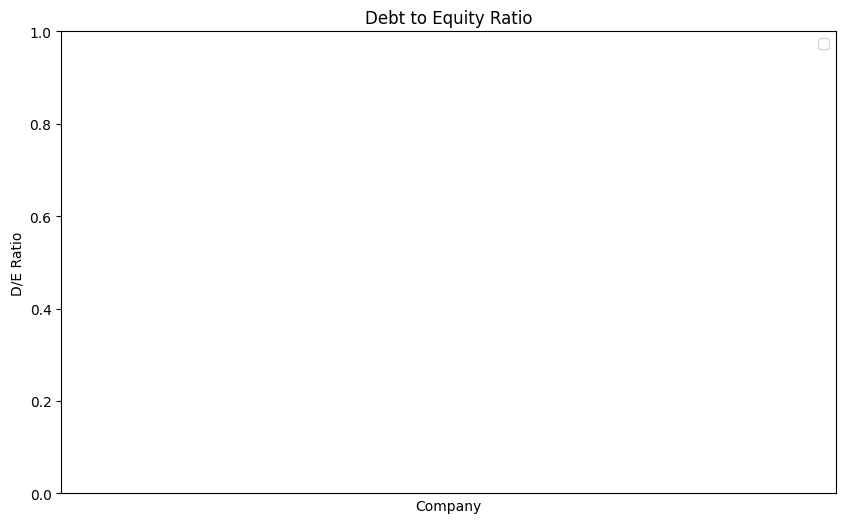

In [11]:
# Use the exact string value for 'Debt to Equity' found in the unique values
debt_to_equity_indicator = 'Debt to equity'  # Replace this with the correct string if different

# Filter data for Debt to Equity Ratio
debt_to_equity = beverage_data[beverage_data['Indicator'] == debt_to_equity_indicator].copy()
print("Filtered Data:")
print(debt_to_equity)

# Create a new column 'Company Group' to categorize SABECO and other companies
debt_to_equity['Company Group'] = debt_to_equity['Company'].apply(lambda x: 'SABECO' if x == 'SAB' else 'Beverage Manufacturing')

# Aggregate the data by 'Company Group' and 'Year'
aggregated_data = debt_to_equity.groupby(['Company Group', 'Year'])['Value'].mean().reset_index()
print("Aggregated Data:")
print(aggregated_data)

# Pivot the DataFrame
debt_to_equity_pivot = aggregated_data.pivot(index='Company Group', columns='Year', values='Value')
print("Pivoted Data:")
print(debt_to_equity_pivot)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each year
width = 0.2  # Adjusted bar width for better spacing
positions = list(range(len(debt_to_equity_pivot.index)))  # Bar positions

# Create a list of positions for each year
year_positions = [[p + width*i for p in positions] for i in range(len(debt_to_equity_pivot.columns))]

for i, (year, year_position) in enumerate(zip(debt_to_equity_pivot.columns, year_positions)):
    bars = ax.bar(year_position, debt_to_equity_pivot[year], width=width, label=f'{year}')
    # Add numeric values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}', ha='center', va='bottom')

# Set the labels and title
ax.set_xlabel('Company')
ax.set_ylabel('D/E Ratio')
ax.set_title('Debt to Equity Ratio')
ax.set_xticks([p + width for p in positions])
ax.set_xticklabels(debt_to_equity_pivot.index, rotation=0)
ax.legend()

# Save the figure
plt.savefig('debt_to_equity.png')

# Show the plot
plt.show()


Filtered Data:
        Indicator Company  Year  Value Category        Category 2
4077  Quick ratio     BHN  2020   2.24   Ratios  Liquidity ratios
4078  Quick ratio     BHN  2021   1.80   Ratios  Liquidity ratios
4079  Quick ratio     BHN  2022   2.27   Ratios  Liquidity ratios
4080  Quick ratio     SAB  2020   3.49   Ratios  Liquidity ratios
4081  Quick ratio     SAB  2021   2.92   Ratios  Liquidity ratios
4082  Quick ratio     SAB  2022   2.68   Ratios  Liquidity ratios
4083  Quick ratio     SCD  2020   3.67   Ratios  Liquidity ratios
4084  Quick ratio     SCD  2021   1.99   Ratios  Liquidity ratios
4085  Quick ratio     SCD  2022   0.39   Ratios  Liquidity ratios
4086  Quick ratio     SMB  2020   0.56   Ratios  Liquidity ratios
4087  Quick ratio     SMB  2021   0.85   Ratios  Liquidity ratios
4088  Quick ratio     SMB  2022   0.88   Ratios  Liquidity ratios
4089  Quick ratio     VCF  2020   2.20   Ratios  Liquidity ratios
4090  Quick ratio     VCF  2021   1.87   Ratios  Liquidity ra

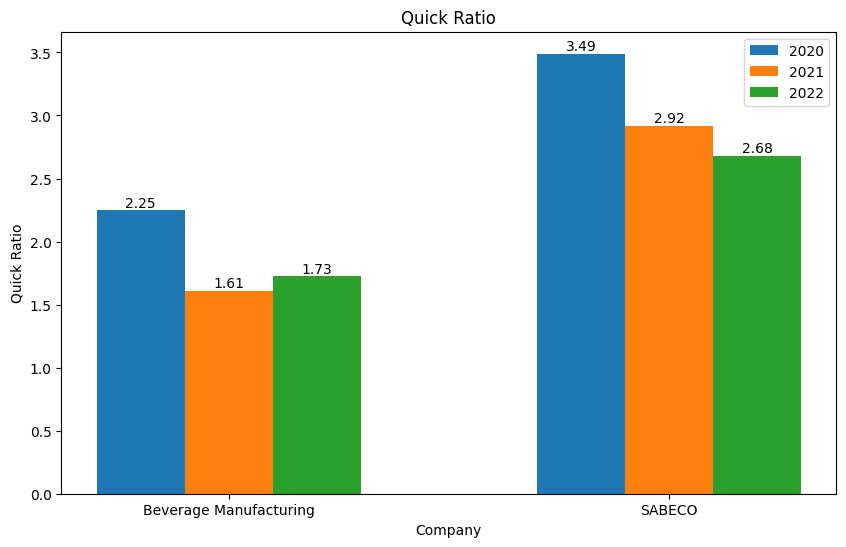

In [99]:
# Use the exact string value for 'Quick Ratio' found in the unique values
quick_ratio_indicator = 'Quick ratio'  # Replace this with the correct string if different

# Filter data for Quick Ratio
quick_ratio = beverage_data[beverage_data['Indicator'] == quick_ratio_indicator].copy()
print("Filtered Data:")
print(quick_ratio)

# Create a new column 'Company Group' to categorize SABECO and other companies
quick_ratio['Company Group'] = quick_ratio['Company'].apply(lambda x: 'SABECO' if x == 'SAB' else 'Beverage Manufacturing')

# Aggregate the data by 'Company Group' and 'Year'
aggregated_data = quick_ratio.groupby(['Company Group', 'Year'])['Value'].mean().reset_index()
print("Aggregated Data:")
print(aggregated_data)

# Pivot the DataFrame
quick_ratio_pivot = aggregated_data.pivot(index='Company Group', columns='Year', values='Value')
print("Pivoted Data:")
print(quick_ratio_pivot)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each year
width = 0.2  # Adjusted bar width for better spacing
positions = list(range(len(quick_ratio_pivot.index)))  # Bar positions

# Create a list of positions for each year
year_positions = [ [p + width*i for p in positions] for i in range(len(quick_ratio_pivot.columns)) ]

for i, (year, year_position) in enumerate(zip(quick_ratio_pivot.columns, year_positions)):
    bars = ax.bar(year_position, quick_ratio_pivot[year], width=width, label=f'{year}')
    # Add numeric values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom')

# Set the labels and title
ax.set_xlabel('Company')
ax.set_ylabel('Quick Ratio')
ax.set_title('Quick Ratio')
ax.set_xticks([p + width for p in positions])
ax.set_xticklabels(quick_ratio_pivot.index, rotation=0)
ax.legend()

# Save the figure
plt.savefig('quick_ratio.png')

# Show the plot
plt.show()

Unique indicators: ['- Accumulated depreciation'
 '- Accumulated retained earning at the end of the previous period'
 '- Common stock with voting right' '- Cost'
 '- Undistributed earnings in this period' "1. Owner's capital"
 '1. Tangible fixed assets' '11. Undistributed earnings after tax'
 '2. Financial leased fixed assets' '3. Intangible fixed assets' '1. Cash'
 '1. Inventories' '1. Long-term prepayments' '1. Long-term trade payables'
 '1. Long-term trade receivables' '1. Short-term prepayments'
 '1. Short-term trade accounts payable'
 '1. Short-term trade accounts receivable'
 '1. Subsidized not-for-profit funds'
 "10. Other funds from owner's equity"
 '10. Short-term borrowings and financial leases'
 '11. Deferred income tax liabilities'
 '11. Provision for short-term liabilities'
 '12. Provision for long-term liabilities' '12.. Bonus and welfare fund'
 '13. Fund for technology development' "13. Minority's interest"
 '2. Cash equivalents' '2. Construction in progress'
 '2. Deferr

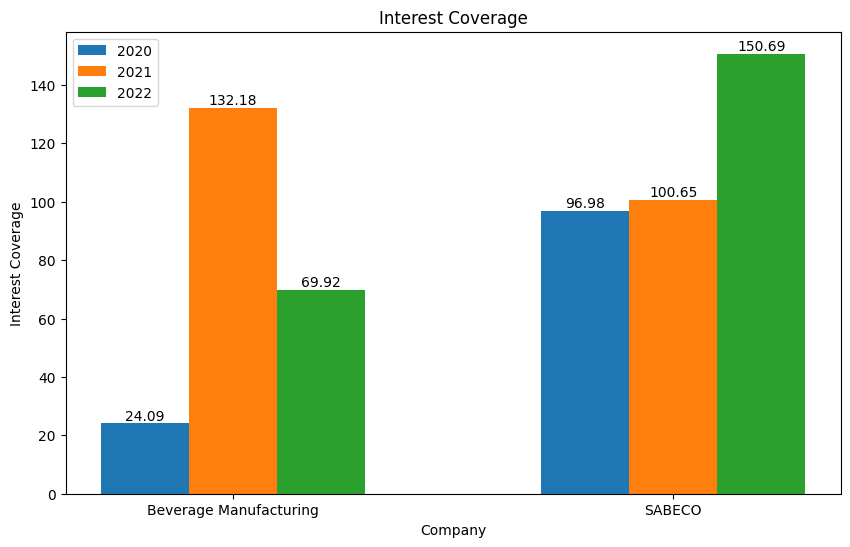

In [101]:
# Inspect unique values in 'Indicator' column to find the correct string for 'Interest Coverage'
unique_indicators = beverage_data['Indicator'].unique()
print("Unique indicators:", unique_indicators)

# Use the exact string value for 'Interest Coverage' found in the unique values
interest_coverage_indicator = 'Interest coverage'  # Replace this with the correct string if different

# Filter data for Interest Coverage
interest_coverage = beverage_data[beverage_data['Indicator'] == interest_coverage_indicator].copy()
print("Filtered Data:")
print(interest_coverage)

# Create a new column 'Company Group' to categorize SABECO and other companies
interest_coverage['Company Group'] = interest_coverage['Company'].apply(lambda x: 'SABECO' if x == 'SAB' else 'Beverage Manufacturing')

# Aggregate the data by 'Company Group' and 'Year'
aggregated_data = interest_coverage.groupby(['Company Group', 'Year'])['Value'].mean().reset_index()
print("Aggregated Data:")
print(aggregated_data)

# Pivot the DataFrame
interest_coverage_pivot = aggregated_data.pivot(index='Company Group', columns='Year', values='Value')
print("Pivoted Data:")
print(interest_coverage_pivot)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each year
width = 0.2  # Adjusted bar width for better spacing
positions = list(range(len(interest_coverage_pivot.index)))  # Bar positions

# Create a list of positions for each year
year_positions = [ [p + width*i for p in positions] for i in range(len(interest_coverage_pivot.columns)) ]

for i, (year, year_position) in enumerate(zip(interest_coverage_pivot.columns, year_positions)):
    bars = ax.bar(year_position, interest_coverage_pivot[year], width=width, label=f'{year}')
    # Add numeric values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom')

# Set the labels and title
ax.set_xlabel('Company')
ax.set_ylabel('Interest Coverage')
ax.set_title('Interest Coverage')
ax.set_xticks([p + width for p in positions])
ax.set_xticklabels(interest_coverage_pivot.index, rotation=0)
ax.legend()

# Save the figure
plt.savefig('interest_coverage.png')

# Show the plot
plt.show()

Filtered Data:
                       Indicator Company  Year   Value Category  \
3767  Number of days of payables     BHN  2020   45.12   Ratios   
3768  Number of days of payables     BHN  2021   32.87   Ratios   
3769  Number of days of payables     BHN  2022   28.97   Ratios   
3770  Number of days of payables     SAB  2020   38.26   Ratios   
3771  Number of days of payables     SAB  2021   39.42   Ratios   
3772  Number of days of payables     SAB  2022   38.95   Ratios   
3773  Number of days of payables     SCD  2020   72.41   Ratios   
3774  Number of days of payables     SCD  2021   86.88   Ratios   
3775  Number of days of payables     SCD  2022  157.82   Ratios   
3776  Number of days of payables     SMB  2020    8.57   Ratios   
3777  Number of days of payables     SMB  2021    7.62   Ratios   
3778  Number of days of payables     SMB  2022    8.96   Ratios   
3779  Number of days of payables     VCF  2020   41.54   Ratios   
3780  Number of days of payables     VCF  2021 

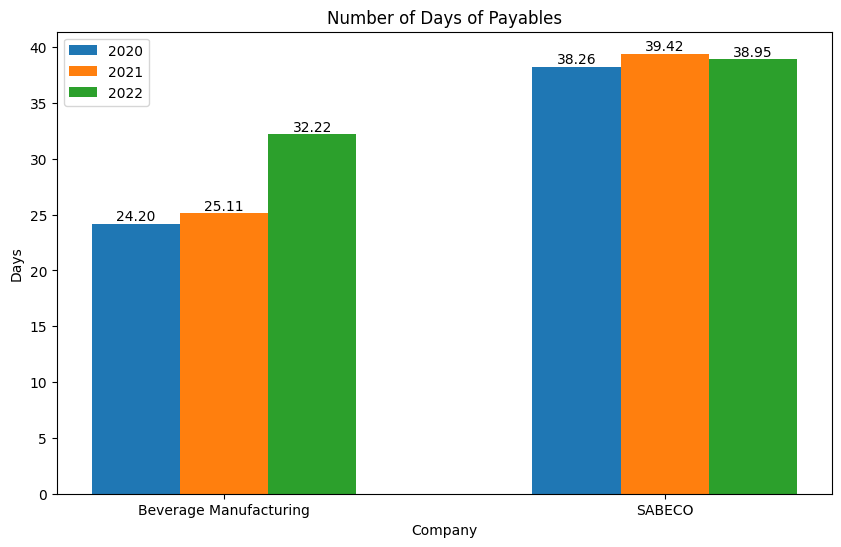

In [102]:
# Use the exact string value for 'Number of Days of Payables' found in the unique values
days_payables_indicator = 'Number of days of payables'  # Replace this with the correct string if different

# Filter data for Number of Days of Payables
days_payables = beverage_data[beverage_data['Indicator'] == days_payables_indicator].copy()
print("Filtered Data:")
print(days_payables)

# Create a new column 'Company Group' to categorize SABECO and other companies
days_payables['Company Group'] = days_payables['Company'].apply(lambda x: 'SABECO' if x == 'SAB' else 'Beverage Manufacturing')

# Aggregate the data by 'Company Group' and 'Year'
aggregated_data = days_payables.groupby(['Company Group', 'Year'])['Value'].mean().reset_index()
print("Aggregated Data:")
print(aggregated_data)

# Pivot the DataFrame
days_payables_pivot = aggregated_data.pivot(index='Company Group', columns='Year', values='Value')
print("Pivoted Data:")
print(days_payables_pivot)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each year
width = 0.2  # Adjusted bar width for better spacing
positions = list(range(len(days_payables_pivot.index)))  # Bar positions

# Create a list of positions for each year
year_positions = [ [p + width*i for p in positions] for i in range(len(days_payables_pivot.columns)) ]

for i, (year, year_position) in enumerate(zip(days_payables_pivot.columns, year_positions)):
    bars = ax.bar(year_position, days_payables_pivot[year], width=width, label=f'{year}')
    # Add numeric values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom')

# Set the labels and title
ax.set_xlabel('Company')
ax.set_ylabel('Days')
ax.set_title('Number of Days of Payables')
ax.set_xticks([p + width for p in positions])
ax.set_xticklabels(days_payables_pivot.index, rotation=0)
ax.legend()

# Save the figure
plt.savefig('days_payables.png')

# Show the plot
plt.show()

Filtered Data:
                      Indicator Company  Year   Value Category  \
2766  Days of inventory on hand     BHN  2020   41.21   Ratios   
2767  Days of inventory on hand     BHN  2021   39.94   Ratios   
2768  Days of inventory on hand     BHN  2022   38.30   Ratios   
2769  Days of inventory on hand     SAB  2020   32.02   Ratios   
2770  Days of inventory on hand     SAB  2021   30.29   Ratios   
2771  Days of inventory on hand     SAB  2022   29.11   Ratios   
2772  Days of inventory on hand     SCD  2020   78.23   Ratios   
2773  Days of inventory on hand     SCD  2021   97.78   Ratios   
2774  Days of inventory on hand     SCD  2022   63.14   Ratios   
2775  Days of inventory on hand     SMB  2020   74.92   Ratios   
2776  Days of inventory on hand     SMB  2021   75.50   Ratios   
2777  Days of inventory on hand     SMB  2022   79.83   Ratios   
2778  Days of inventory on hand     VCF  2020   40.47   Ratios   
2779  Days of inventory on hand     VCF  2021   51.62   Ratio

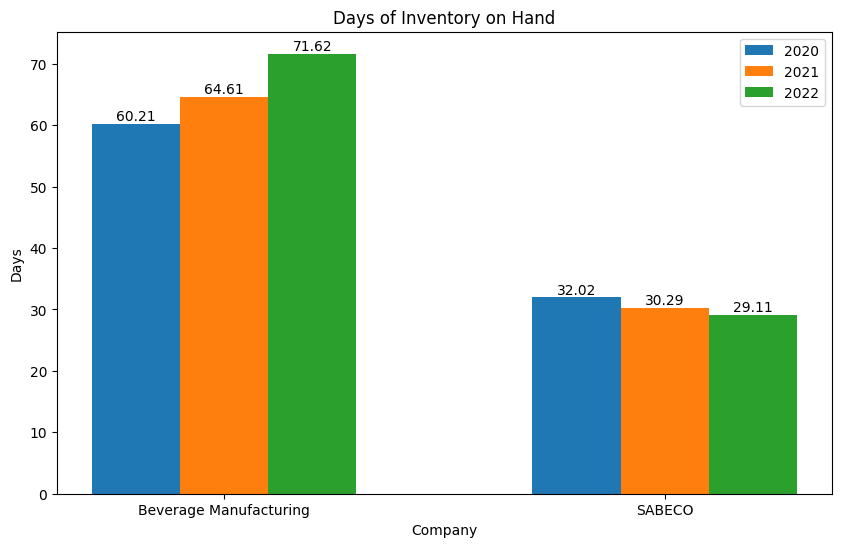

In [103]:
# Use the exact string value for 'Days of Inventory on Hand' found in the unique values
days_inventory_indicator = 'Days of inventory on hand'  # Replace this with the correct string if different

# Filter data for Days of Inventory on Hand
days_inventory = beverage_data[beverage_data['Indicator'] == days_inventory_indicator].copy()
print("Filtered Data:")
print(days_inventory)

# Create a new column 'Company Group' to categorize SABECO and other companies
days_inventory['Company Group'] = days_inventory['Company'].apply(lambda x: 'SABECO' if x == 'SAB' else 'Beverage Manufacturing')

# Aggregate the data by 'Company Group' and 'Year'
aggregated_data = days_inventory.groupby(['Company Group', 'Year'])['Value'].mean().reset_index()
print("Aggregated Data:")
print(aggregated_data)

# Pivot the DataFrame
days_inventory_pivot = aggregated_data.pivot(index='Company Group', columns='Year', values='Value')
print("Pivoted Data:")
print(days_inventory_pivot)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each year
width = 0.2  # Adjusted bar width for better spacing
positions = list(range(len(days_inventory_pivot.index)))  # Bar positions

# Create a list of positions for each year
year_positions = [ [p + width*i for p in positions] for i in range(len(days_inventory_pivot.columns)) ]

for i, (year, year_position) in enumerate(zip(days_inventory_pivot.columns, year_positions)):
    bars = ax.bar(year_position, days_inventory_pivot[year], width=width, label=f'{year}')
    # Add numeric values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom')

# Set the labels and title
ax.set_xlabel('Company')
ax.set_ylabel('Days')
ax.set_title('Days of Inventory on Hand')
ax.set_xticks([p + width for p in positions])
ax.set_xticklabels(days_inventory_pivot.index, rotation=0)
ax.legend()

# Save the figure
plt.savefig('days_inventory.png')

# Show the plot
plt.show()

Filtered Data:
                      Indicator Company  Year  Value Category  \
2793  Days of sales outstanding     BHN  2020   8.83   Ratios   
2794  Days of sales outstanding     BHN  2021  11.04   Ratios   
2795  Days of sales outstanding     BHN  2022  12.49   Ratios   
2796  Days of sales outstanding     SAB  2020   1.48   Ratios   
2797  Days of sales outstanding     SAB  2021   1.18   Ratios   
2798  Days of sales outstanding     SAB  2022   2.29   Ratios   
2799  Days of sales outstanding     SCD  2020  25.43   Ratios   
2800  Days of sales outstanding     SCD  2021  40.62   Ratios   
2801  Days of sales outstanding     SCD  2022  56.56   Ratios   
2802  Days of sales outstanding     SMB  2020  16.94   Ratios   
2803  Days of sales outstanding     SMB  2021  12.74   Ratios   
2804  Days of sales outstanding     SMB  2022   7.55   Ratios   
2805  Days of sales outstanding     VCF  2020  90.31   Ratios   
2806  Days of sales outstanding     VCF  2021  29.02   Ratios   
2807  Days

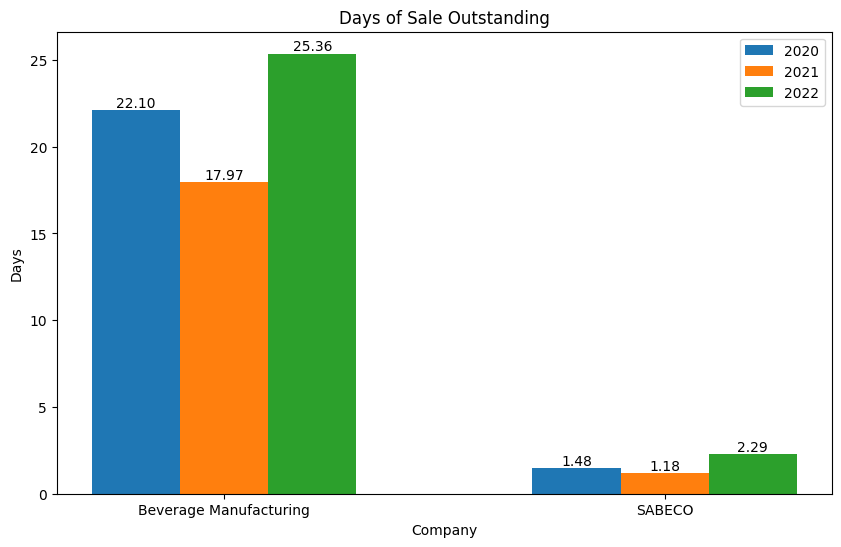

In [104]:
# Filter data for Days of Sale Outstanding
days_sales_outstanding_indicator = 'Days of sales outstanding'  # Ensure this matches the exact string in your dataset

# Filter data for Days of Sale Outstanding
days_sales_outstanding = beverage_data[beverage_data['Indicator'] == days_sales_outstanding_indicator].copy()
print("Filtered Data:")
print(days_sales_outstanding)

# Create a new column 'Company Group' to categorize SABECO and other companies
days_sales_outstanding['Company Group'] = days_sales_outstanding['Company'].apply(lambda x: 'SABECO' if x == 'SAB' else 'Beverage Manufacturing')

# Aggregate the data by 'Company Group' and 'Year'
aggregated_data = days_sales_outstanding.groupby(['Company Group', 'Year'])['Value'].mean().reset_index()
print("Aggregated Data:")
print(aggregated_data)

# Pivot the DataFrame
days_sales_outstanding_pivot = aggregated_data.pivot(index='Company Group', columns='Year', values='Value')
print("Pivoted Data:")
print(days_sales_outstanding_pivot)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each year
width = 0.2  # Adjusted bar width for better spacing
positions = list(range(len(days_sales_outstanding_pivot.index)))  # Bar positions

# Create a list of positions for each year
year_positions = [ [p + width*i for p in positions] for i in range(len(days_sales_outstanding_pivot.columns)) ]

for i, (year, year_position) in enumerate(zip(days_sales_outstanding_pivot.columns, year_positions)):
    bars = ax.bar(year_position, days_sales_outstanding_pivot[year], width=width, label=f'{year}')
    # Add numeric values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom')

# Set the labels and title
ax.set_xlabel('Company')
ax.set_ylabel('Days')
ax.set_title('Days of Sale Outstanding')
ax.set_xticks([p + width for p in positions])
ax.set_xticklabels(days_sales_outstanding_pivot.index, rotation=0)
ax.legend()

# Save the figure
plt.savefig('days_sales_outstanding.png')

# Show the plot
plt.show()

Filtered Data:
     Indicator Company  Year  Value Category            Category 2
4210       ROA     BHN  2020   8.49   Ratios  Profitability ratios
4211       ROA     BHN  2021   4.12   Ratios  Profitability ratios
4212       ROA     BHN  2022   6.46   Ratios  Profitability ratios
4213       ROA     SAB  2020  17.39   Ratios  Profitability ratios
4214       ROA     SAB  2021  12.71   Ratios  Profitability ratios
4215       ROA     SAB  2022  16.09   Ratios  Profitability ratios
4216       ROA     SCD  2020   1.04   Ratios  Profitability ratios
4217       ROA     SCD  2021  -9.12   Ratios  Profitability ratios
4218       ROA     SCD  2022 -10.05   Ratios  Profitability ratios
4219       ROA     SMB  2020  19.83   Ratios  Profitability ratios
4220       ROA     SMB  2021  18.23   Ratios  Profitability ratios
4221       ROA     SMB  2022  19.29   Ratios  Profitability ratios
4222       ROA     VCF  2020  33.21   Ratios  Profitability ratios
4223       ROA     VCF  2021  21.03   Ratios  P

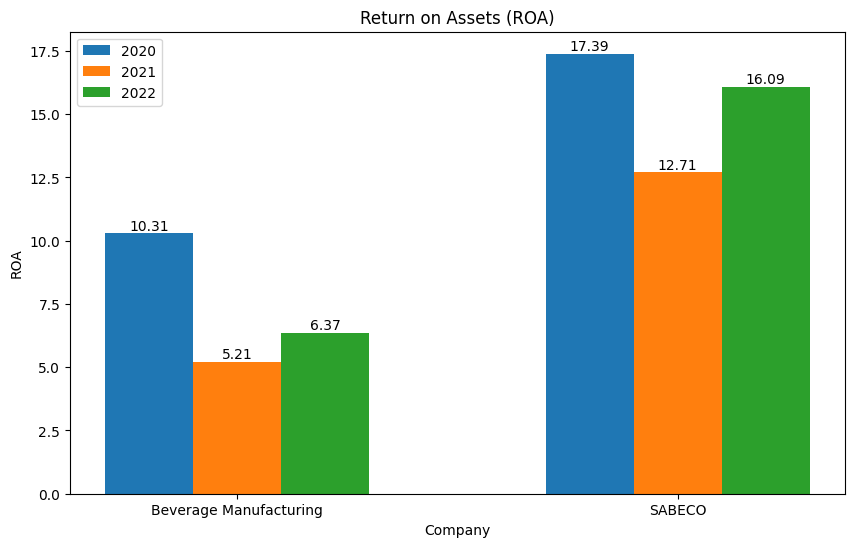

In [105]:
# Filter data for Return on Assets (ROA)
roa_indicator = 'ROA'  # Ensure this matches the exact string in your dataset

# Filter data for ROA
roa = beverage_data[beverage_data['Indicator'] == roa_indicator].copy()
print("Filtered Data:")
print(roa)

# Create a new column 'Company Group' to categorize SABECO and other companies
roa['Company Group'] = roa['Company'].apply(lambda x: 'SABECO' if x == 'SAB' else 'Beverage Manufacturing')

# Aggregate the data by 'Company Group' and 'Year'
aggregated_data = roa.groupby(['Company Group', 'Year'])['Value'].mean().reset_index()
print("Aggregated Data:")
print(aggregated_data)

# Pivot the DataFrame
roa_pivot = aggregated_data.pivot(index='Company Group', columns='Year', values='Value')
print("Pivoted Data:")
print(roa_pivot)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each year
width = 0.2  # Adjusted bar width for better spacing
positions = list(range(len(roa_pivot.index)))  # Bar positions

# Create a list of positions for each year
year_positions = [ [p + width*i for p in positions] for i in range(len(roa_pivot.columns)) ]

for i, (year, year_position) in enumerate(zip(roa_pivot.columns, year_positions)):
    bars = ax.bar(year_position, roa_pivot[year], width=width, label=f'{year}')
    # Add numeric values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom')

# Set the labels and title
ax.set_xlabel('Company')
ax.set_ylabel('ROA')
ax.set_title('Return on Assets (ROA)')
ax.set_xticks([p + width for p in positions])
ax.set_xticklabels(roa_pivot.index, rotation=0)
ax.legend()

# Save the figure
plt.savefig('roa.png')

# Show the plot
plt.show()

Filtered Data:
     Indicator Company  Year  Value Category            Category 2
4237       ROE     BHN  2020  12.02   Ratios  Profitability ratios
4238       ROE     BHN  2021   5.76   Ratios  Profitability ratios
4239       ROE     BHN  2022   9.13   Ratios  Profitability ratios
4240       ROE     SAB  2020  22.88   Ratios  Profitability ratios
4241       ROE     SAB  2021  16.79   Ratios  Profitability ratios
4242       ROE     SAB  2022  22.14   Ratios  Profitability ratios
4243       ROE     SCD  2020   1.76   Ratios  Profitability ratios
4244       ROE     SCD  2021 -20.36   Ratios  Profitability ratios
4245       ROE     SCD  2022 -36.92   Ratios  Profitability ratios
4246       ROE     SMB  2020  32.84   Ratios  Profitability ratios
4247       ROE     SMB  2021  30.25   Ratios  Profitability ratios
4248       ROE     SMB  2022  31.83   Ratios  Profitability ratios
4249       ROE     VCF  2020  49.22   Ratios  Profitability ratios
4250       ROE     VCF  2021  31.06   Ratios  P

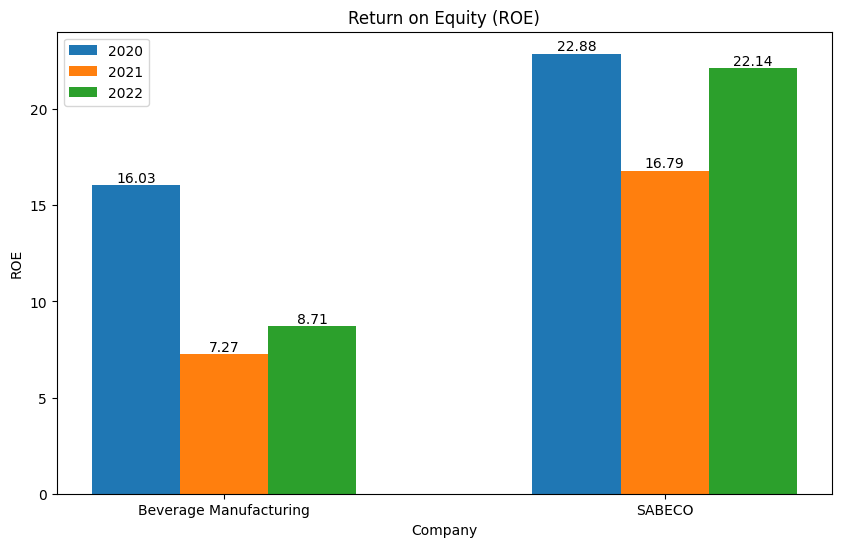

In [106]:
# Filter data for Return on Equity (ROE)
roe_indicator = 'ROE'  # Ensure this matches the exact string in your dataset

# Filter data for ROE
roe = beverage_data[beverage_data['Indicator'] == roe_indicator].copy()
print("Filtered Data:")
print(roe)

# Create a new column 'Company Group' to categorize SABECO and other companies
roe['Company Group'] = roe['Company'].apply(lambda x: 'SABECO' if x == 'SAB' else 'Beverage Manufacturing')

# Aggregate the data by 'Company Group' and 'Year'
aggregated_data = roe.groupby(['Company Group', 'Year'])['Value'].mean().reset_index()
print("Aggregated Data:")
print(aggregated_data)

# Pivot the DataFrame
roe_pivot = aggregated_data.pivot(index='Company Group', columns='Year', values='Value')
print("Pivoted Data:")
print(roe_pivot)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each year
width = 0.2  # Adjusted bar width for better spacing
positions = list(range(len(roe_pivot.index)))  # Bar positions

# Create a list of positions for each year
year_positions = [ [p + width*i for p in positions] for i in range(len(roe_pivot.columns)) ]

for i, (year, year_position) in enumerate(zip(roe_pivot.columns, year_positions)):
    bars = ax.bar(year_position, roe_pivot[year], width=width, label=f'{year}')
    # Add numeric values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom')

# Set the labels and title
ax.set_xlabel('Company')
ax.set_ylabel('ROE')
ax.set_title('Return on Equity (ROE)')
ax.set_xticks([p + width for p in positions])
ax.set_xticklabels(roe_pivot.index, rotation=0)
ax.legend()

# Save the figure
plt.savefig('roe.png')

# Show the plot
plt.show()


Filtered Data:
                Indicator Company  Year  Value Category            Category 2
3209  Gross profit margin     BHN  2020  26.56   Ratios  Profitability ratios
3210  Gross profit margin     BHN  2021  24.40   Ratios  Profitability ratios
3211  Gross profit margin     BHN  2022  27.54   Ratios  Profitability ratios
3212  Gross profit margin     SAB  2020  30.40   Ratios  Profitability ratios
3213  Gross profit margin     SAB  2021  28.85   Ratios  Profitability ratios
3214  Gross profit margin     SAB  2022  30.79   Ratios  Profitability ratios
3215  Gross profit margin     SCD  2020  24.35   Ratios  Profitability ratios
3216  Gross profit margin     SCD  2021  15.06   Ratios  Profitability ratios
3217  Gross profit margin     SCD  2022  18.60   Ratios  Profitability ratios
3218  Gross profit margin     SMB  2020  25.78   Ratios  Profitability ratios
3219  Gross profit margin     SMB  2021  26.45   Ratios  Profitability ratios
3220  Gross profit margin     SMB  2022  26.90   

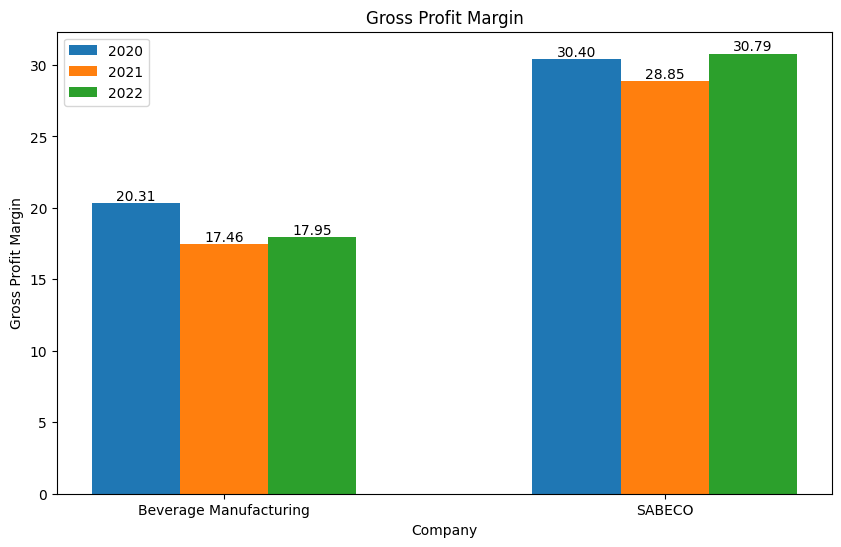

In [84]:
# Filter data for Gross Profit Margin
gross_profit_margin_indicator = 'Gross profit margin'  # Ensure this matches the exact string in your dataset

# Filter data for Gross Profit Margin
gross_profit_margin = beverage_data[beverage_data['Indicator'] == gross_profit_margin_indicator].copy()
print("Filtered Data:")
print(gross_profit_margin)

# Create a new column 'Company Group' to categorize SABECO and other companies
gross_profit_margin['Company Group'] = gross_profit_margin['Company'].apply(lambda x: 'SABECO' if x == 'SAB' else 'Beverage Manufacturing')

# Aggregate the data by 'Company Group' and 'Year'
aggregated_data = gross_profit_margin.groupby(['Company Group', 'Year'])['Value'].mean().reset_index()
print("Aggregated Data:")
print(aggregated_data)

# Pivot the DataFrame
gross_profit_margin_pivot = aggregated_data.pivot(index='Company Group', columns='Year', values='Value')
print("Pivoted Data:")
print(gross_profit_margin_pivot)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each year
width = 0.2  # Adjusted bar width for better spacing
positions = list(range(len(gross_profit_margin_pivot.index)))  # Bar positions

# Create a list of positions for each year
year_positions = [ [p + width*i for p in positions] for i in range(len(gross_profit_margin_pivot.columns)) ]

for i, (year, year_position) in enumerate(zip(gross_profit_margin_pivot.columns, year_positions)):
    bars = ax.bar(year_position, gross_profit_margin_pivot[year], width=width, label=f'{year}')
    # Add numeric values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom')

# Set the labels and title
ax.set_xlabel('Company')
ax.set_ylabel('Gross Profit Margin')
ax.set_title('Gross Profit Margin')
ax.set_xticks([p + width for p in positions])
ax.set_xticklabels(gross_profit_margin_pivot.index, rotation=0)
ax.legend()

# Save the figure
plt.savefig('gross_profit_margin.png')

# Show the plot
plt.show()


Filtered Data:
              Indicator Company  Year  Value Category            Category 2
3713  Net profit margin     BHN  2020   8.86   Ratios  Profitability ratios
3714  Net profit margin     BHN  2021   4.66   Ratios  Profitability ratios
3715  Net profit margin     BHN  2022   5.99   Ratios  Profitability ratios
3716  Net profit margin     SAB  2020  17.66   Ratios  Profitability ratios
3717  Net profit margin     SAB  2021  14.90   Ratios  Profitability ratios
3718  Net profit margin     SAB  2022  15.72   Ratios  Profitability ratios
3719  Net profit margin     SCD  2020   2.11   Ratios  Profitability ratios
3720  Net profit margin     SCD  2021 -27.02   Ratios  Profitability ratios
3721  Net profit margin     SCD  2022 -28.80   Ratios  Profitability ratios
3722  Net profit margin     SMB  2020  13.16   Ratios  Profitability ratios
3723  Net profit margin     SMB  2021  13.32   Ratios  Profitability ratios
3724  Net profit margin     SMB  2022  13.32   Ratios  Profitability rati

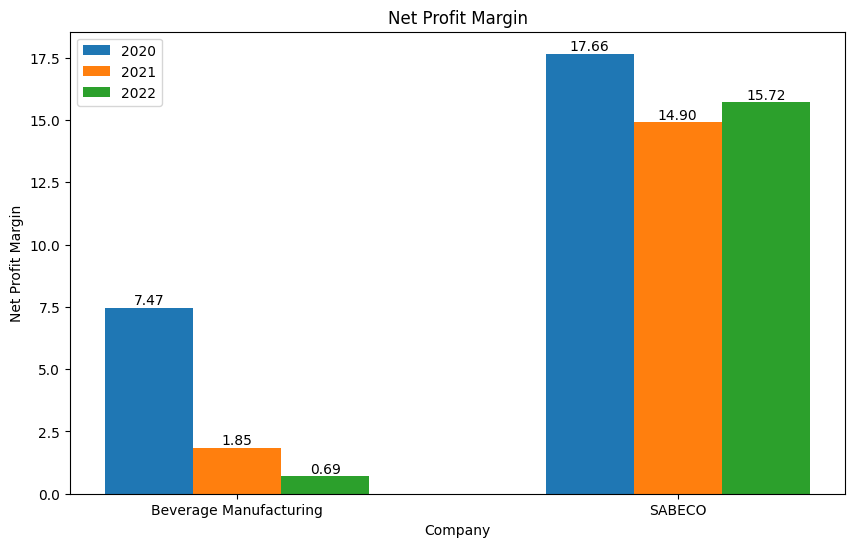

In [85]:
# Filter data for Net Profit Margin
net_profit_margin_indicator = 'Net profit margin'  # Ensure this matches the exact string in your dataset

# Filter data for Net Profit Margin
net_profit_margin = beverage_data[beverage_data['Indicator'] == net_profit_margin_indicator].copy()
print("Filtered Data:")
print(net_profit_margin)

# Create a new column 'Company Group' to categorize SABECO and other companies
net_profit_margin['Company Group'] = net_profit_margin['Company'].apply(lambda x: 'SABECO' if x == 'SAB' else 'Beverage Manufacturing')

# Aggregate the data by 'Company Group' and 'Year'
aggregated_data = net_profit_margin.groupby(['Company Group', 'Year'])['Value'].mean().reset_index()
print("Aggregated Data:")
print(aggregated_data)

# Pivot the DataFrame
net_profit_margin_pivot = aggregated_data.pivot(index='Company Group', columns='Year', values='Value')
print("Pivoted Data:")
print(net_profit_margin_pivot)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each year
width = 0.2  # Adjusted bar width for better spacing
positions = list(range(len(net_profit_margin_pivot.index)))  # Bar positions

# Create a list of positions for each year
year_positions = [ [p + width*i for p in positions] for i in range(len(net_profit_margin_pivot.columns)) ]

for i, (year, year_position) in enumerate(zip(net_profit_margin_pivot.columns, year_positions)):
    bars = ax.bar(year_position, net_profit_margin_pivot[year], width=width, label=f'{year}')
    # Add numeric values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom')

# Set the labels and title
ax.set_xlabel('Company')
ax.set_ylabel('Net Profit Margin')
ax.set_title('Net Profit Margin')
ax.set_xticks([p + width for p in positions])
ax.set_xticklabels(net_profit_margin_pivot.index, rotation=0)
ax.legend()

# Save the figure
plt.savefig('net_profit_margin.png')

# Show the plot
plt.show()


Filtered Data:
     Indicator Company  Year  Value Category        Category 2
3888       P/B     BHN  2020   3.12   Ratios  Valuation ratios
3889       P/B     BHN  2021   2.90   Ratios  Valuation ratios
3890       P/B     BHN  2022   2.01   Ratios  Valuation ratios
3891       P/B     SAB  2020   5.89   Ratios  Valuation ratios
3892       P/B     SAB  2021   4.29   Ratios  Valuation ratios
3893       P/B     SAB  2022   4.35   Ratios  Valuation ratios
3894       P/B     SCD  2020   1.04   Ratios  Valuation ratios
3895       P/B     SCD  2021   1.15   Ratios  Valuation ratios
3896       P/B     SCD  2022   1.62   Ratios  Valuation ratios
3897       P/B     SMB  2020   2.53   Ratios  Valuation ratios
3898       P/B     SMB  2021   2.30   Ratios  Valuation ratios
3899       P/B     SMB  2022   2.19   Ratios  Valuation ratios
3900       P/B     VCF  2020   4.01   Ratios  Valuation ratios
3901       P/B     VCF  2021   4.93   Ratios  Valuation ratios
3902       P/B     VCF  2022   3.56   Ra

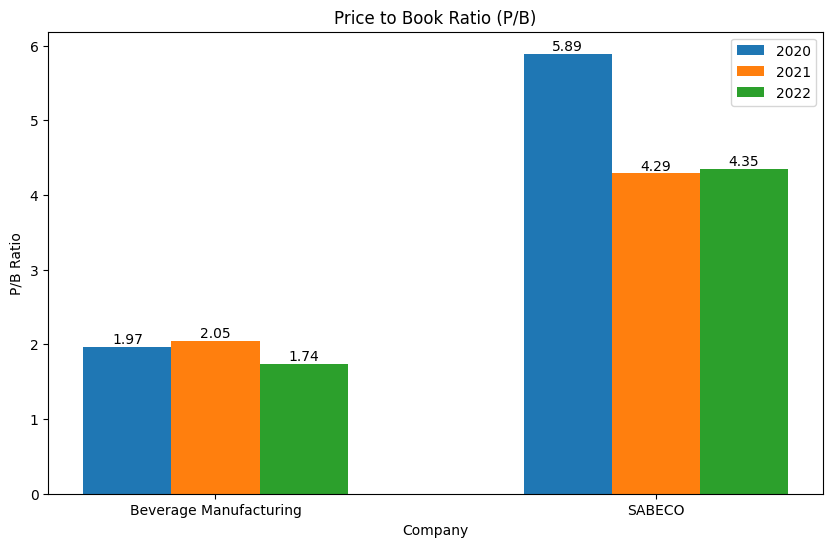

In [107]:
# Filter data for Price to Book Ratio (P/B)
pb_ratio_indicator = 'P/B'  # Ensure this matches the exact string in your dataset

# Filter data for P/B Ratio
pb_ratio = beverage_data[beverage_data['Indicator'] == pb_ratio_indicator].copy()
print("Filtered Data:")
print(pb_ratio)

# Create a new column 'Company Group' to categorize SABECO and other companies
pb_ratio['Company Group'] = pb_ratio['Company'].apply(lambda x: 'SABECO' if x == 'SAB' else 'Beverage Manufacturing')

# Aggregate the data by 'Company Group' and 'Year'
aggregated_data = pb_ratio.groupby(['Company Group', 'Year'])['Value'].mean().reset_index()
print("Aggregated Data:")
print(aggregated_data)

# Pivot the DataFrame
pb_ratio_pivot = aggregated_data.pivot(index='Company Group', columns='Year', values='Value')
print("Pivoted Data:")
print(pb_ratio_pivot)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each year
width = 0.2  # Adjusted bar width for better spacing
positions = list(range(len(pb_ratio_pivot.index)))  # Bar positions

# Create a list of positions for each year
year_positions = [ [p + width*i for p in positions] for i in range(len(pb_ratio_pivot.columns)) ]

for i, (year, year_position) in enumerate(zip(pb_ratio_pivot.columns, year_positions)):
    bars = ax.bar(year_position, pb_ratio_pivot[year], width=width, label=f'{year}')
    # Add numeric values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom')

# Set the labels and title
ax.set_xlabel('Company')
ax.set_ylabel('P/B Ratio')
ax.set_title('Price to Book Ratio (P/B)')
ax.set_xticks([p + width for p in positions])
ax.set_xticklabels(pb_ratio_pivot.index, rotation=0)
ax.legend()

# Save the figure
plt.savefig('pb_ratio.png')

# Show the plot
plt.show()


Filtered Data:
     Indicator Company  Year   Value Category        Category 2
3915       P/E     BHN  2020   27.26   Ratios  Valuation ratios
3916       P/E     BHN  2021   46.06   Ratios  Valuation ratios
3917       P/E     BHN  2022   23.04   Ratios  Valuation ratios
3918       P/E     SAB  2020   26.47   Ratios  Valuation ratios
3919       P/E     SAB  2021   26.33   Ratios  Valuation ratios
3920       P/E     SAB  2022   20.49   Ratios  Valuation ratios
3921       P/E     SCD  2020   58.87   Ratios  Valuation ratios
3922       P/E     SCD  2021   -5.05   Ratios  Valuation ratios
3923       P/E     SCD  2022   -3.59   Ratios  Valuation ratios
3924       P/E     SMB  2020    7.87   Ratios  Valuation ratios
3925       P/E     SMB  2021    8.03   Ratios  Valuation ratios
3926       P/E     SMB  2022    7.18   Ratios  Valuation ratios
3927       P/E     VCF  2020    8.31   Ratios  Valuation ratios
3928       P/E     VCF  2021   14.53   Ratios  Valuation ratios
3929       P/E     VCF  2

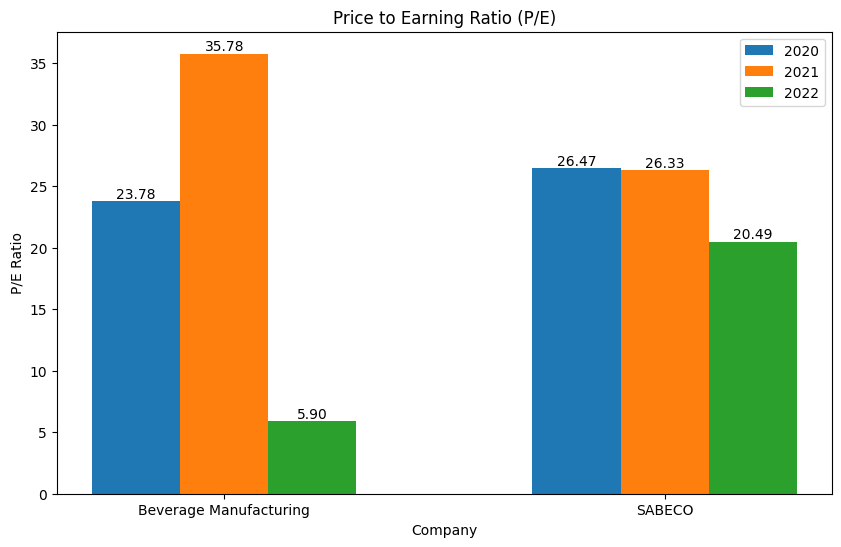

In [108]:
# Filter data for Price to Earning Ratio (P/E)
pe_ratio_indicator = 'P/E'  # Ensure this matches the exact string in your dataset

# Filter data for P/E Ratio
pe_ratio = beverage_data[beverage_data['Indicator'] == pe_ratio_indicator].copy()
print("Filtered Data:")
print(pe_ratio)

# Create a new column 'Company Group' to categorize SABECO and other companies
pe_ratio['Company Group'] = pe_ratio['Company'].apply(lambda x: 'SABECO' if x == 'SAB' else 'Beverage Manufacturing')

# Aggregate the data by 'Company Group' and 'Year'
aggregated_data = pe_ratio.groupby(['Company Group', 'Year'])['Value'].mean().reset_index()
print("Aggregated Data:")
print(aggregated_data)

# Pivot the DataFrame
pe_ratio_pivot = aggregated_data.pivot(index='Company Group', columns='Year', values='Value')
print("Pivoted Data:")
print(pe_ratio_pivot)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each year
width = 0.2  # Adjusted bar width for better spacing
positions = list(range(len(pe_ratio_pivot.index)))  # Bar positions

# Create a list of positions for each year
year_positions = [ [p + width*i for p in positions] for i in range(len(pe_ratio_pivot.columns)) ]

for i, (year, year_position) in enumerate(zip(pe_ratio_pivot.columns, year_positions)):
    bars = ax.bar(year_position, pe_ratio_pivot[year], width=width, label=f'{year}')
    # Add numeric values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom')

# Set the labels and title
ax.set_xlabel('Company')
ax.set_ylabel('P/E Ratio')
ax.set_title('Price to Earning Ratio (P/E)')
ax.set_xticks([p + width for p in positions])
ax.set_xticklabels(pe_ratio_pivot.index, rotation=0)
ax.legend()

# Save the figure
plt.savefig('pe_ratio.png')

# Show the plot
plt.show()


In [88]:
#MA30

In [89]:
# Load the data
file_path = 'MA30.xlsx'  # Replace with the correct path
stock_data = pd.read_excel(file_path)

# Inspect the data
print(stock_data.head())
print(stock_data.columns)


        Date  VN-INDEX    SAB  MA30 (VN-INDEX)  MA30 (SAB)
0 2023-01-03   1043.90  84.50              NaN         NaN
1 2023-01-04   1046.35  85.75              NaN         NaN
2 2023-01-05   1055.82  87.10              NaN         NaN
3 2023-01-06   1051.44  90.35              NaN         NaN
4 2023-01-09   1054.21  89.80              NaN         NaN
Index(['Date', 'VN-INDEX', 'SAB', 'MA30 (VN-INDEX)', 'MA30 (SAB)'], dtype='object')


In [90]:
# Calculate the 30-day moving average for SAB
stock_data['MA30_SAB'] = stock_data['SAB'].rolling(window=30).mean()

# Calculate the 30-day moving average for VN-INDEX
stock_data['MA30_VNINDEX'] = stock_data['VN-INDEX'].rolling(window=30).mean()

# Inspect the updated data
print(stock_data[['Date', 'SAB', 'MA30_SAB', 'VN-INDEX', 'MA30_VNINDEX']].head(35))  # Display more rows to see the moving average


         Date    SAB   MA30_SAB  VN-INDEX  MA30_VNINDEX
0  2023-01-03  84.50        NaN   1043.90           NaN
1  2023-01-04  85.75        NaN   1046.35           NaN
2  2023-01-05  87.10        NaN   1055.82           NaN
3  2023-01-06  90.35        NaN   1051.44           NaN
4  2023-01-09  89.80        NaN   1054.21           NaN
5  2023-01-10  88.05        NaN   1053.35           NaN
6  2023-01-11  90.50        NaN   1055.76           NaN
7  2023-01-12  89.90        NaN   1056.39           NaN
8  2023-01-13  92.95        NaN   1060.17           NaN
9  2023-01-16  94.25        NaN   1066.68           NaN
10 2023-01-17  93.50        NaN   1088.29           NaN
11 2023-01-18  93.50        NaN   1098.28           NaN
12 2023-01-19  92.85        NaN   1108.08           NaN
13 2023-01-27  96.55        NaN   1117.10           NaN
14 2023-01-30  95.00        NaN   1102.57           NaN
15 2023-01-31  94.50        NaN   1111.18           NaN
16 2023-02-01  93.50        NaN   1075.97       

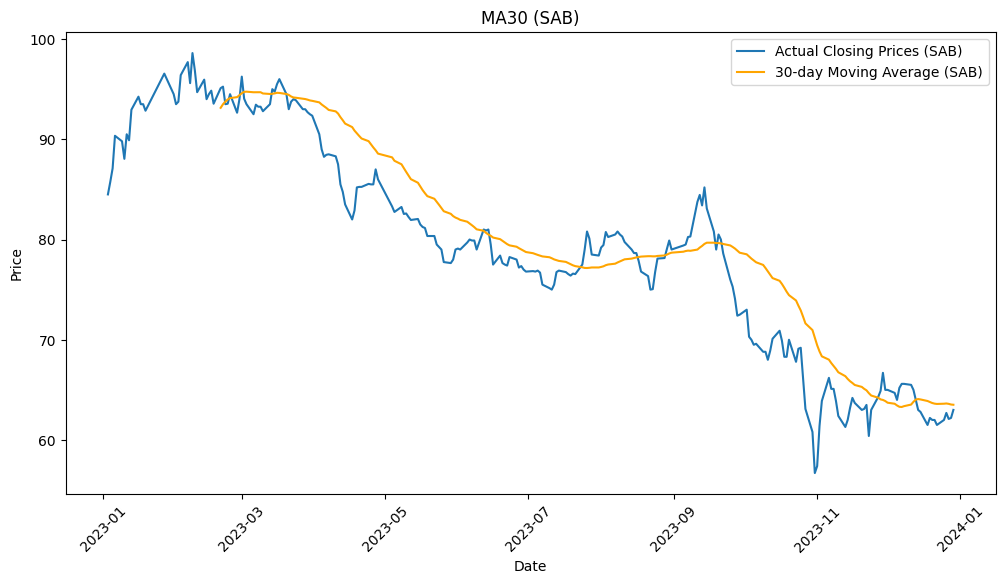

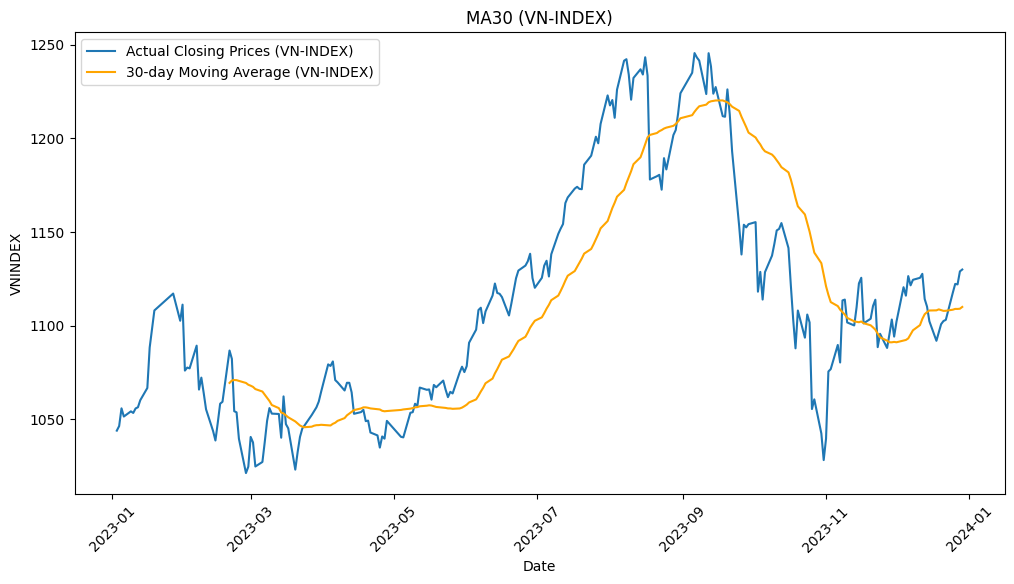

In [91]:
import matplotlib.pyplot as plt

# Plot for SAB
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['SAB'], label='Actual Closing Prices (SAB)')
plt.plot(stock_data['Date'], stock_data['MA30_SAB'], label='30-day Moving Average (SAB)', color='orange')
plt.title('MA30 (SAB)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.savefig('MA30_SAB.png')
plt.show()

# Plot for VN-INDEX
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['VN-INDEX'], label='Actual Closing Prices (VN-INDEX)')
plt.plot(stock_data['Date'], stock_data['MA30_VNINDEX'], label='30-day Moving Average (VN-INDEX)', color='orange')
plt.title('MA30 (VN-INDEX)')
plt.xlabel('Date')
plt.ylabel('VNINDEX')
plt.legend()
plt.xticks(rotation=45)
plt.savefig('MA30_VNINDEX.png')
plt.show()


In [14]:
# Create and Summarize the LSTM Model
# Define the model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(1, 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))

# Display the model summary
model.summary()

# Visualize and save the model as an image
plot_model(model, to_file='LSTM_model.png', show_shapes=True, show_layer_names=True)

# Save the model summary to a file
with open('model_summary.txt', 'w') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))



/Users/collide0412/grad_prj/.conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,009 (324.25 KB)

 Trainable params: 83,009 (324.25 KB)

 Non-trainable params: 0 (0.00 B)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [23]:
# Load the datasets
sab_stock_2018_2022 = pd.read_excel('SAB stock price 2018-2022.xlsx')
sab_stock_2023 = pd.read_excel('SAB stock price 2023.xlsx')
vn_index_2018_2023 = pd.read_excel('VN-Index-2018-2023.xlsx')

# Concatenate the stock data for a continuous timeline
sab_stock = pd.concat([sab_stock_2018_2022, sab_stock_2023])

# Prepare the data for modeling
sab_stock['Date'] = pd.to_datetime(sab_stock['Date'])
vn_index_2018_2023['Date'] = pd.to_datetime(vn_index_2018_2023['Date'])

# Ensure data is sorted by date
sab_stock.sort_values('Date', inplace=True)
vn_index_2018_2023.sort_values('Date', inplace=True)

# Reset the index
sab_stock.reset_index(drop=True, inplace=True)
vn_index_2018_2023.reset_index(drop=True, inplace=True)

# Display the first few rows to check the data
print(sab_stock.head())
print(vn_index_2018_2023.head())

        Date   Close    Open    High     Low  Volume
0 2018-01-02  126.15  127.00  127.35  124.95  116190
1 2018-01-03  132.50  126.15  132.50  126.15  231500
2 2018-01-04  133.75  134.00  134.35  131.50  238800
3 2018-01-05  132.15  134.00  134.25  131.55  131870
4 2018-01-08  130.50  131.50  132.00  129.50  115690
        Date    Close     Open     High      Low     Volume
0 2018-01-02   995.77   986.05   996.18   984.24  172887390
1 2018-01-03  1005.67   999.86  1010.21   995.77  212432620
2 2018-01-04  1019.75  1009.37  1019.75  1005.67  235169670
3 2018-01-05  1012.65  1020.34  1020.60  1010.65  265519370
4 2018-01-08  1022.90  1011.36  1022.90  1004.89  234755510


In [24]:
# Define a function to prepare data for LSTM
def prepare_data(stock, time_step=60):
    data = stock['Close'].values
    data = data.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler

# Split the data
train_size = int(len(sab_stock) * 0.8)
train_data, test_data = sab_stock[:train_size], sab_stock[train_size:]

X_train, y_train, scaler = prepare_data(train_data)
X_test, y_test, _ = prepare_data(test_data)


Epoch 1/50


/Users/collide0412/grad_prj/.conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1346 - val_loss: 0.0083
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0092 - val_loss: 0.0020
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0064 - val_loss: 0.0016
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0063 - val_loss: 0.0016
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0054 - val_loss: 0.0014
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0052 - val_loss: 0.0014
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0054 - val_loss: 0.0014
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0048 - val_loss: 0.0013
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0045 - val_loss: 0.0016
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0052 - val_loss: 0.0013
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0052 - val_loss: 0.0012
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0048 - val_l

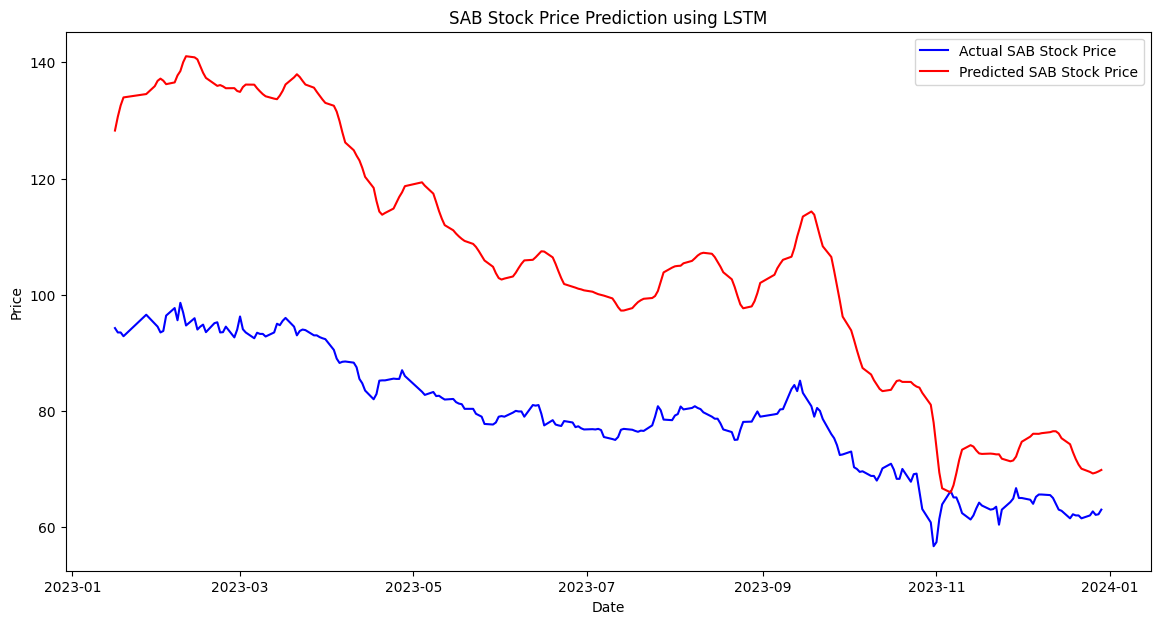

In [25]:
# Create LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict and inverse transform the data
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Ensure the predicted and actual values have the same length
test_data = test_data[-len(lstm_predictions):]

# Calculate MSE
lstm_mse = np.mean(np.square(test_data['Close'].values - lstm_predictions.flatten()))
print(f"LSTM Model MSE: {lstm_mse}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(test_data['Date'], test_data['Close'], color='blue', label='Actual SAB Stock Price')
plt.plot(test_data['Date'], lstm_predictions, color='red', label='Predicted SAB Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SAB Stock Price Prediction using LSTM')
plt.legend()
plt.show()

Epoch 1/50


/Users/collide0412/grad_prj/.conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1126 - val_loss: 0.0015
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0106 - val_loss: 0.0015
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0050 - val_loss: 6.9716e-04
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0045 - val_loss: 6.2371e-04
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0040 - val_loss: 8.7072e-04
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0043 - val_loss: 5.8464e-04
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0045 - val_loss: 5.8578e-04
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0040 - val_loss: 5.6520e-04
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0037 - val_loss: 5.4297e-04
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0035 - val_loss: 5.6580e-04
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0036 - val_loss: 5.6791e-04
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━

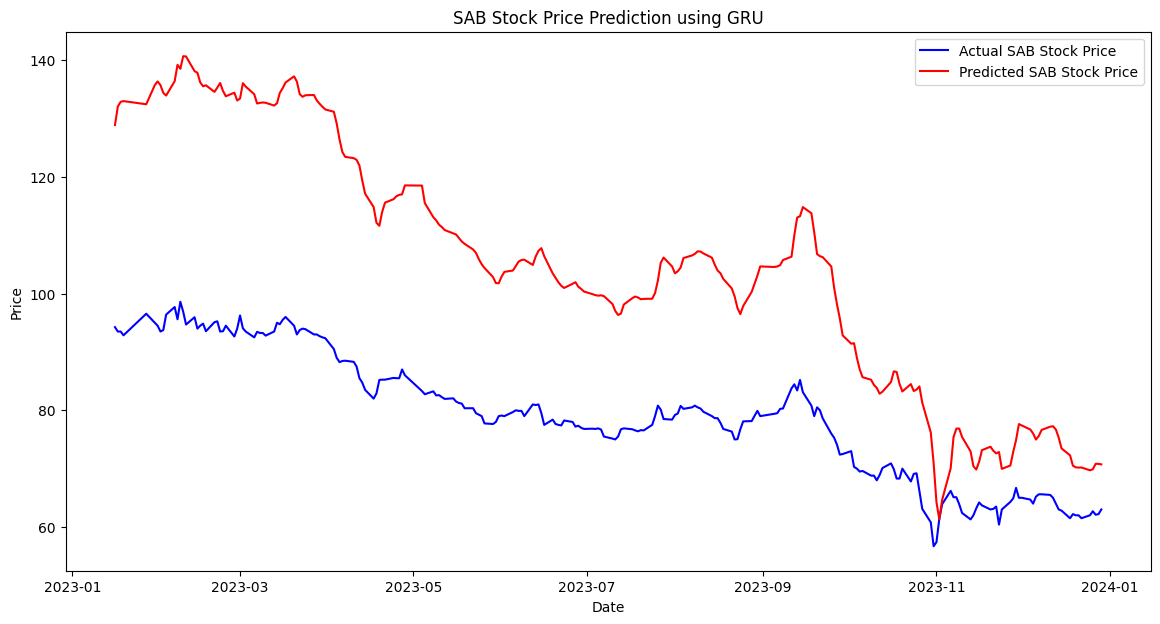

In [28]:
# Create GRU model
gru_model = Sequential()
gru_model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(50, return_sequences=False))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict and inverse transform the data
gru_predictions = gru_model.predict(X_test)
gru_predictions = scaler.inverse_transform(gru_predictions)

# Ensure the predicted and actual values have the same length
test_data_trimmed = test_data[-len(gru_predictions):]

# Calculate MSE
gru_mse = np.mean(np.square(test_data_trimmed['Close'].values - gru_predictions.flatten()))
print(f"GRU Model MSE: {gru_mse}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(test_data_trimmed['Date'], test_data_trimmed['Close'], color='blue', label='Actual SAB Stock Price')
plt.plot(test_data_trimmed['Date'], gru_predictions, color='red', label='Predicted SAB Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SAB Stock Price Prediction using GRU')
plt.legend()
plt.show()

Epoch 1/50


/Users/collide0412/grad_prj/.conda/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.1062 - val_loss: 0.0058
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0119 - val_loss: 0.0020
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0061 - val_loss: 0.0021
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0060 - val_loss: 0.0017
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0042 - val_loss: 0.0013
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0044 - val_loss: 0.0012
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0042 - val_loss: 9.7152e-04
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0039 - val_loss: 9.3508e-04
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0032 - val_loss: 8.4712e-04
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0035 - val_loss: 8.1754e-04
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss

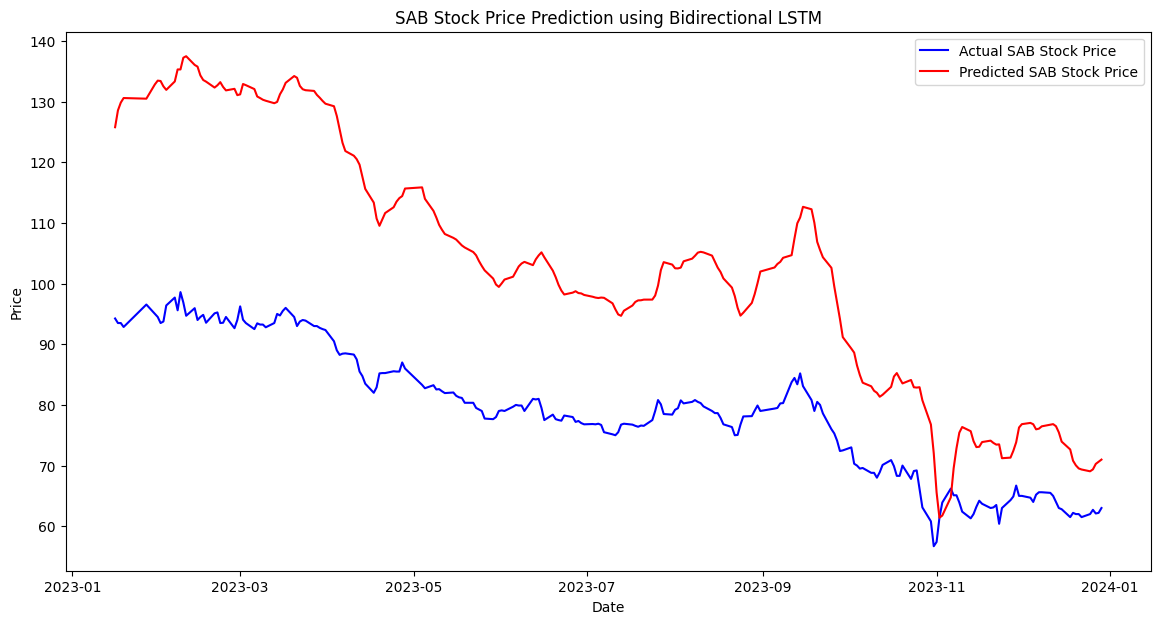

In [29]:
# Create Bidirectional LSTM model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
bi_lstm_model.add(Dropout(0.2))
bi_lstm_model.add(Bidirectional(LSTM(50, return_sequences=False)))
bi_lstm_model.add(Dropout(0.2))
bi_lstm_model.add(Dense(1))
bi_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
bi_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict and inverse transform the data
bi_lstm_predictions = bi_lstm_model.predict(X_test)
bi_lstm_predictions = scaler.inverse_transform(bi_lstm_predictions)

# Ensure the predicted and actual values have the same length
test_data_trimmed = test_data[-len(bi_lstm_predictions):]

# Calculate MSE
bi_lstm_mse = np.mean(np.square(test_data_trimmed['Close'].values - bi_lstm_predictions.flatten()))
print(f"Bidirectional LSTM Model MSE: {bi_lstm_mse}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(test_data_trimmed['Date'], test_data_trimmed['Close'], color='blue', label='Actual SAB Stock Price')
plt.plot(test_data_trimmed['Date'], bi_lstm_predictions, color='red', label='Predicted SAB Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SAB Stock Price Prediction using Bidirectional LSTM')
plt.legend()
plt.show()


Epoch 1/50


/Users/collide0412/grad_prj/.conda/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.1118 - val_loss: 0.0027
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0118 - val_loss: 0.0013
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0061 - val_loss: 0.0010
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0055 - val_loss: 0.0014
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0041 - val_loss: 9.5005e-04
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0041 - val_loss: 8.0046e-04
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0030 - val_loss: 5.3287e-04
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0030 - val_loss: 5.2927e-04
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0031 - val_loss: 4.7480e-04
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0028 - val_loss: 4.9553e-04
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0031 - val_loss: 6.9748e-04
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms

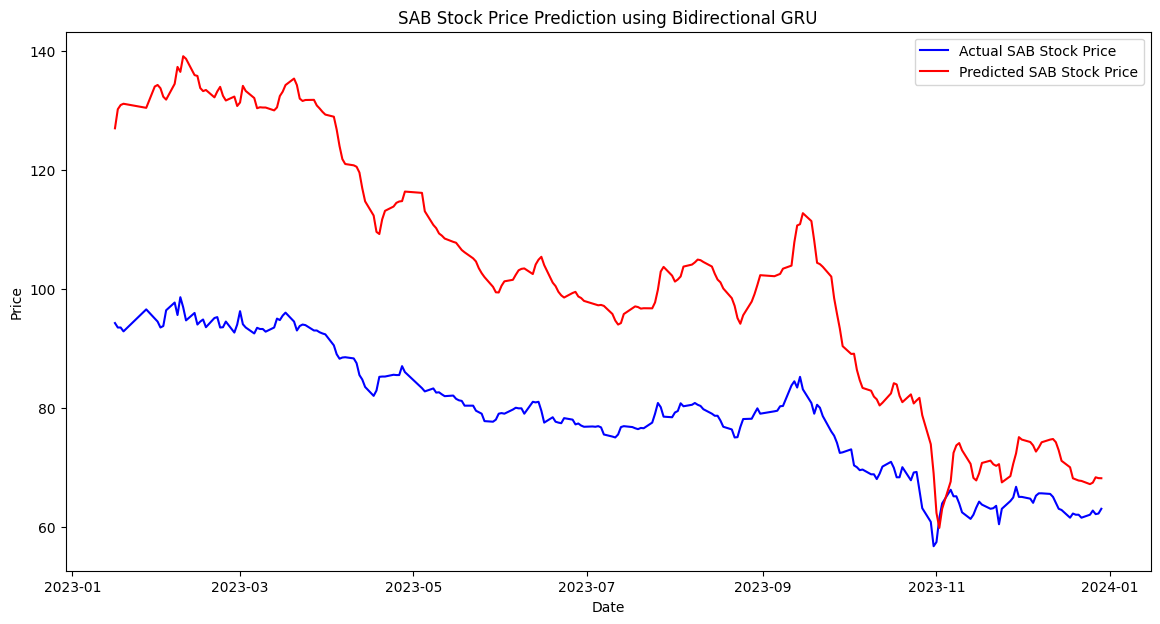

In [30]:
# Create Bidirectional GRU model
bi_gru_model = Sequential()
bi_gru_model.add(Bidirectional(GRU(50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
bi_gru_model.add(Dropout(0.2))
bi_gru_model.add(Bidirectional(GRU(50, return_sequences=False)))
bi_gru_model.add(Dropout(0.2))
bi_gru_model.add(Dense(1))
bi_gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
bi_gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict and inverse transform the data
bi_gru_predictions = bi_gru_model.predict(X_test)
bi_gru_predictions = scaler.inverse_transform(bi_gru_predictions)

# Ensure the predicted and actual values have the same length
test_data_trimmed = test_data[-len(bi_gru_predictions):]

# Calculate MSE
bi_gru_mse = np.mean(np.square(test_data_trimmed['Close'].values - bi_gru_predictions.flatten()))
print(f"Bidirectional GRU Model MSE: {bi_gru_mse}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(test_data_trimmed['Date'], test_data_trimmed['Close'], color='blue', label='Actual SAB Stock Price')
plt.plot(test_data_trimmed['Date'], bi_gru_predictions, color='red', label='Predicted SAB Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SAB Stock Price Prediction using Bidirectional GRU')
plt.legend()
plt.show()


Decision Tree Model MSE: 779.4260208333334


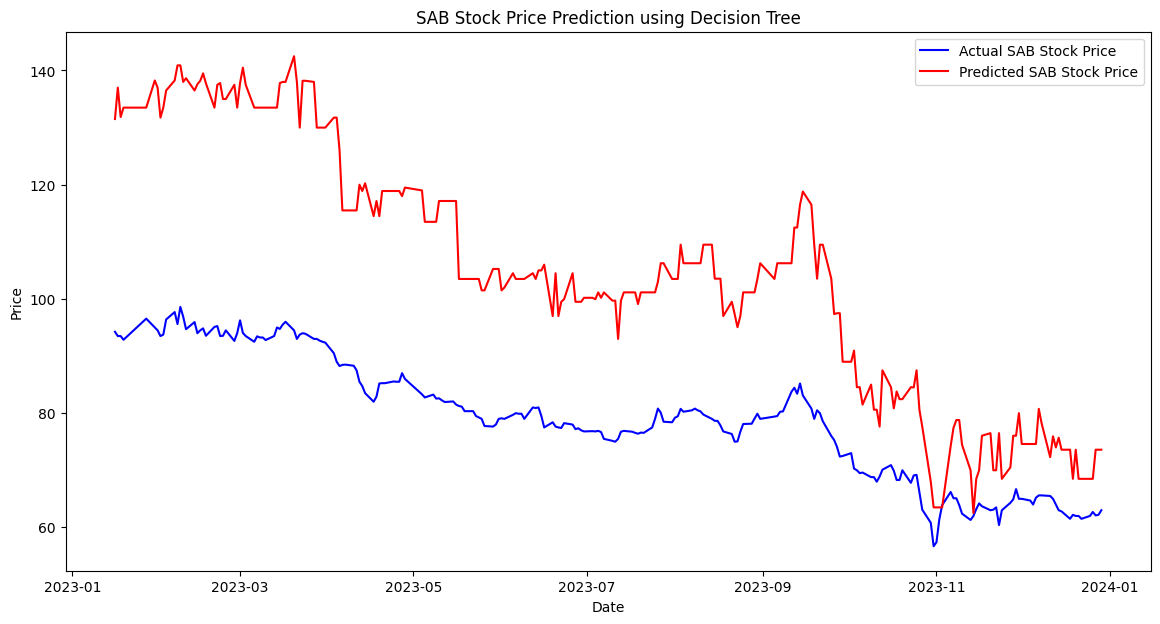

In [32]:
# Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
dt_predictions = dt_model.predict(X_test.reshape(X_test.shape[0], -1))

# Ensure the predicted and actual values have the same length
test_data_trimmed = test_data[-len(dt_predictions):]

# Scale the predictions to match the actual values for visualization
dt_predictions_scaled = scaler.inverse_transform(dt_predictions.reshape(-1, 1)).flatten()

# Calculate MSE
dt_mse = np.mean(np.square(test_data_trimmed['Close'].values - dt_predictions_scaled))
print(f"Decision Tree Model MSE: {dt_mse}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(test_data_trimmed['Date'], test_data_trimmed['Close'], color='blue', label='Actual SAB Stock Price')
plt.plot(test_data_trimmed['Date'], dt_predictions_scaled, color='red', label='Predicted SAB Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SAB Stock Price Prediction using Decision Tree')
plt.legend()
plt.show()

Actual values range: 56.7 - 98.6
Predicted values range: 64.2035 - 140.68250000000003
Random Forest Model MSE: 761.4485308864588


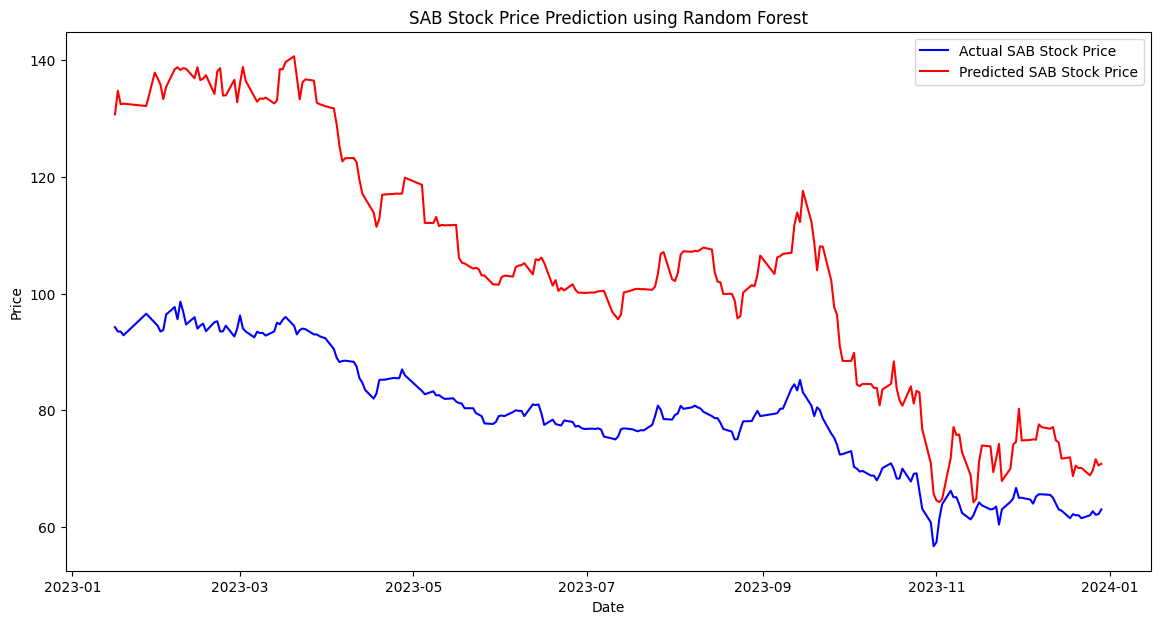

In [36]:
# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
rf_predictions = rf_model.predict(X_test.reshape(X_test.shape[0], -1))

# Ensure the predicted and actual values have the same length
test_data_trimmed = test_data[-len(rf_predictions):]

# Scale the predictions to match the actual values for visualization
rf_predictions_scaled = scaler.inverse_transform(rf_predictions.reshape(-1, 1)).flatten()

# Check the range of the actual and predicted values
print(f"Actual values range: {test_data_trimmed['Close'].min()} - {test_data_trimmed['Close'].max()}")
print(f"Predicted values range: {rf_predictions_scaled.min()} - {rf_predictions_scaled.max()}")

# Calculate MSE
rf_mse = np.mean(np.square(test_data_trimmed['Close'].values - rf_predictions_scaled))
print(f"Random Forest Model MSE: {rf_mse}")

# Normalize the predictions to match the actual values' range for better visualization
min_actual = test_data_trimmed['Close'].min()
max_actual = test_data_trimmed['Close'].max()
rf_predictions_normalized = (rf_predictions_scaled - rf_predictions_scaled.min()) / (rf_predictions_scaled.max() - rf_predictions_scaled.min()) * (max_actual - min_actual) + min_actual

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(test_data_trimmed['Date'], test_data_trimmed['Close'], color='blue', label='Actual SAB Stock Price')
plt.plot(test_data_trimmed['Date'], rf_predictions_scaled, color='red', label='Predicted SAB Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SAB Stock Price Prediction using Random Forest')
plt.legend()
plt.show()

XGBoost Model MSE: 721.9259540302777


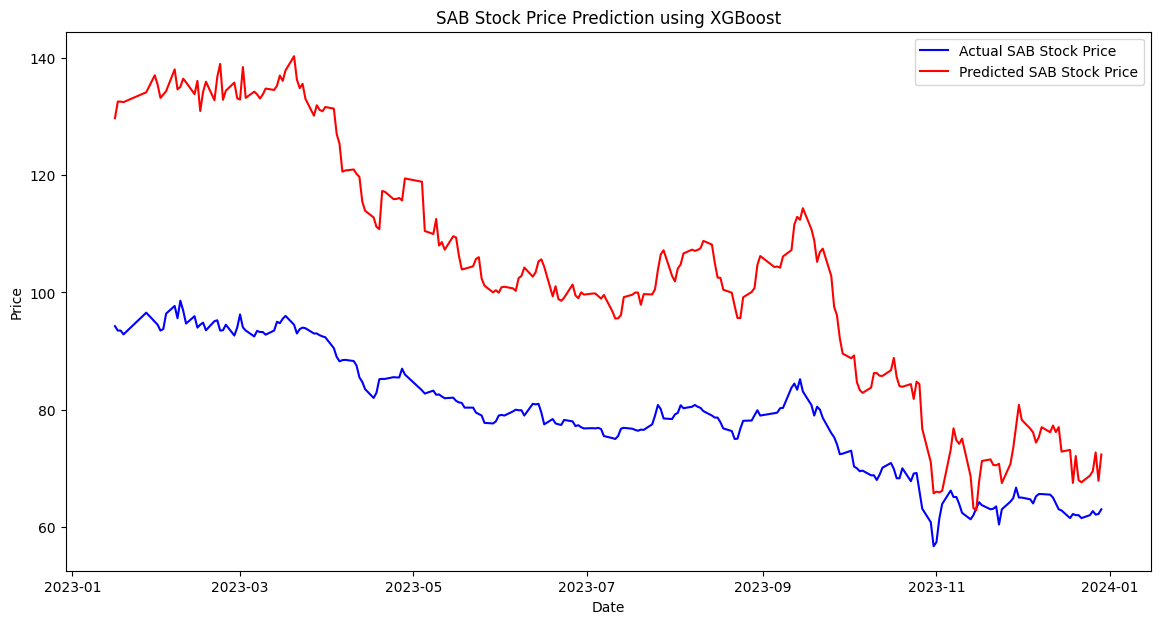

In [37]:
# XGBoost model
xgb_model = XGBRegressor(n_estimators=100)
xgb_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
xgb_predictions = xgb_model.predict(X_test.reshape(X_test.shape[0], -1))

# Ensure the predicted and actual values have the same length
test_data_trimmed = test_data[-len(xgb_predictions):]

# Scale the predictions to match the actual values for visualization
xgb_predictions_scaled = scaler.inverse_transform(xgb_predictions.reshape(-1, 1)).flatten()

# Calculate MSE
xgb_mse = np.mean(np.square(test_data_trimmed['Close'].values - xgb_predictions_scaled))
print(f"XGBoost Model MSE: {xgb_mse}")

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(test_data_trimmed['Date'], test_data_trimmed['Close'], color='blue', label='Actual SAB Stock Price')
plt.plot(test_data_trimmed['Date'], xgb_predictions_scaled, color='red', label='Predicted SAB Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SAB Stock Price Prediction using XGBoost')
plt.legend()
plt.show()

In [52]:
# Function to evaluate model performance
def evaluate_model(test_data, predictions, model_name):
    mse = mean_squared_error(test_data['Close'], predictions)
    mae = mean_absolute_error(test_data['Close'], predictions)
    r2 = r2_score(test_data['Close'], predictions)
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared: {r2}\n")
    return mse, mae, r2

# Evaluate each model
lstm_mse, lstm_mae, lstm_r2 = evaluate_model(test_data_trimmed, lstm_predictions, 'LSTM')
gru_mse, gru_mae, gru_r2 = evaluate_model(test_data_trimmed, gru_predictions, 'GRU')
bi_lstm_mse, bi_lstm_mae, bi_lstm_r2 = evaluate_model(test_data_trimmed, bi_lstm_predictions, 'Bidirectional LSTM')
bi_gru_mse, bi_gru_mae, bi_gru_r2 = evaluate_model(test_data_trimmed, bi_gru_predictions, 'Bidirectional GRU')
dt_mse, dt_mae, dt_r2 = evaluate_model(test_data_trimmed, dt_predictions_scaled, 'Decision Tree')
rf_mse, rf_mae, rf_r2 = evaluate_model(test_data_trimmed, rf_predictions_scaled, 'Random Forest')
xgb_mse, xgb_mae, xgb_r2 = evaluate_model(test_data_trimmed, xgb_predictions_scaled, 'XGBoost')
# Create a DataFrame to compare the models
comparison_df = pd.DataFrame({
    'Model': ['LSTM', 'GRU', 'Bidirectional LSTM', 'Bidirectional GRU', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'MSE': [lstm_mse, gru_mse, bi_lstm_mse, bi_gru_mse, dt_mse, rf_mse, xgb_mse],
    'MAE': [lstm_mae, gru_mae, bi_lstm_mae, bi_gru_mae, dt_mae, rf_mae, xgb_mae],
    'R-squared': [lstm_r2, gru_r2, bi_lstm_r2, bi_gru_r2, dt_r2, rf_r2, xgb_r2]
})

print(comparison_df)


LSTM Performance:
Mean Squared Error (MSE): 809.4264993020029
Mean Absolute Error (MAE): 26.143808676401772
R-squared: -6.169536619506011

GRU Performance:
Mean Squared Error (MSE): 761.418598697986
Mean Absolute Error (MAE): 25.437595529556276
R-squared: -5.744304184315274

Bidirectional LSTM Performance:
Mean Squared Error (MSE): 661.7432880411119
Mean Absolute Error (MAE): 23.71650201479594
R-squared: -4.861425021807815

Bidirectional GRU Performance:
Mean Squared Error (MSE): 650.3792891691302
Mean Absolute Error (MAE): 23.127321360905967
R-squared: -4.760767820533881

Decision Tree Performance:
Mean Squared Error (MSE): 779.4260208333334
Mean Absolute Error (MAE): 25.46125
R-squared: -5.903805846953708

Random Forest Performance:
Mean Squared Error (MSE): 761.4485308864588
Mean Absolute Error (MAE): 25.175056250000008
R-squared: -5.744569310205695

XGBoost Performance:
Mean Squared Error (MSE): 721.9259540302777
Mean Absolute Error (MAE): 24.58965017954508
R-squared: -5.3944960641

                Model         MSE        MAE  R-squared
0                LSTM  809.426499  26.143809  -6.169537
1                 GRU  761.418599  25.437596  -5.744304
2  Bidirectional LSTM  661.743288  23.716502  -4.861425
3   Bidirectional GRU  650.379289  23.127321  -4.760768
4       Decision Tree  779.426021  25.461250  -5.903806
5       Random Forest  761.448531  25.175056  -5.744569
6             XGBoost  721.925954  24.589650  -5.394496


In [69]:
# Concatenate the stock data for a continuous timeline
sab_stock = pd.concat([sab_stock_2018_2022, sab_stock_2023])
sab_stock['Date'] = pd.to_datetime(sab_stock['Date'])
sab_stock.sort_values('Date', inplace=True)
sab_stock.reset_index(drop=True, inplace=True)

# Prepare the data for modeling
def prepare_data(stock, time_step=60):
    data = stock['Close'].values
    data = data.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler

# Split the data
train_size = int(len(sab_stock) * 0.8)
train_data, test_data = sab_stock[:train_size], sab_stock[train_size:]

X_train, y_train, scaler = prepare_data(train_data)
X_test, y_test, _ = prepare_data(test_data)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Train the GRU model
gru_model = Sequential()
gru_model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(50, return_sequences=False))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Train the Bidirectional LSTM model
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
bi_lstm_model.add(Dropout(0.2))
bi_lstm_model.add(Bidirectional(LSTM(50, return_sequences=False)))
bi_lstm_model.add(Dropout(0.2))
bi_lstm_model.add(Dense(1))
bi_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
bi_lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Train the Bidirectional GRU model
bi_gru_model = Sequential()
bi_gru_model.add(Bidirectional(GRU(50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
bi_gru_model.add(Dropout(0.2))
bi_gru_model.add(Bidirectional(GRU(50, return_sequences=False)))
bi_gru_model.add(Dropout(0.2))
bi_gru_model.add(Dense(1))
bi_gru_model.compile(optimizer='adam', loss='mean_squared_error')
bi_gru_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Train the Decision Tree model
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_flat, y_train)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train_flat, y_train)

# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100)
xgb_model.fit(X_train_flat, y_train)

Epoch 1/100


/Users/collide0412/grad_prj/.conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.1129 - val_loss: 0.0077
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0091 - val_loss: 0.0017
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0067 - val_loss: 0.0015
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0057 - val_loss: 0.0015
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0060 - val_loss: 0.0014
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0055 - val_loss: 0.0014
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0057 - val_loss: 0.0014
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0049 - val_loss: 0.0013
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0053 - val_loss: 0.0016
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0056 - val_loss: 0.0014
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0042 - val_loss: 0.0012
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0

/Users/collide0412/grad_prj/.conda/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - loss: 0.1057 - val_loss: 0.0072
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0110 - val_loss: 0.0022
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0070 - val_loss: 0.0020
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0056 - val_loss: 0.0017
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0051 - val_loss: 0.0018
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0041 - val_loss: 0.0011
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0044 - val_loss: 0.0015
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0042 - val_loss: 0.0010
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0037 - val_loss: 9.7892e-04
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0038 - val_loss: 9.2306e-04
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.1149 - val_loss: 0.0027
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - lo

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

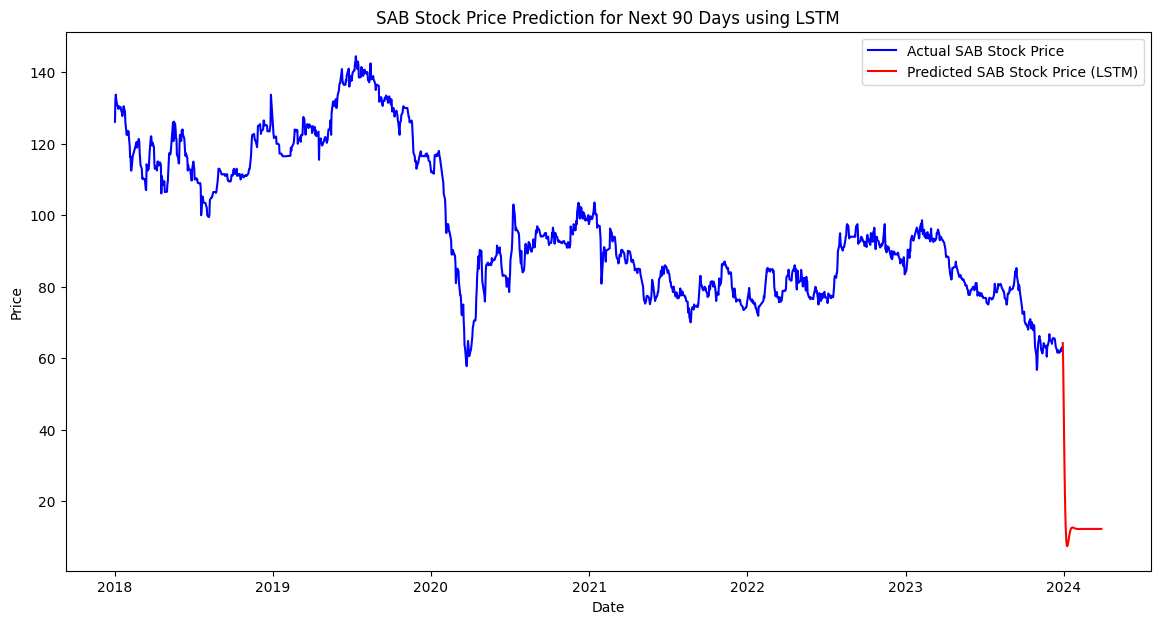

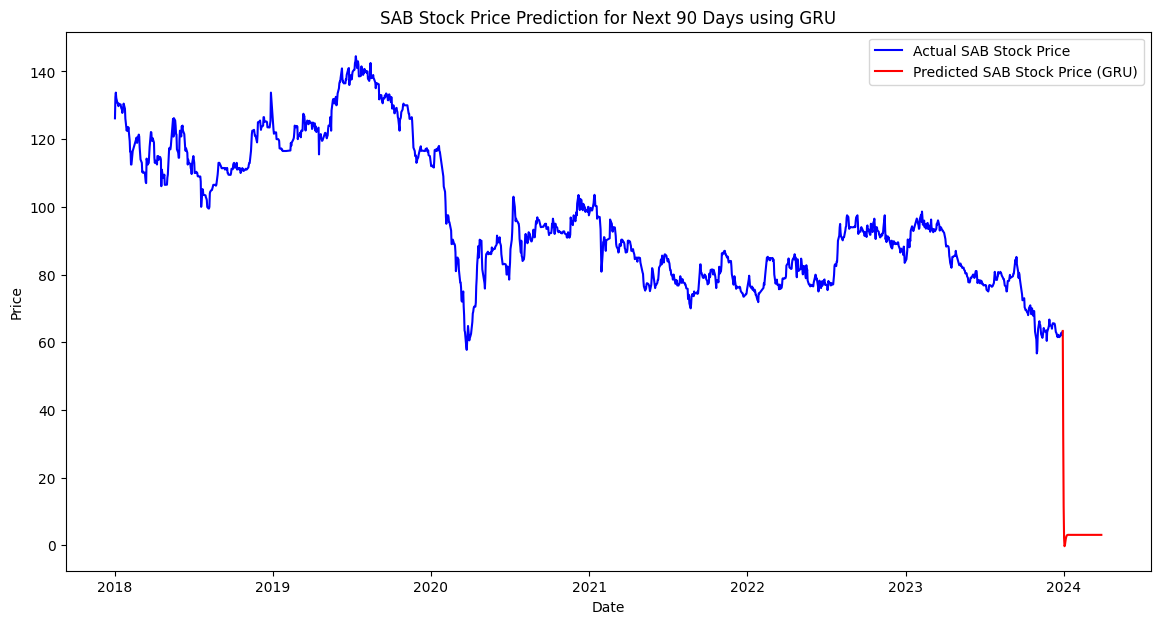

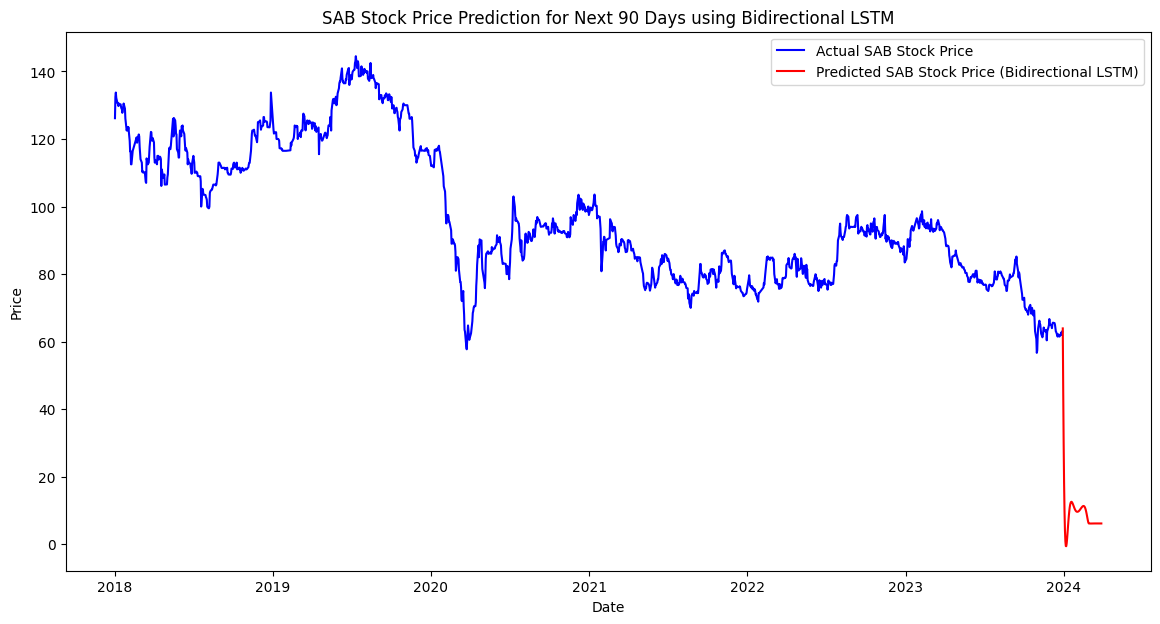

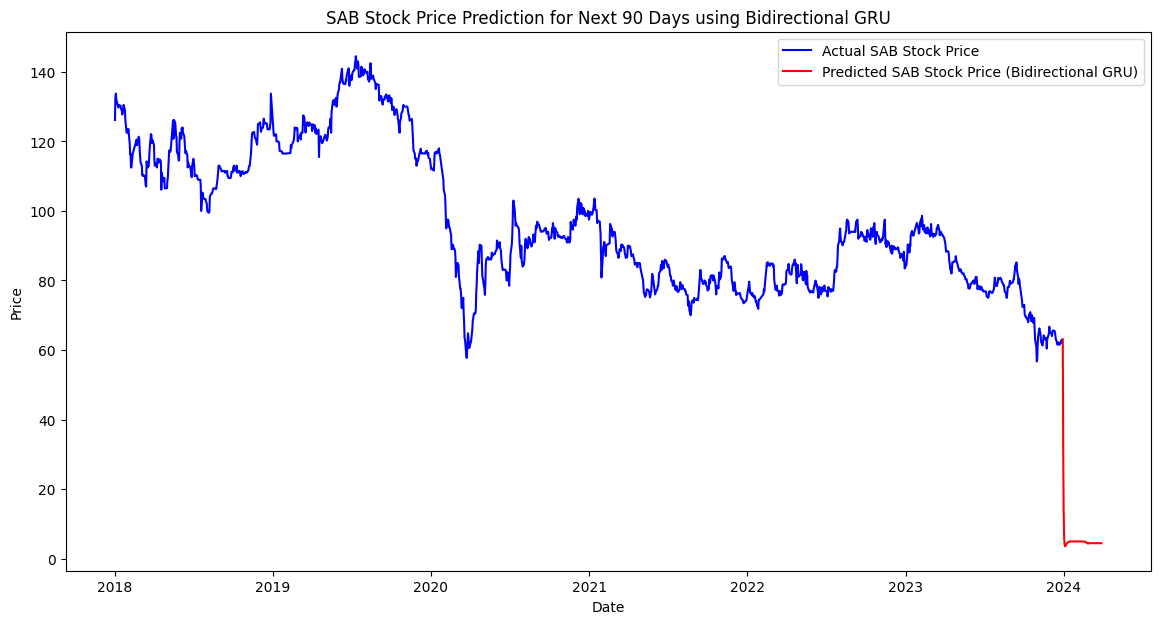

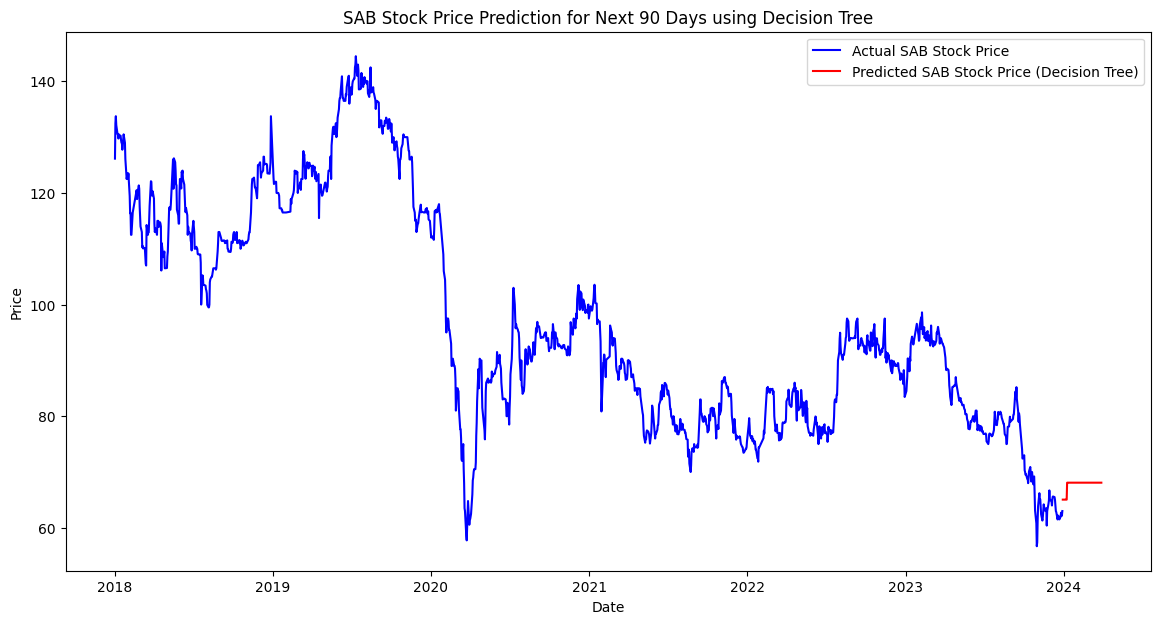

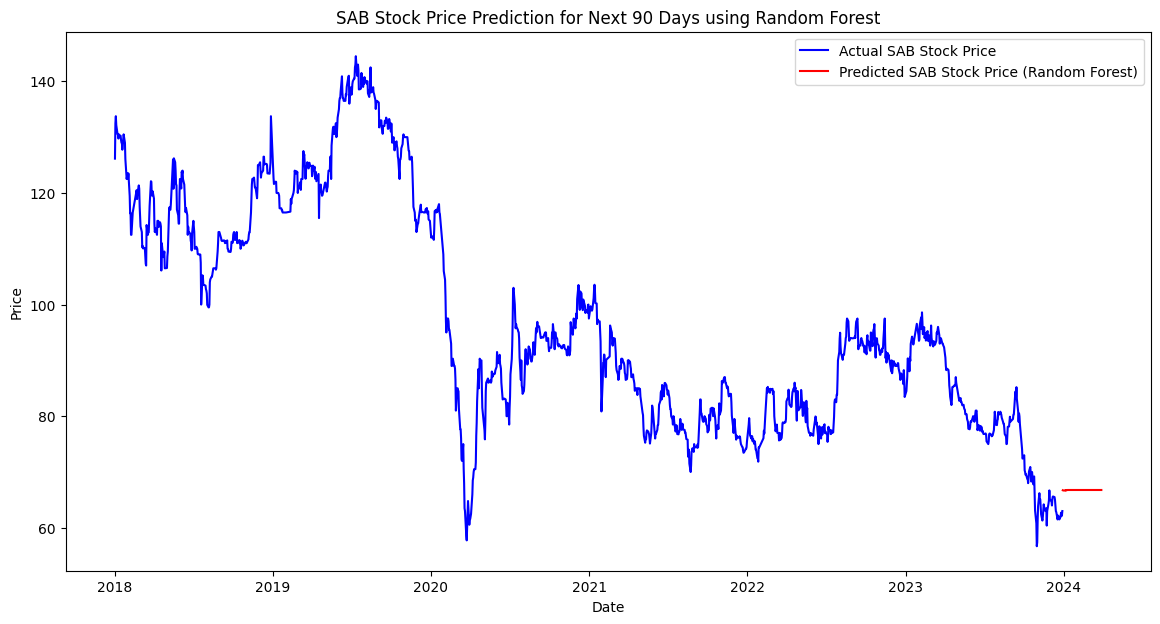

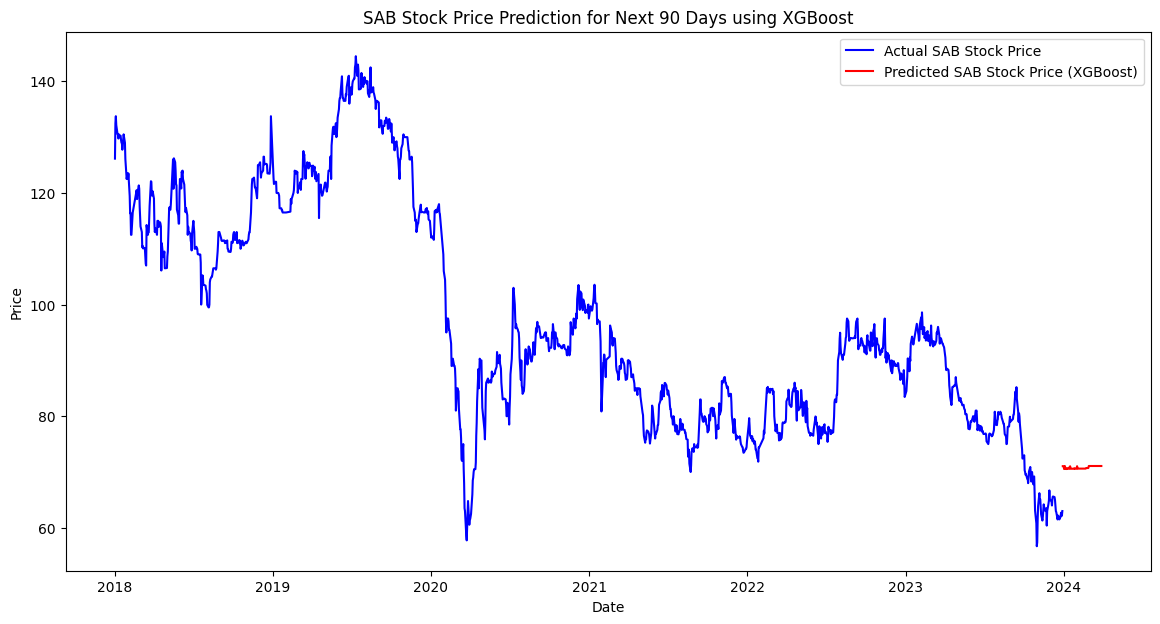

In [65]:
# Prepare date range for future predictions
last_date = sab_stock['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=91, inclusive='right')

# Function to plot future predictions
def plot_future_predictions(future_predictions, model_name):
    plt.figure(figsize=(14, 7))
    plt.plot(sab_stock['Date'], sab_stock['Close'], color='blue', label='Actual SAB Stock Price')
    plt.plot(future_dates, future_predictions, color='red', label=f'Predicted SAB Stock Price ({model_name})')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'SAB Stock Price Prediction for Next 90 Days using {model_name}')
    plt.legend()
    plt.show()

# Plot future predictions for each model
plot_future_predictions(future_predictions_lstm, 'LSTM')
plot_future_predictions(future_predictions_gru, 'GRU')
plot_future_predictions(future_predictions_bi_lstm, 'Bidirectional LSTM')
plot_future_predictions(future_predictions_bi_gru, 'Bidirectional GRU')
plot_future_predictions(future_predictions_dt, 'Decision Tree')
plot_future_predictions(future_predictions_rf, 'Random Forest')
plot_future_predictions(future_predictions_xgb, 'XGBoost')


In [72]:
# Display first few rows of each dataset
sab_stock_2018_2022_head = sab_stock_2018_2022.head()
sab_stock_2023_head = sab_stock_2023.head()
vn_index_2018_2023_head = vn_index_2018_2023.head()

(sab_stock_2018_2022_head, sab_stock_2023_head, vn_index_2018_2023_head)

# Display the structure of each dataset
sab_stock_2018_2022.info(), sab_stock_2023.info(), vn_index_2018_2023.info()

# Display first few rows of each dataset
sab_stock_2018_2022_head, sab_stock_2023_head, vn_index_2018_2023_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1249 non-null   datetime64[ns]
 1   Close   1249 non-null   float64       
 2   Open    1249 non-null   float64       
 3   High    1249 non-null   float64       
 4   Low     1249 non-null   float64       
 5   Volume  1249 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 58.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    249 non-null    datetime64[ns]
 1   Close   249 non-null    float64       
 2   Open    249 non-null    float64       
 3   High    249 non-null    float64       
 4   Low     249 non-null    float64       
 5   Volume  249 non-null    int64         
dtypes: datetime

(        Date   Close    Open    High     Low  Volume
 0 2018-01-02  126.15  127.00  127.35  124.95  116190
 1 2018-01-03  132.50  126.15  132.50  126.15  231500
 2 2018-01-04  133.75  134.00  134.35  131.50  238800
 3 2018-01-05  132.15  134.00  134.25  131.55  131870
 4 2018-01-08  130.50  131.50  132.00  129.50  115690,
         Date  Close   Open   High    Low  Volume
 0 2023-01-03  84.50  85.55  86.75  84.10  121700
 1 2023-01-04  85.75  84.60  87.00  84.50  116900
 2 2023-01-05  87.10  86.00  91.75  85.75  255300
 3 2023-01-06  90.35  88.60  91.30  87.10  130100
 4 2023-01-09  89.80  89.75  91.00  87.90   46900,
         Date    Close     Open     High      Low     Volume
 0 2018-01-02   995.77   986.05   996.18   984.24  172887390
 1 2018-01-03  1005.67   999.86  1010.21   995.77  212432620
 2 2018-01-04  1019.75  1009.37  1019.75  1005.67  235169670
 3 2018-01-05  1012.65  1020.34  1020.60  1010.65  265519370
 4 2018-01-08  1022.90  1011.36  1022.90  1004.89  234755510)

In [82]:
# Combine SAB stock price data
sab_stock = pd.concat([sab_stock_2018_2022, sab_stock_2023])
sab_stock.sort_values('Date', inplace=True)
sab_stock.reset_index(drop=True, inplace=True)

# Function to process data for prediction
def process_data(data, n_steps=60):
    data = data[['Close']].values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    X, y = [], []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i-n_steps:i, 0])
        y.append(scaled_data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler

# Prepare the data
n_steps = 60
X_sab, y_sab, scaler_sab = process_data(sab_stock, n_steps)
X_vn, y_vn, scaler_vn = process_data(vn_index_2018_2023, n_steps)

# Train-Test Split
split = int(len(X_sab) * 0.8)
X_train_sab, X_test_sab = X_sab[:split], X_sab[split:]
y_train_sab, y_test_sab = y_sab[:split], y_sab[split:]

split = int(len(X_vn) * 0.8)
X_train_vn, X_test_vn = X_vn[:split], X_vn[split:]
y_train_vn, y_test_vn = y_vn[:split], y_vn[split:]


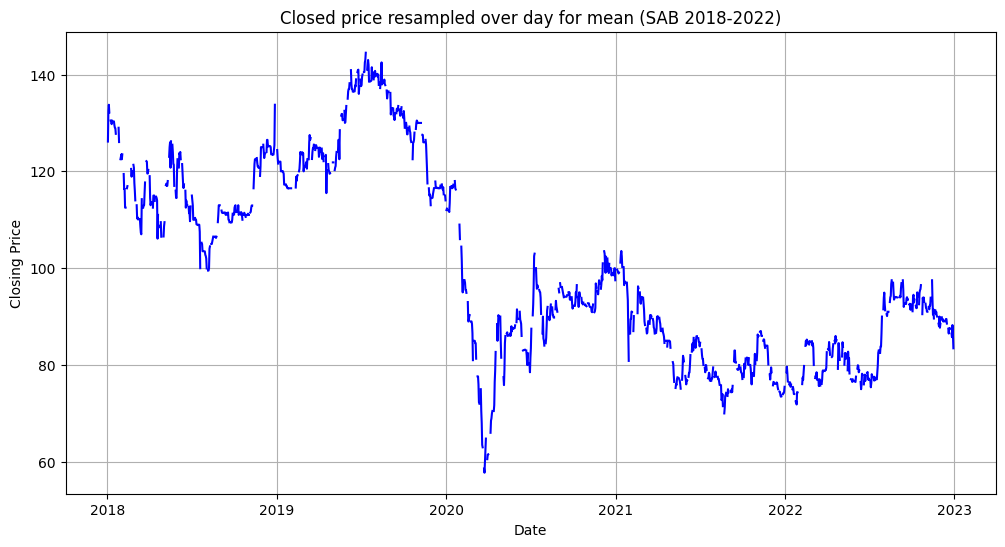

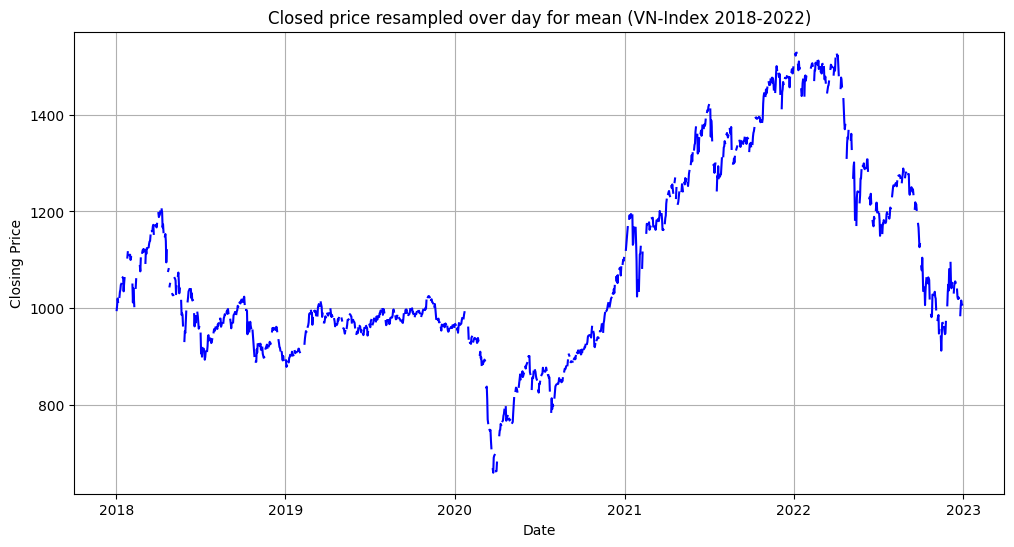

In [78]:
# Combine SAB stock price data
sab_stock = pd.concat([sab_stock_2018_2022, sab_stock_2023])
sab_stock.sort_values('Date', inplace=True)
sab_stock.reset_index(drop=True, inplace=True)

# Function to plot the resampled closing price over a given period
def plot_resampled(data, title):
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    data_resampled = data.resample('D').mean()
    plt.figure(figsize=(12, 6))
    plt.plot(data_resampled.index, data_resampled['Close'], color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

# Resample SAB stock data for the period 2018-2022 and plot
plot_resampled(sab_stock_2018_2022, 'Closed price resampled over day for mean (SAB 2018-2022)')

# Resample VN-Index data for the period 2018-2022 and plot
plot_resampled(vn_index_2018_2023[vn_index_2018_2023['Date'] < '2023-01-01'], 'Closed price resampled over day for mean (VN-Index 2018-2022)')

In [104]:
# Print the first few rows of both dataframes to check if they contain the 'Date' column
print(sab_stock_2018_2022.head())
print(sab_stock_2023.head())

             Close    Open    High     Low  Volume
Date                                              
2018-01-02  126.15  127.00  127.35  124.95  116190
2018-01-03  132.50  126.15  132.50  126.15  231500
2018-01-04  133.75  134.00  134.35  131.50  238800
2018-01-05  132.15  134.00  134.25  131.55  131870
2018-01-08  130.50  131.50  132.00  129.50  115690
        Date  Close   Open   High    Low  Volume
0 2023-01-03  84.50  85.55  86.75  84.10  121700
1 2023-01-04  85.75  84.60  87.00  84.50  116900
2 2023-01-05  87.10  86.00  91.75  85.75  255300
3 2023-01-06  90.35  88.60  91.30  87.10  130100
4 2023-01-09  89.80  89.75  91.00  87.90   46900


Epoch 1/100


/Users/collide0412/grad_prj/.conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0772
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0097
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0058
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0058
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0053
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0049
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0049
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0059
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0051
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0050
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0046
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0040
Epoch 13/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0039
Epoch 14/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0040
Epoch 15/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0044
E

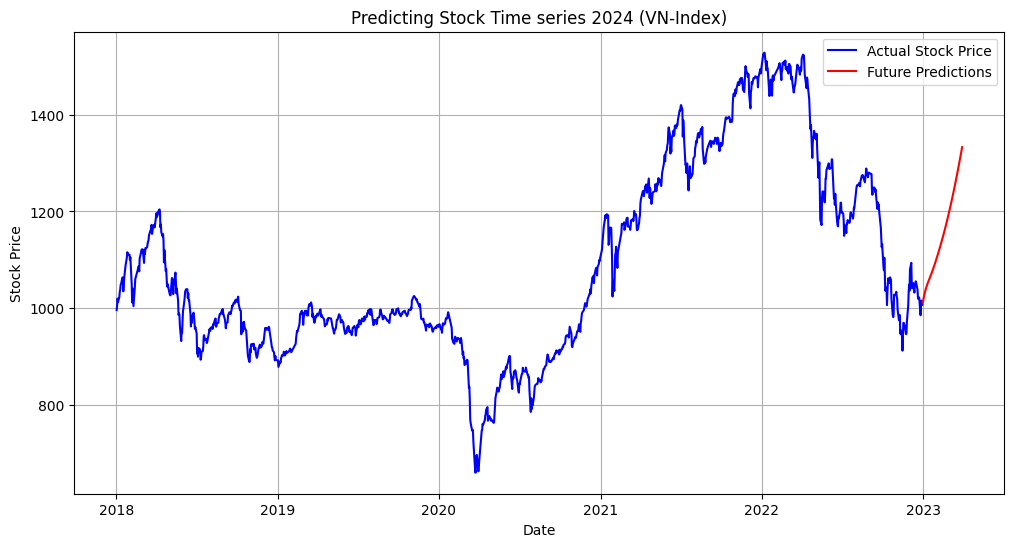

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━

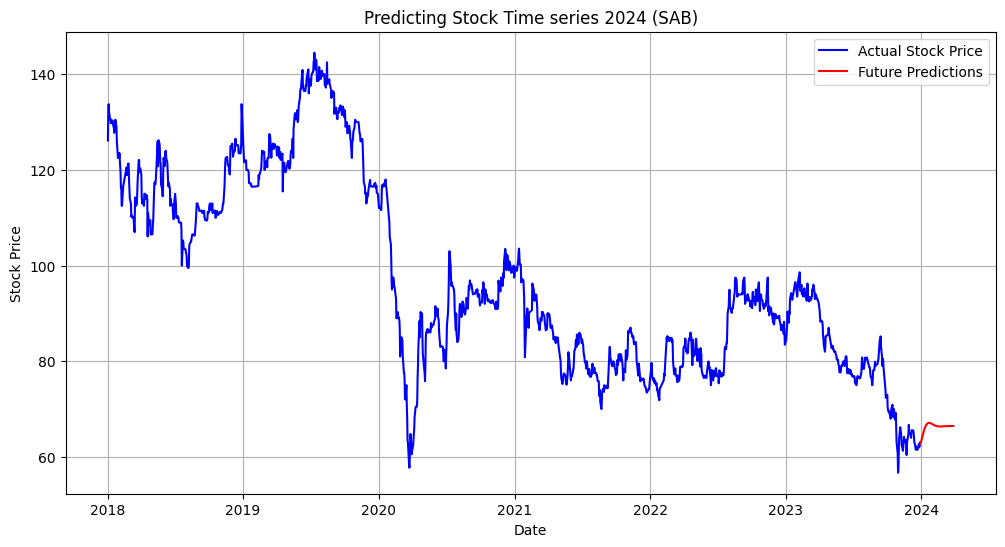

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# Function to process data for prediction
def process_data(data, n_steps=60):
    data = data[['Close']].values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    X, y = [], []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i-n_steps:i, 0])
        y.append(scaled_data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler

# Function to create LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to predict the future stock prices
def predict_future(model, data, scaler, n_future=90):
    predictions = []
    last_data = data[-1]
    for _ in range(n_future):
        prediction = model.predict(last_data.reshape(1, last_data.shape[0], 1))
        predictions.append(prediction[0, 0])
        last_data = np.append(last_data[1:], prediction)
        last_data = last_data.reshape(-1, 1)
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    return predictions

# Function to plot the future predictions
def plot_future_predictions(actual, future_pred, title):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, color='blue', label='Actual Stock Price')
    future_dates = pd.date_range(start=actual.index[-1], periods=len(future_pred) + 1)
    plt.plot(future_dates[1:], future_pred, color='red', label='Future Predictions')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Combine SAB stock price data
sab_stock_2018_2022['Date'] = pd.to_datetime(sab_stock_2018_2022.index)
sab_stock = pd.concat([sab_stock_2018_2022, sab_stock_2023], ignore_index=True)
sab_stock.sort_values('Date', inplace=True)
sab_stock.reset_index(drop=True, inplace=True)

# Ensure all date values are valid
sab_stock['Date'] = pd.to_datetime(sab_stock['Date'], errors='coerce')
sab_stock.dropna(subset=['Date'], inplace=True)

# Prepare the data
n_steps = 60
X_sab, y_sab, scaler_sab = process_data(sab_stock, n_steps)
X_vn, y_vn, scaler_vn = process_data(vn_index_2018_2023, n_steps)

# Train-Test Split
split = int(len(X_sab) * 0.8)
X_train_sab, X_test_sab = X_sab[:split], X_sab[split:]
y_train_sab, y_test_sab = y_sab[:split], y_sab[split:]

split = int(len(X_vn) * 0.8)
X_train_vn, X_test_vn = X_vn[:split], X_vn[split:]
y_train_vn, y_test_vn = y_vn[:split], y_vn[split:]

# Create and train the model for SAB's stock price
lstm_model_sab = create_lstm_model((X_train_sab.shape[1], 1))
lstm_model_sab.fit(X_train_sab, y_train_sab, epochs=100, batch_size=32)

# Create and train the model for VN-Index
lstm_model_vn = create_lstm_model((X_train_vn.shape[1], 1))
lstm_model_vn.fit(X_train_vn, y_train_vn, epochs=100, batch_size=32)

# Predict the next 90 days for VN-Index and plot
future_predictions_vn = predict_future(lstm_model_vn, X_test_vn, scaler_vn)
plot_future_predictions(vn_index_2018_2023.set_index('Date')['Close'], future_predictions_vn, 'Predicting Stock Time series 2024 (VN-Index)')

# Predict the next 90 days for SAB and plot
future_predictions_sab = predict_future(lstm_model_sab, X_test_sab, scaler_sab)
plot_future_predictions(sab_stock.set_index('Date')['Close'], future_predictions_sab, 'Predicting Stock Time series 2024 (SAB)')


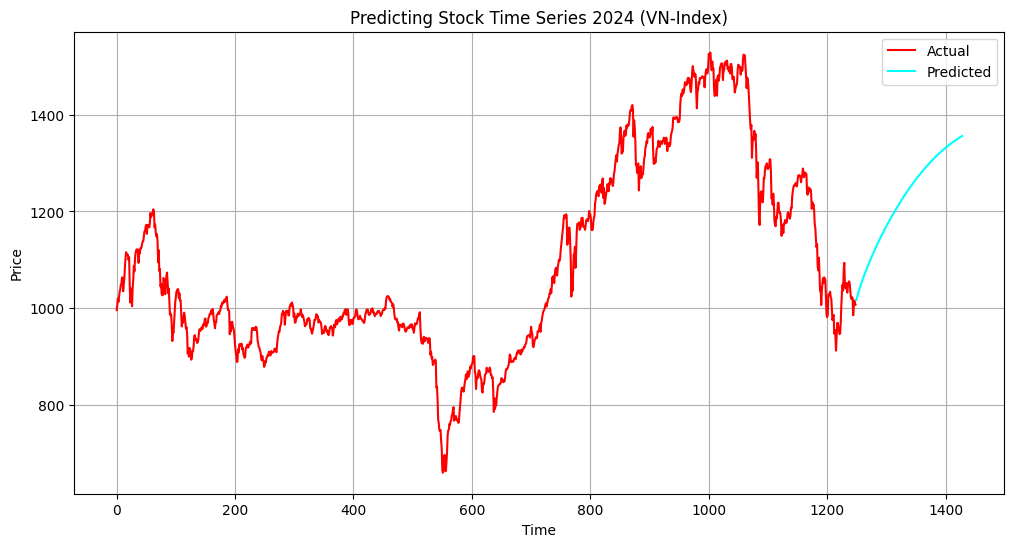

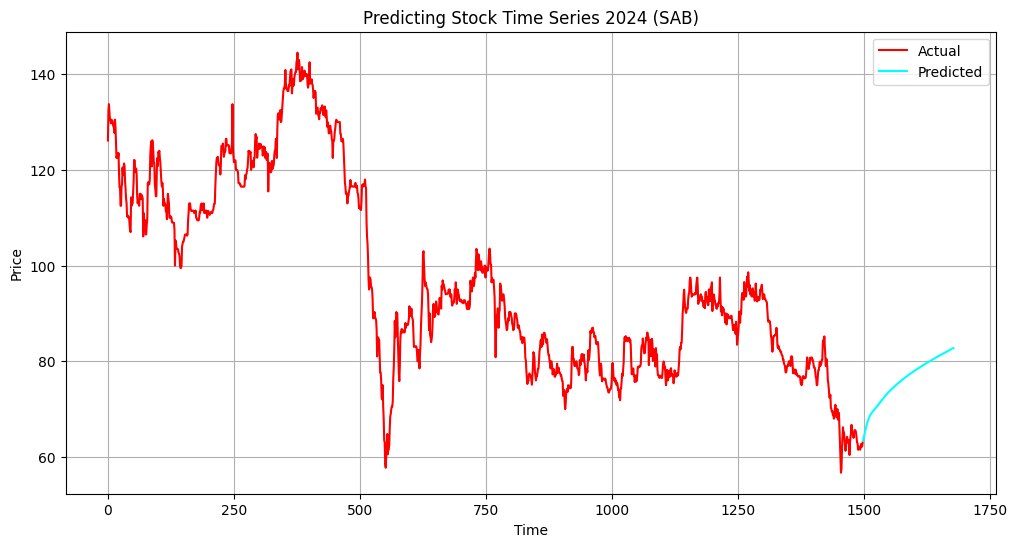

In [150]:
# tranh cai nay ra!
def plot_predictions(actual, future_pred, title):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, color='red', label='Actual')
    plt.plot(np.arange(len(actual), len(actual) + len(future_pred)), future_pred, color='cyan', label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_predictions(vn_index['Close'], future_predictions_vn, 'Predicting Stock Time Series 2024 (VN-Index)')
plot_predictions(sab_stock['Close'], future_predictions_sab, 'Predicting Stock Time Series 2024 (SAB)')


In [170]:
import xgboost as xgb

# Data preparation
vn_index = pd.read_excel('VN-Index-2018-2023.xlsx')
sab_stock_2018_2022 = pd.read_excel('SAB stock price 2018-2022.xlsx')
sab_stock_2023 = pd.read_excel('SAB stock price 2023.xlsx')
sab_stock = pd.concat([sab_stock_2018_2022, sab_stock_2023])
sab_stock.sort_values('Date', inplace=True)
sab_stock.reset_index(drop=True, inplace=True)

def preprocess_data(data, column='Close'):
    data = data[[column]].values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    X, y = [], []
    for i in range(60, len(scaled_data)):
        X.append(scaled_data[i-60:i, 0])
        y.append(scaled_data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler

# Preprocess data
X_vn_rnn, y_vn, vn_index_scaler = preprocess_data(vn_index)
X_sab_rnn, y_sab, sab_stock_scaler = preprocess_data(sab_stock)

X_vn_flat = X_vn_rnn.reshape(X_vn_rnn.shape[0], -1)
X_sab_flat = X_sab_rnn.reshape(X_sab_rnn.shape[0], -1)

# Define RNN models
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(GRU(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_bidirectional_lstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(units=50)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_bidirectional_gru_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(GRU(units=50, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Bidirectional(GRU(units=50)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define tree and ML models
tree_models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor()
}

ml_models = {
    'SVM': SVR(),
    'GMM': GaussianMixture(n_components=3),
    'KMeans': KMeans(n_clusters=3)
}

# Train models
models = {
    'LSTM': create_lstm_model((X_vn_rnn.shape[1], 1)),
    'GRU': create_gru_model((X_vn_rnn.shape[1], 1)),
    'Bidirectional LSTM': create_bidirectional_lstm_model((X_vn_rnn.shape[1], 1)),
    'Bidirectional GRU': create_bidirectional_gru_model((X_vn_rnn.shape[1], 1))
}

for name, model in models.items():
    model.fit(X_vn_rnn, y_vn, epochs=50, batch_size=32)
    model.fit(X_sab_rnn, y_sab, epochs=50, batch_size=32)

for name, model in tree_models.items():
    model.fit(X_vn_flat, y_vn)
    model.fit(X_sab_flat, y_sab)

for name, model in ml_models.items():
    model.fit(X_vn_flat, y_vn)
    model.fit(X_sab_flat, y_sab)

def predict_rnn_future(model, data, scaler, days=180):
    predictions = []
    last_data = data[-60:].reshape((1, 60, 1))  # Ensure correct shape initially
    for _ in range(days):
        prediction = model.predict(last_data)
        predictions.append(prediction[0, 0])
        last_data = np.append(last_data[0][1:], prediction).reshape((1, 60, 1))
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


def predict_tree_future(model, data, scaler, days=180):
    future_predictions = []
    last_data = data[-60:]
    for _ in range(days):
        prediction = model.predict(last_data.reshape(1, -1))
        future_predictions.append(prediction[0])
        last_data = np.append(last_data[1:], prediction)
    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

def predict_ml_future(model, data, scaler, days=180):
    future_predictions = []
    last_data = data[-60:]
    for _ in range(days):
        prediction = model.predict(last_data.reshape(1, -1))
        future_predictions.append(prediction[0])
        last_data = np.append(last_data[1:], prediction)
    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))




/Users/collide0412/grad_prj/.conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/collide0412/grad_prj/.conda/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0918
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0059
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0043
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0035
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0047
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0043
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0039
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0035
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0035
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0035
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0037
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0046
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0033
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0040
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0029
Epoc

In [177]:
def predict_rnn_future(model, data, scaler, days=180):
    predictions = []
    last_data = data[-60:, 0].reshape((60, 1))  # Use only the last 60 days and ensure correct shape
    last_data = last_data.reshape((1, 60, 1))  # Ensure correct shape initially
    for _ in range(days):
        prediction = model.predict(last_data)
        predictions.append(prediction[0, 0])
        last_data = np.append(last_data[:, 1:, :], np.reshape(prediction, (1, 1, 1)), axis=1)
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Ensure the RNN input data is correctly shaped before making predictions
X_vn_rnn_reshaped = X_vn_rnn.reshape((X_vn_rnn.shape[0], X_vn_rnn.shape[1], 1))
X_sab_rnn_reshaped = X_sab_rnn.reshape((X_sab_rnn.shape[0], X_sab_rnn.shape[1], 1))

predictions_vn = {}
predictions_sab = {}
for name, model in models.items():
    predictions_vn[name] = predict_rnn_future(model, X_vn_rnn_reshaped, vn_index_scaler)
    predictions_sab[name] = predict_rnn_future(model, X_sab_rnn_reshaped, sab_stock_scaler)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━

In [187]:
# Combine SAB stock data
sab_stock = pd.concat([sab_stock_2018_2022, sab_stock_2023])
sab_stock.sort_values('Date', inplace=True)
sab_stock.reset_index(drop=True, inplace=True)

# Function to preprocess data
def preprocess_data(data, n_steps=60):
    data = data[['Close']].values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    X, y = [], []
    for i in range(n_steps, len(scaled_data)):
        X.append(scaled_data[i-n_steps:i, 0])
        y.append(scaled_data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y, scaler

# Preprocess the data
n_steps = 60
X_vn, y_vn, scaler_vn = preprocess_data(vn_index, n_steps)
X_sab, y_sab, scaler_sab = preprocess_data(sab_stock, n_steps)

# Train-test split
split_vn = int(len(X_vn) * 0.8)
split_sab = int(len(X_sab) * 0.8)

X_train_vn, X_test_vn = X_vn[:split_vn], X_vn[split_vn:]
y_train_vn, y_test_vn = y_vn[:split_vn], y_vn[split_vn:]

X_train_sab, X_test_sab = X_sab[:split_sab], X_sab[split_sab:]
y_train_sab, y_test_sab = y_sab[:split_sab], y_sab[split_sab:]

In [193]:
from tensorflow.keras.layers import GRU

def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and train the GRU model
gru_model_vn = create_gru_model((X_train_vn.shape[1], 1))
gru_model_vn.fit(X_train_vn, y_train_vn, epochs=100, batch_size=32)

gru_model_sab = create_gru_model((X_train_sab.shape[1], 1))
gru_model_sab.fit(X_train_sab, y_train_sab, epochs=100, batch_size=32)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and train the LSTM model
lstm_model_vn = create_lstm_model((X_train_vn.shape[1], 1))
lstm_model_vn.fit(X_train_vn, y_train_vn, epochs=100, batch_size=32)

lstm_model_sab = create_lstm_model((X_train_sab.shape[1], 1))
lstm_model_sab.fit(X_train_sab, y_train_sab, epochs=100, batch_size=32)

from tensorflow.keras.layers import Bidirectional

def create_bidirectional_lstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(units=50)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and train the Bidirectional LSTM model
bidirectional_lstm_model_vn = create_bidirectional_lstm_model((X_train_vn.shape[1], 1))
bidirectional_lstm_model_vn.fit(X_train_vn, y_train_vn, epochs=100, batch_size=32)

bidirectional_lstm_model_sab = create_bidirectional_lstm_model((X_train_sab.shape[1], 1))
bidirectional_lstm_model_sab.fit(X_train_sab, y_train_sab, epochs=100, batch_size=32)

def create_bidirectional_gru_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(GRU(units=50, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Bidirectional(GRU(units=50, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(GRU(units=50)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and train the Bidirectional GRU model
bidirectional_gru_model_vn = create_bidirectional_gru_model((X_train_vn.shape[1], 1))
bidirectional_gru_model_vn.fit(X_train_vn, y_train_vn, epochs=100, batch_size=32)

bidirectional_gru_model_sab = create_bidirectional_gru_model((X_train_sab.shape[1], 1))
bidirectional_gru_model_sab.fit(X_train_sab, y_train_sab, epochs=100, batch_size=32)



Epoch 1/100


/Users/collide0412/grad_prj/.conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.0677
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0085
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0045
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0047
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0043
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0034
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0035
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0034
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0031
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0025
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0028
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0028
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0031
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0026
Epoch 15/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0026


/Users/collide0412/grad_prj/.conda/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0477
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0048
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0042
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0035
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0035
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0029
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0028
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0031
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0029
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0024
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0023
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0021
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0019
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0020
Epoch 15/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0023
E

In [195]:
def predict(model, X):
    return model.predict(X)

def plot_comparison(actual_train, actual_valid, train_pred, valid_pred, title):
    plt.figure(figsize=(12, 6))
    plt.plot(actual_train, color='blue', label='Actual Train Stock Price')
    plt.plot(range(len(actual_train), len(actual_train) + len(actual_valid)), actual_valid, color='blue')
    plt.plot(train_pred, color='red', label='Train Predictions')
    plt.plot(range(len(train_pred), len(train_pred) + len(valid_pred)), valid_pred, color='green', label='Valid Predictions')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


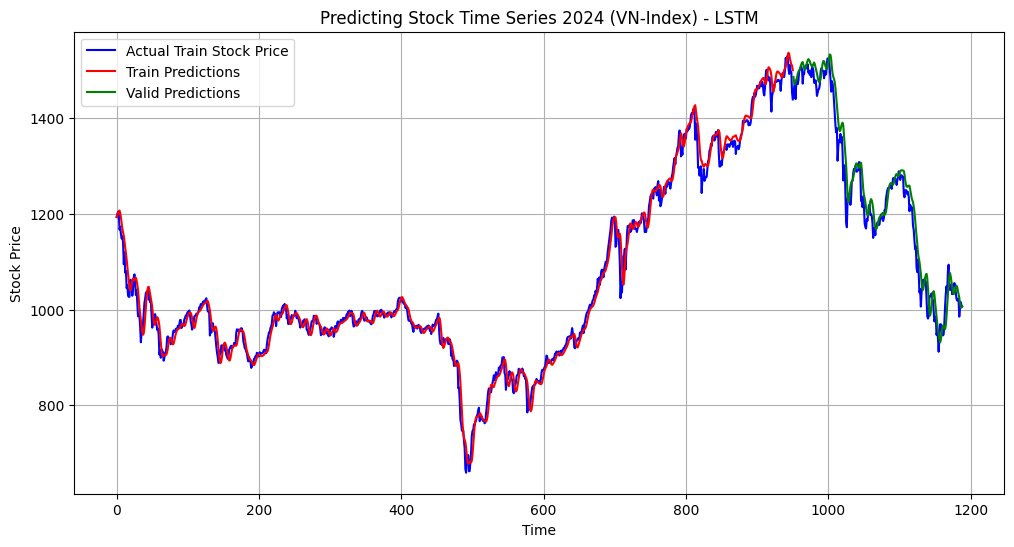

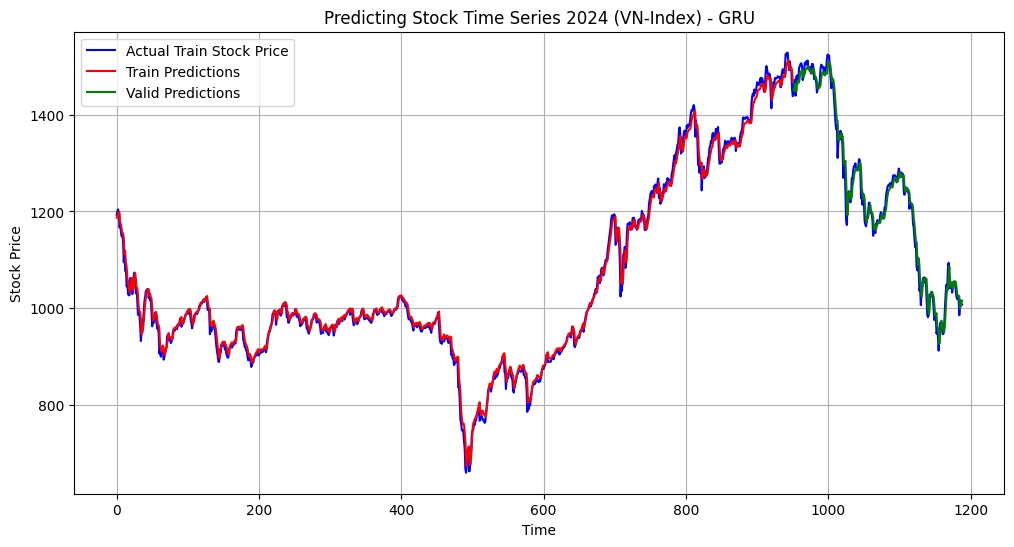

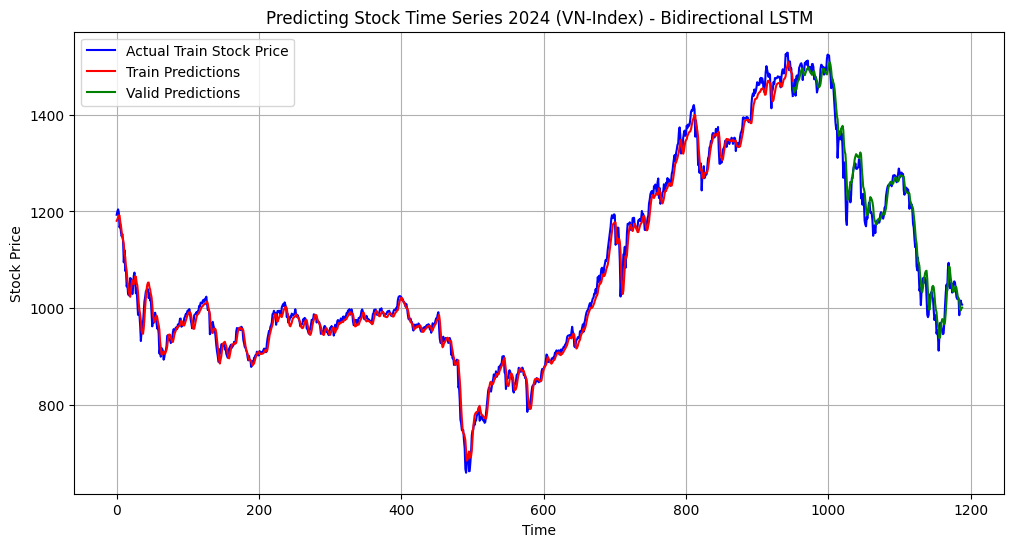

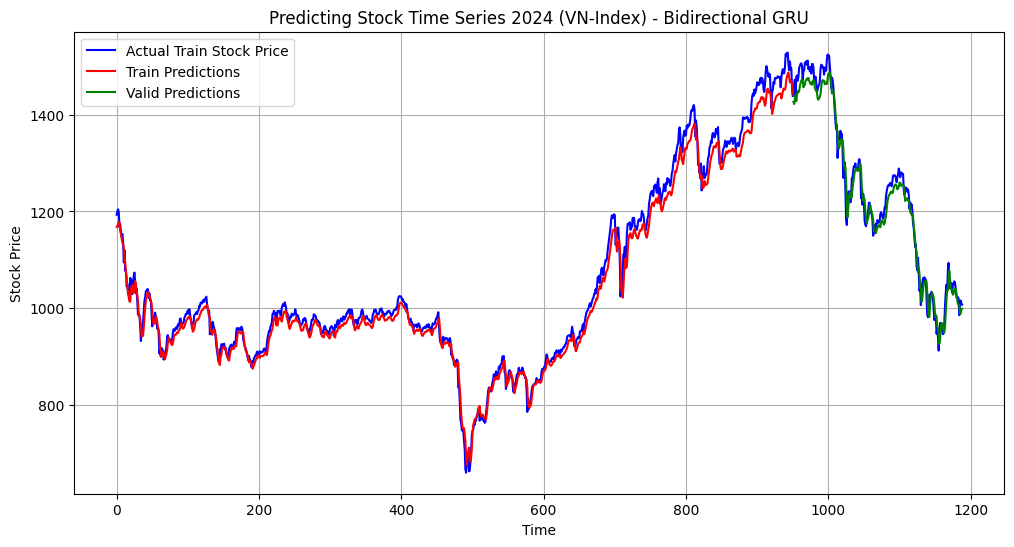

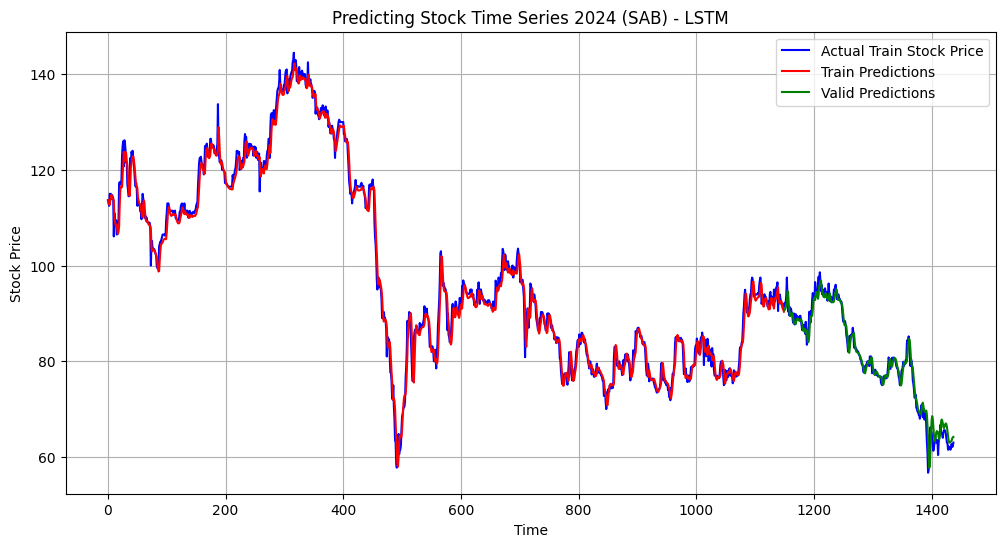

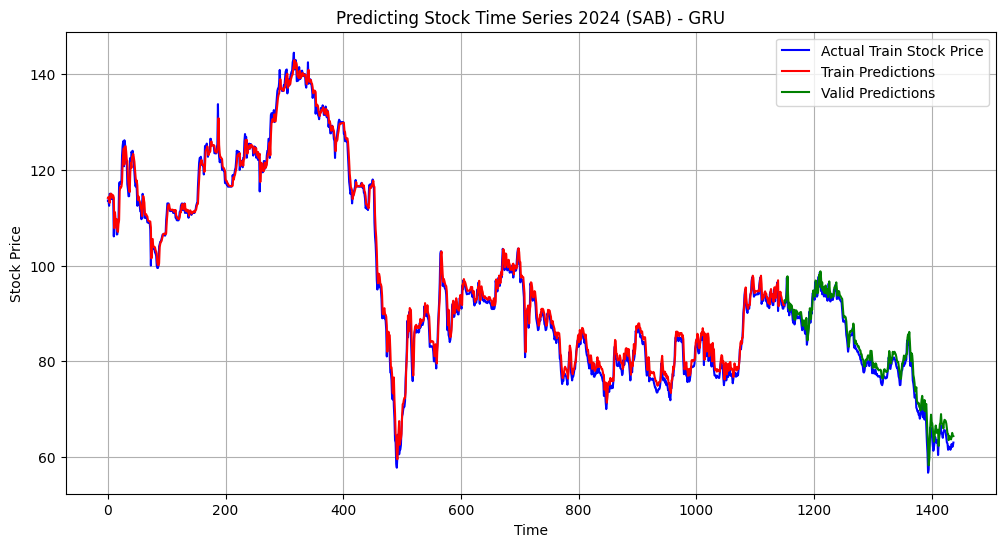

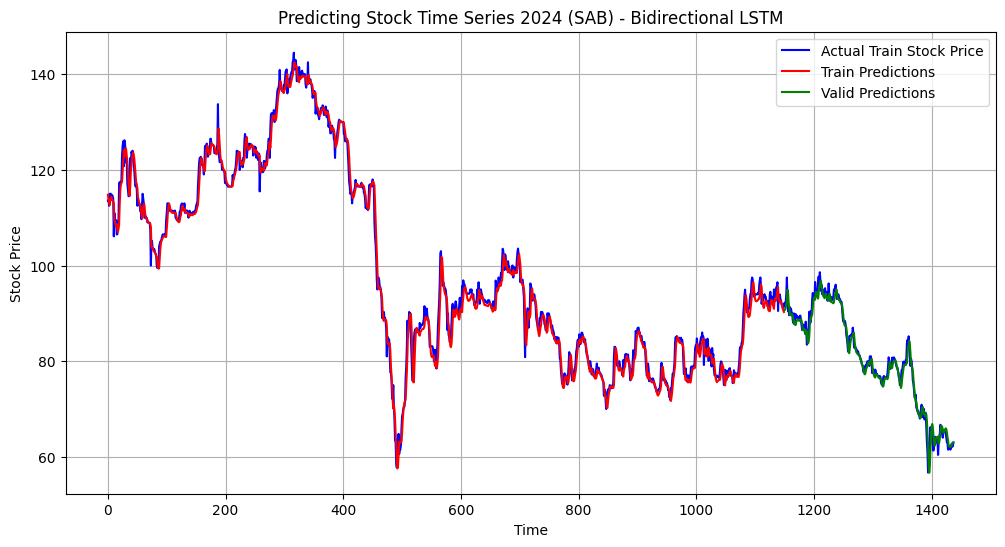

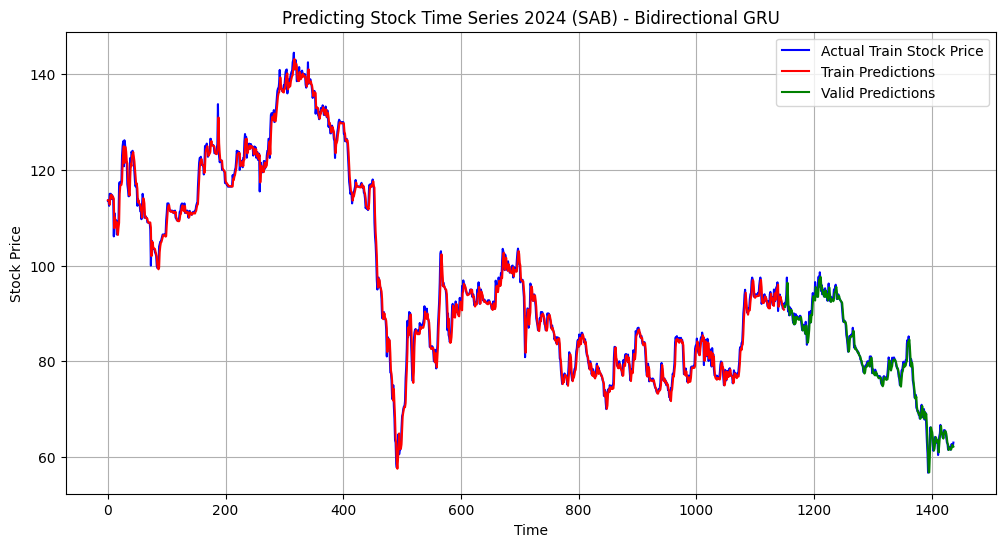

In [197]:
# LSTM Predictions
train_predictions_vn_lstm = predict(lstm_model_vn, X_train_vn)
valid_predictions_vn_lstm = predict(lstm_model_vn, X_test_vn)
train_predictions_sab_lstm = predict(lstm_model_sab, X_train_sab)
valid_predictions_sab_lstm = predict(lstm_model_sab, X_test_sab)

# GRU Predictions
train_predictions_vn_gru = predict(gru_model_vn, X_train_vn)
valid_predictions_vn_gru = predict(gru_model_vn, X_test_vn)
train_predictions_sab_gru = predict(gru_model_sab, X_train_sab)
valid_predictions_sab_gru = predict(gru_model_sab, X_test_sab)

# Bidirectional LSTM Predictions
train_predictions_vn_bilstm = predict(bidirectional_lstm_model_vn, X_train_vn)
valid_predictions_vn_bilstm = predict(bidirectional_lstm_model_vn, X_test_vn)
train_predictions_sab_bilstm = predict(bidirectional_lstm_model_sab, X_train_sab)
valid_predictions_sab_bilstm = predict(bidirectional_lstm_model_sab, X_test_sab)

# Bidirectional GRU Predictions
train_predictions_vn_bigru = predict(bidirectional_gru_model_vn, X_train_vn)
valid_predictions_vn_bigru = predict(bidirectional_gru_model_vn, X_test_vn)
train_predictions_sab_bigru = predict(bidirectional_gru_model_sab, X_train_sab)
valid_predictions_sab_bigru = predict(bidirectional_gru_model_sab, X_test_sab)

# Inverse transform predictions
train_predictions_vn_lstm = scaler_vn.inverse_transform(train_predictions_vn_lstm)
valid_predictions_vn_lstm = scaler_vn.inverse_transform(valid_predictions_vn_lstm)
train_predictions_sab_lstm = scaler_sab.inverse_transform(train_predictions_sab_lstm)
valid_predictions_sab_lstm = scaler_sab.inverse_transform(valid_predictions_sab_lstm)

train_predictions_vn_gru = scaler_vn.inverse_transform(train_predictions_vn_gru)
valid_predictions_vn_gru = scaler_vn.inverse_transform(valid_predictions_vn_gru)
train_predictions_sab_gru = scaler_sab.inverse_transform(train_predictions_sab_gru)
valid_predictions_sab_gru = scaler_sab.inverse_transform(valid_predictions_sab_gru)

train_predictions_vn_bilstm = scaler_vn.inverse_transform(train_predictions_vn_bilstm)
valid_predictions_vn_bilstm = scaler_vn.inverse_transform(valid_predictions_vn_bilstm)
train_predictions_sab_bilstm = scaler_sab.inverse_transform(train_predictions_sab_bilstm)
valid_predictions_sab_bilstm = scaler_sab.inverse_transform(valid_predictions_sab_bilstm)

train_predictions_vn_bigru = scaler_vn.inverse_transform(train_predictions_vn_bigru)
valid_predictions_vn_bigru = scaler_vn.inverse_transform(valid_predictions_vn_bigru)
train_predictions_sab_bigru = scaler_sab.inverse_transform(train_predictions_sab_bigru)
valid_predictions_sab_bigru = scaler_sab.inverse_transform(valid_predictions_sab_bigru)

# Inverse transform actual values for plotting
y_train_vn = scaler_vn.inverse_transform(y_train_vn.reshape(-1, 1))
y_test_vn = scaler_vn.inverse_transform(y_test_vn.reshape(-1, 1))
y_train_sab = scaler_sab.inverse_transform(y_train_sab.reshape(-1, 1))
y_test_sab = scaler_sab.inverse_transform(y_test_sab.reshape(-1, 1))

# Plotting for each model
def plot_comparison(actual_train, actual_valid, train_pred, valid_pred, title):
    plt.figure(figsize=(12, 6))
    plt.plot(actual_train, color='blue', label='Actual Train Stock Price')
    plt.plot(range(len(actual_train), len(actual_train) + len(actual_valid)), actual_valid, color='blue')
    plt.plot(train_pred, color='red', label='Train Predictions')
    plt.plot(range(len(train_pred), len(train_pred) + len(valid_pred)), valid_pred, color='green', label='Valid Predictions')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for VN-Index
plot_comparison(y_train_vn, y_test_vn, train_predictions_vn_lstm, valid_predictions_vn_lstm, 'Predicting Stock Time Series 2024 (VN-Index) - LSTM')
plot_comparison(y_train_vn, y_test_vn, train_predictions_vn_gru, valid_predictions_vn_gru, 'Predicting Stock Time Series 2024 (VN-Index) - GRU')
plot_comparison(y_train_vn, y_test_vn, train_predictions_vn_bilstm, valid_predictions_vn_bilstm, 'Predicting Stock Time Series 2024 (VN-Index) - Bidirectional LSTM')
plot_comparison(y_train_vn, y_test_vn, train_predictions_vn_bigru, valid_predictions_vn_bigru, 'Predicting Stock Time Series 2024 (VN-Index) - Bidirectional GRU')

# Plot for SAB
plot_comparison(y_train_sab, y_test_sab, train_predictions_sab_lstm, valid_predictions_sab_lstm, 'Predicting Stock Time Series 2024 (SAB) - LSTM')
plot_comparison(y_train_sab, y_test_sab, train_predictions_sab_gru, valid_predictions_sab_gru, 'Predicting Stock Time Series 2024 (SAB) - GRU')
plot_comparison(y_train_sab, y_test_sab, train_predictions_sab_bilstm, valid_predictions_sab_bilstm, 'Predicting Stock Time Series 2024 (SAB) - Bidirectional LSTM')
plot_comparison(y_train_sab, y_test_sab, train_predictions_sab_bigru, valid_predictions_sab_bigru, 'Predicting Stock Time Series 2024 (SAB) - Bidirectional GRU')


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense, Bidirectional

# Data preparation
vn_index = pd.read_excel('VN-Index-2018-2023.xlsx')
sab_stock_2018_2022 = pd.read_excel('SAB stock price 2018-2022.xlsx')
sab_stock_2023 = pd.read_excel('SAB stock price 2023.xlsx')
sab_stock = pd.concat([sab_stock_2018_2022, sab_stock_2023])
sab_stock.sort_values('Date', inplace=True)
sab_stock.reset_index(drop=True, inplace=True)

# Preprocess your data (example for VN-Index)
scaler_vn = MinMaxScaler(feature_range=(0, 1))
scaled_data_vn = scaler_vn.fit_transform(vn_index['Close'].values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X_vn, y_vn = create_sequences(scaled_data_vn, seq_length)

# Split data into training and testing
split = int(0.8 * len(X_vn))
X_train_vn, X_test_vn = X_vn[:split], X_vn[split:]
y_train_vn, y_test_vn = y_vn[:split], y_vn[split:]

# Define models
# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, return_sequences=True, input_shape=(X_train_vn.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.summary()

# GRU Model
gru_model = Sequential()
gru_model.add(GRU(64, return_sequences=True, input_shape=(X_train_vn.shape[1], 1)))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(64, return_sequences=True))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(64))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))
gru_model.summary()

# Bidirectional LSTM Model
bidirectional_lstm_model = Sequential()
bidirectional_lstm_model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train_vn.shape[1], 1)))
bidirectional_lstm_model.add(Dropout(0.2))
bidirectional_lstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bidirectional_lstm_model.add(Dropout(0.2))
bidirectional_lstm_model.add(Bidirectional(LSTM(64)))
bidirectional_lstm_model.add(Dropout(0.2))
bidirectional_lstm_model.add(Dense(1))
bidirectional_lstm_model.summary()

# Bidirectional GRU Model
bidirectional_gru_model = Sequential()
bidirectional_gru_model.add(Bidirectional(GRU(64, return_sequences=True), input_shape=(X_train_vn.shape[1], 1)))
bidirectional_gru_model.add(Dropout(0.2))
bidirectional_gru_model.add(Bidirectional(GRU(64, return_sequences=True)))
bidirectional_gru_model.add(Dropout(0.2))
bidirectional_gru_model.add(Bidirectional(GRU(64)))
bidirectional_gru_model.add(Dropout(0.2))
bidirectional_gru_model.add(Dense(1))
bidirectional_gru_model.summary()


/Users/collide0412/grad_prj/.conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 60, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,009 (324.25 KB)

 Trainable params: 83,009 (324.25 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_28 (GRU)                    │ (None, 60, 64)         │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_29 (GRU)                    │ (None, 60, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_30 (GRU)                    │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,849 (245.50 KB)

 Trainable params: 62,849 (245.50 KB)

 Non-trainable params: 0 (0.00 B)

/Users/collide0412/grad_prj/.conda/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_12                │ (None, 60, 128)        │        33,792 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_13                │ (None, 60, 128)        │        98,816 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_14                │ (None, 128)            │        98,816 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,553 (904.50 KB)

 Trainable params: 231,553 (904.50 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_15                │ (None, 60, 128)        │        25,728 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_16                │ (None, 60, 128)        │        74,496 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_17                │ (None, 128)            │        74,496 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,849 (683.00 KB)

 Trainable params: 174,849 (683.00 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense, Bidirectional

# Data preparation
vn_index = pd.read_excel('VN-Index-2018-2023.xlsx')
sab_stock_2018_2022 = pd.read_excel('SAB stock price 2018-2022.xlsx')
sab_stock_2023 = pd.read_excel('SAB stock price 2023.xlsx')
sab_stock = pd.concat([sab_stock_2018_2022, sab_stock_2023])
sab_stock.sort_values('Date', inplace=True)
sab_stock.reset_index(drop=True, inplace=True)

# Preprocess your data (example for VN-Index)
scaler_vn = MinMaxScaler(feature_range=(0, 1))
scaled_data_vn = scaler_vn.fit_transform(vn_index['Close'].values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X_vn, y_vn = create_sequences(scaled_data_vn, seq_length)

# Split data into training and testing
split = int(0.8 * len(X_vn))
X_train_vn, X_test_vn = X_vn[:split], X_vn[split:]
y_train_vn, y_test_vn = y_vn[:split], y_vn[split:]

# Reshape input to be [samples, time steps, features]
X_train_vn = np.reshape(X_train_vn, (X_train_vn.shape[0], X_train_vn.shape[1], 1))
X_test_vn = np.reshape(X_test_vn, (X_test_vn.shape[0], X_test_vn.shape[1], 1))

# Define and train models
def build_and_train_model(model, X_train, y_train, epochs=10, batch_size=32):
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    return model

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, return_sequences=True, input_shape=(X_train_vn.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(64))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model = build_and_train_model(lstm_model, X_train_vn, y_train_vn)

# GRU Model
gru_model = Sequential()
gru_model.add(GRU(64, return_sequences=True, input_shape=(X_train_vn.shape[1], 1)))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(64, return_sequences=True))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(64))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))
gru_model = build_and_train_model(gru_model, X_train_vn, y_train_vn)

# Bidirectional LSTM Model
bidirectional_lstm_model = Sequential()
bidirectional_lstm_model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train_vn.shape[1], 1)))
bidirectional_lstm_model.add(Dropout(0.2))
bidirectional_lstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bidirectional_lstm_model.add(Dropout(0.2))
bidirectional_lstm_model.add(Bidirectional(LSTM(64)))
bidirectional_lstm_model.add(Dropout(0.2))
bidirectional_lstm_model.add(Dense(1))
bidirectional_lstm_model = build_and_train_model(bidirectional_lstm_model, X_train_vn, y_train_vn)

# Bidirectional GRU Model
bidirectional_gru_model = Sequential()
bidirectional_gru_model.add(Bidirectional(GRU(64, return_sequences=True), input_shape=(X_train_vn.shape[1], 1)))
bidirectional_gru_model.add(Dropout(0.2))
bidirectional_gru_model.add(Bidirectional(GRU(64, return_sequences=True)))
bidirectional_gru_model.add(Dropout(0.2))
bidirectional_gru_model.add(Bidirectional(GRU(64)))
bidirectional_gru_model.add(Dropout(0.2))
bidirectional_gru_model.add(Dense(1))
bidirectional_gru_model = build_and_train_model(bidirectional_gru_model, X_train_vn, y_train_vn)

# Make predictions
predicted_lstm_vn = lstm_model.predict(X_test_vn)
predicted_gru_vn = gru_model.predict(X_test_vn)
predicted_bi_lstm_vn = bidirectional_lstm_model.predict(X_test_vn)
predicted_bi_gru_vn = bidirectional_gru_model.predict(X_test_vn)

# Inverse transform predictions to original scale
predicted_lstm_vn = scaler_vn.inverse_transform(predicted_lstm_vn)
predicted_gru_vn = scaler_vn.inverse_transform(predicted_gru_vn)
predicted_bi_lstm_vn = scaler_vn.inverse_transform(predicted_bi_lstm_vn)
predicted_bi_gru_vn = scaler_vn.inverse_transform(predicted_bi_gru_vn)
y_test_vn = scaler_vn.inverse_transform(y_test_vn.reshape(-1, 1))

# Calculate metrics for VN-INDEX
mse_lstm_vn = mean_squared_error(y_test_vn, predicted_lstm_vn)
mse_gru_vn = mean_squared_error(y_test_vn, predicted_gru_vn)
mse_bi_lstm_vn = mean_squared_error(y_test_vn, predicted_bi_lstm_vn)
mse_bi_gru_vn = mean_squared_error(y_test_vn, predicted_bi_gru_vn)

rmse_lstm_vn = np.sqrt(mse_lstm_vn)
rmse_gru_vn = np.sqrt(mse_gru_vn)
rmse_bi_lstm_vn = np.sqrt(mse_bi_lstm_vn)
rmse_bi_gru_vn = np.sqrt(mse_bi_gru_vn)

mae_lstm_vn = mean_absolute_error(y_test_vn, predicted_lstm_vn)
mae_gru_vn = mean_absolute_error(y_test_vn, predicted_gru_vn)
mae_bi_lstm_vn = mean_absolute_error(y_test_vn, predicted_bi_lstm_vn)
mae_bi_gru_vn = mean_absolute_error(y_test_vn, predicted_bi_gru_vn)

# Print the results
print(f"MSE (VN-INDEX) - LSTM: {mse_lstm_vn}, GRU: {mse_gru_vn}, Bidirectional LSTM: {mse_bi_lstm_vn}, Bidirectional GRU: {mse_bi_gru_vn}")
print(f"RMSE (VN-INDEX) - LSTM: {rmse_lstm_vn}, GRU: {rmse_gru_vn}, Bidirectional LSTM: {rmse_bi_lstm_vn}, Bidirectional GRU: {rmse_bi_gru_vn}")
print(f"MAE (VN-INDEX) - LSTM: {mae_lstm_vn}, GRU: {mae_gru_vn}, Bidirectional LSTM: {mae_bi_lstm_vn}, Bidirectional GRU: {mae_bi_gru_vn}")


/Users/collide0412/grad_prj/.conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/collide0412/grad_prj/.conda/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
MSE (VN-INDEX) - LSTM: 2297.6451185636, GRU: 1630.0795106892315, Bidirectional LSTM: 1513.6277839919858, Bidirectional GRU: 1585.821065794887
RMSE (VN-INDEX) - LSTM: 47.93375760947185, GRU: 40.374243159336515, Bidirectional LSTM: 38.90536960359053, Bidirectional GRU: 39.82236891239504
MAE (VN-INDEX) - LSTM: 37.93414596942293, GRU: 30.593597668559624, Bidirectional LSTM: 31.954895676043865, Bidirectional GRU: 31.41632623752627


In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense, Bidirectional
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Data preparation for SAB
sab_stock_2018_2022 = pd.read_excel('SAB stock price 2018-2022.xlsx')
sab_stock_2023 = pd.read_excel('SAB stock price 2023.xlsx')
sab_stock = pd.concat([sab_stock_2018_2022, sab_stock_2023])
sab_stock.sort_values('Date', inplace=True)
sab_stock.reset_index(drop=True, inplace=True)

# Preprocess your data (example for SAB)
scaler_sab = MinMaxScaler(feature_range=(0, 1))
scaled_data_sab = scaler_sab.fit_transform(sab_stock['Close'].values.reshape(-1, 1))

# Create sequences
seq_length = 60
X_sab, y_sab = create_sequences(scaled_data_sab, seq_length)

# Split data into training and testing
split = int(0.8 * len(X_sab))
X_train_sab, X_test_sab = X_sab[:split], X_sab[split:]
y_train_sab, y_test_sab = y_sab[:split], y_sab[split:]

# Define a function to train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, scaler):
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    return mse, rmse, mae

# Train and evaluate LSTM
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_sab, y_train_sab, epochs=100, batch_size=32, verbose=0)
lstm_predictions_sab = lstm_model.predict(X_test_sab)
lstm_predictions_sab = scaler_sab.inverse_transform(lstm_predictions_sab)
y_test_sab = scaler_sab.inverse_transform(y_test_sab.reshape(-1, 1))
mse_lstm_sab = mean_squared_error(y_test_sab, lstm_predictions_sab)
rmse_lstm_sab = np.sqrt(mse_lstm_sab)
mae_lstm_sab = mean_absolute_error(y_test_sab, lstm_predictions_sab)

# Train and evaluate GRU
gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(X_train_sab, y_train_sab, epochs=100, batch_size=32, verbose=0)
gru_predictions_sab = gru_model.predict(X_test_sab)
gru_predictions_sab = scaler_sab.inverse_transform(gru_predictions_sab)
mse_gru_sab = mean_squared_error(y_test_sab, gru_predictions_sab)
rmse_gru_sab = np.sqrt(mse_gru_sab)
mae_gru_sab = mean_absolute_error(y_test_sab, gru_predictions_sab)

# Train and evaluate Bidirectional LSTM
bidirectional_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
bidirectional_lstm_model.fit(X_train_sab, y_train_sab, epochs=100, batch_size=32, verbose=0)
bi_lstm_predictions_sab = bidirectional_lstm_model.predict(X_test_sab)
bi_lstm_predictions_sab = scaler_sab.inverse_transform(bi_lstm_predictions_sab)
mse_bi_lstm_sab = mean_squared_error(y_test_sab, bi_lstm_predictions_sab)
rmse_bi_lstm_sab = np.sqrt(mse_bi_lstm_sab)
mae_bi_lstm_sab = mean_absolute_error(y_test_sab, bi_lstm_predictions_sab)

# Train and evaluate Bidirectional GRU
bidirectional_gru_model.compile(optimizer='adam', loss='mean_squared_error')
bidirectional_gru_model.fit(X_train_sab, y_train_sab, epochs=100, batch_size=32, verbose=0)
bi_gru_predictions_sab = bidirectional_gru_model.predict(X_test_sab)
bi_gru_predictions_sab = scaler_sab.inverse_transform(bi_gru_predictions_sab)
mse_bi_gru_sab = mean_squared_error(y_test_sab, bi_gru_predictions_sab)
rmse_bi_gru_sab = np.sqrt(mse_bi_gru_sab)
mae_bi_gru_sab = mean_absolute_error(y_test_sab, bi_gru_predictions_sab)

# Print results
print(f'MSE (SAB) - LSTM: {mse_lstm_sab}')
print(f'RMSE (SAB) - LSTM: {rmse_lstm_sab}')
print(f'MAE (SAB) - LSTM: {mae_lstm_sab}')

print(f'MSE (SAB) - GRU: {mse_gru_sab}')
print(f'RMSE (SAB) - GRU: {rmse_gru_sab}')
print(f'MAE (SAB) - GRU: {mae_gru_sab}')

print(f'MSE (SAB) - Bidirectional LSTM: {mse_bi_lstm_sab}')
print(f'RMSE (SAB) - Bidirectional LSTM: {rmse_bi_lstm_sab}')
print(f'MAE (SAB) - Bidirectional LSTM: {mae_bi_lstm_sab}')

print(f'MSE (SAB) - Bidirectional GRU: {mse_bi_gru_sab}')
print(f'RMSE (SAB) - Bidirectional GRU: {rmse_bi_gru_sab}')
print(f'MAE (SAB) - Bidirectional GRU: {mae_bi_gru_sab}')


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
MSE (SAB) - LSTM: 2.7287297085681548
RMSE (SAB) - LSTM: 1.6518867117838787
MAE (SAB) - LSTM: 1.2240811056560943
MSE (SAB) - GRU: 1.7504593543857194
RMSE (SAB) - GRU: 1.3230492637788358
MAE (SAB) - GRU: 0.9980523029963179
MSE (SAB) - Bidirectional LSTM: 5.971884336710377
RMSE (SAB) - Bidirectional LSTM: 2.4437439179894396
MAE (SAB) - Bidirectional LSTM: 2.147823672824436
MSE (SAB) - Bidirectional GRU: 4.132904875009467
RMSE (SAB) - Bidirectional GRU: 2.032954715435016
MAE (SAB) - Bidirectional GRU: 1.7328200711144341


In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, GRU, Bidirectional, Dense, Dropout

# Assuming 'scaled_data_vn' is your scaled VN-Index data
# Load your data here if it's not loaded

# Create sequences function
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X_vn, y_vn = create_sequences(scaled_data_vn, seq_length)

# Split data into training and testing
split = int(0.8 * len(X_vn))
X_train_vn, X_test_vn = X_vn[:split], X_vn[split:]
y_train_vn, y_test_vn = y_vn[:split], y_vn[split:]

# Reshape data for model compatibility
X_train_vn = X_train_vn.reshape((X_train_vn.shape[0], X_train_vn.shape[1], 1))
X_test_vn = X_test_vn.reshape((X_test_vn.shape[0], X_test_vn.shape[1], 1))

# Define, compile, and train models
def compile_and_train(model, X_train, y_train, X_test, y_test):
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    return model

# LSTM Model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_vn.shape[1], 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1)
])
lstm_model = compile_and_train(lstm_model, X_train_vn, y_train_vn, X_test_vn, y_test_vn)

# GRU Model
gru_model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train_vn.shape[1], 1)),
    Dropout(0.2),
    GRU(64, return_sequences=True),
    Dropout(0.2),
    GRU(64),
    Dropout(0.2),
    Dense(1)
])
gru_model = compile_and_train(gru_model, X_train_vn, y_train_vn, X_test_vn, y_test_vn)

# Bidirectional LSTM Model
bidirectional_lstm_model = Sequential([
    Bidirectional(LSTM(64,     return_sequences=True), input_shape=(X_train_vn.shape[1], 1)),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(64)),
    Dropout(0.2),
    Dense(1)
])
bidirectional_lstm_model = compile_and_train(bidirectional_lstm_model, X_train_vn, y_train_vn, X_test_vn, y_test_vn)

# Bidirectional GRU Model
bidirectional_gru_model = Sequential([
    Bidirectional(GRU(64, return_sequences=True), input_shape=(X_train_vn.shape[1], 1)),
    Dropout(0.2),
    Bidirectional(GRU(64, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(GRU(64)),
    Dropout(0.2),
    Dense(1)
])
bidirectional_gru_model = compile_and_train(bidirectional_gru_model, X_train_vn, y_train_vn, X_test_vn, y_test_vn)

# Make predictions
y_pred_lstm = lstm_model.predict(X_test_vn)
y_pred_gru = gru_model.predict(X_test_vn)
y_pred_bidirectional_lstm = bidirectional_lstm_model.predict(X_test_vn)
y_pred_bidirectional_gru = bidirectional_gru_model.predict(X_test_vn)

# Calculate RMSE
rmse_lstm = np.sqrt(mean_squared_error(y_test_vn, y_pred_lstm))
rmse_gru = np.sqrt(mean_squared_error(y_test_vn, y_pred_gru))
rmse_bidirectional_lstm = np.sqrt(mean_squared_error(y_test_vn, y_pred_bidirectional_lstm))
rmse_bidirectional_gru = np.sqrt(mean_squared_error(y_test_vn, y_pred_bidirectional_gru))

print(f"RMSE for LSTM: {rmse_lstm}")
print(f"RMSE for GRU: {rmse_gru}")
print(f"RMSE for Bidirectional LSTM: {rmse_bidirectional_lstm}")
print(f"RMSE for Bidirectional GRU: {rmse_bidirectional_gru}")


/Users/collide0412/grad_prj/.conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/collide0412/grad_prj/.conda/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
RMSE for LSTM: 0.029255666038503686
RMSE for GRU: 0.0239900393190402
RMSE for Bidirectional LSTM: 0.02852745105672756
RMSE for Bidirectional GRU: 0.039969230994851716


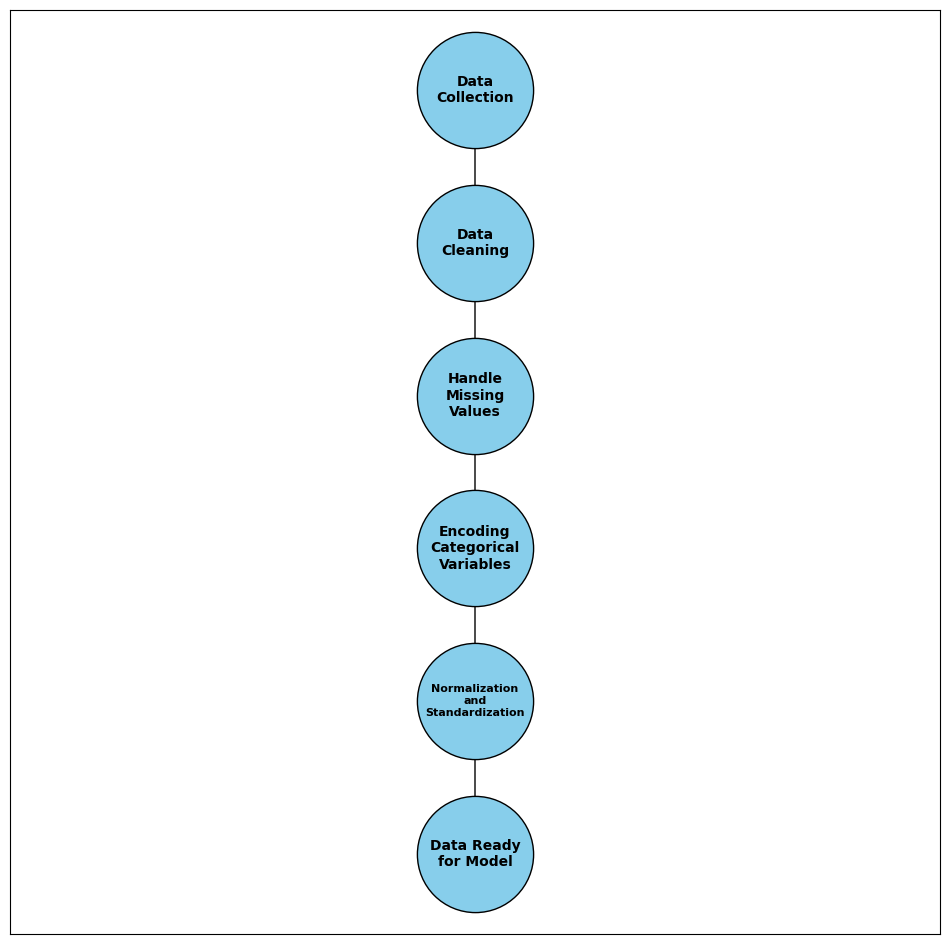

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges for the data preprocessing steps
steps = [
    "Data\nCollection",
    "Data\nCleaning",
    "Handle\nMissing\nValues",
    "Encoding\nCategorical\nVariables",
    "Normalization\nand\nStandardization",
    "Data Ready\nfor Model"
]

edges = [
    (steps[0], steps[1]),
    (steps[1], steps[2]),
    (steps[2], steps[3]),
    (steps[3], steps[4]),
    (steps[4], steps[5])
]

G.add_edges_from(edges)

# Define node positions
pos = {
    steps[0]: (0, 5),
    steps[1]: (0, 4),
    steps[2]: (0, 3),
    steps[3]: (0, 2),
    steps[4]: (0, 1),
    steps[5]: (0, 0)
}

# Draw the nodes and edges
plt.figure(figsize=(12, 12))
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='-|>', arrowsize=20, edge_color='black')

# Draw nodes with text inside the circles
nx.draw_networkx_nodes(G, pos, node_size=7000, node_color="skyblue", edgecolors='black')

# Draw labels for all nodes
for node, (x, y) in pos.items():
    font_size = 10
    if node == "Normalization\nand\nStandardization":
        font_size = 8  # Smaller font size for the long text
    plt.text(x, y, node, ha='center', va='center', fontsize=font_size, fontweight='bold')

# # Add title
# plt.title("Figure 1: Data Preprocessing Overview", fontsize=15)
# plt.axis('off')  # Hide the axes
# plt.show()


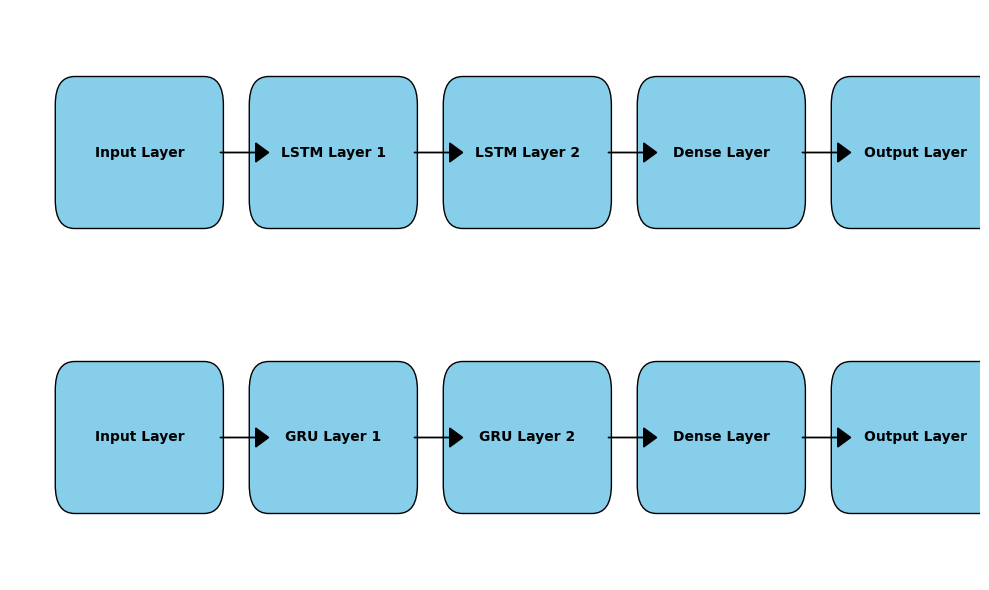

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 6))

# Define the model components with smaller bounding box size and more spacing
components = [
    ("Input Layer", (0, 6)),
    ("LSTM Layer 1", (3, 6)),
    ("LSTM Layer 2", (6, 6)),
    ("Dense Layer", (9, 6)),
    ("Output Layer", (12, 6)),
    ("Input Layer", (0, 3)),
    ("GRU Layer 1", (3, 3)),
    ("GRU Layer 2", (6, 3)),
    ("Dense Layer", (9, 3)),
    ("Output Layer", (12, 3))
]

# Draw rectangles for each component with smaller size and more spacing
for label, (x, y) in components:
    rect = patches.FancyBboxPatch((x, y), 2, 1, boxstyle="round,pad=0.3", edgecolor='black', facecolor='skyblue')
    ax.add_patch(rect)
    plt.text(x + 1, y + 0.5, label, ha='center', va='center', fontsize=10, fontweight='bold')

# Add arrows between components
arrow_length = 0.75  # Adjusted arrow length
for i in range(4):
    start = components[i][1]
    end = components[i + 1][1]
    ax.arrow(start[0] + 2.25, start[1] + 0.5, arrow_length, 0, head_width=0.2, head_length=0.2, fc='black', ec='black', length_includes_head=True)
    start = components[i + 5][1]
    end = components[i + 6][1]
    ax.arrow(start[0] + 2.25, start[1] + 0.5, arrow_length, 0, head_width=0.2, head_length=0.2, fc='black', ec='black', length_includes_head=True)

# Set the limits and hide the axes
ax.set_xlim(-1, 14)
ax.set_ylim(2, 8)
ax.axis('off')

# # Add the title
# plt.title("Figure 2: Model Architecture of LSTM and GRU", fontsize=15)

# Center the figure
fig.tight_layout()

# Show the plot
plt.show()


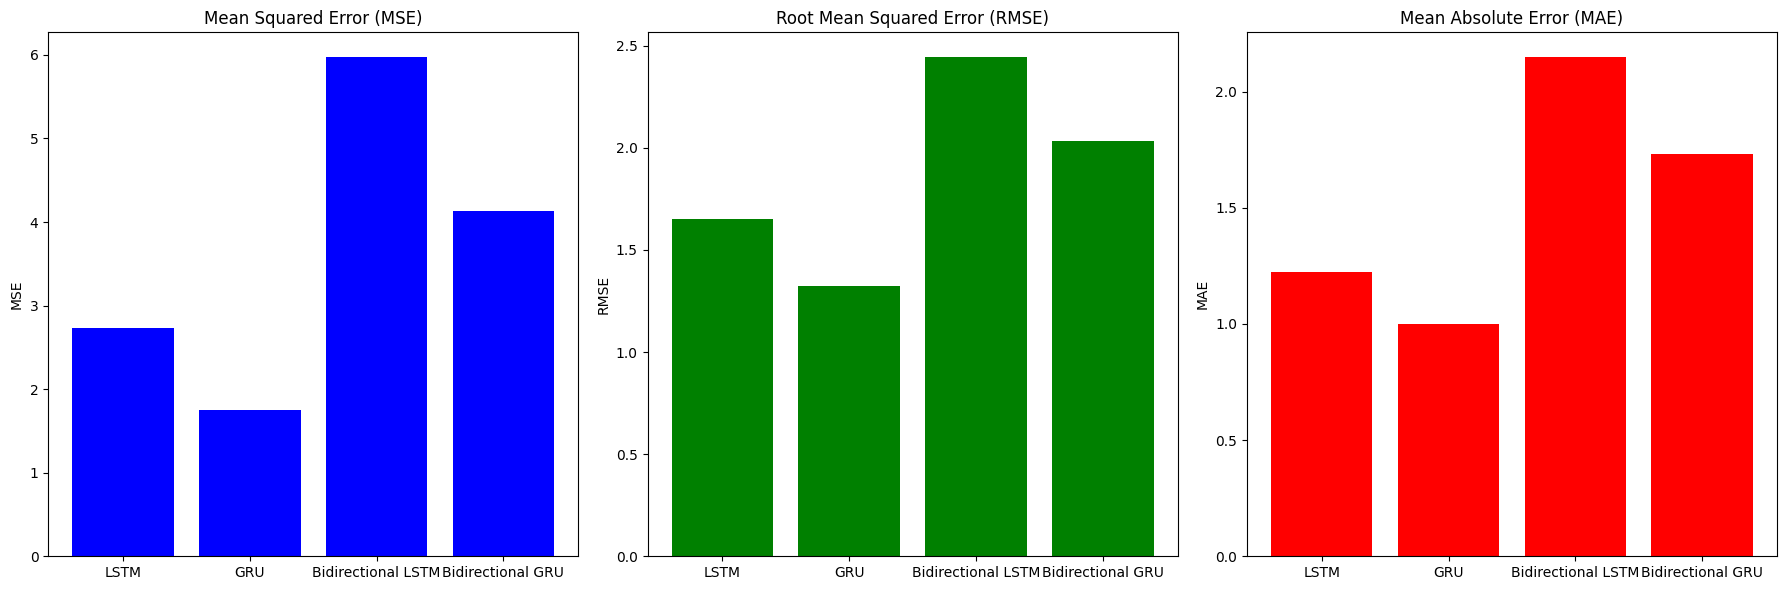

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense, Bidirectional
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming the required data preprocessing and model training has been done...

# Results from previous calculations
results = {
    'LSTM': {'MSE': 2.7287297085681548, 'RMSE': 1.6518867117838787, 'MAE': 1.2240811056560943},
    'GRU': {'MSE': 1.7504593543857194, 'RMSE': 1.3230492637788358, 'MAE': 0.9980523029963179},
    'Bidirectional LSTM': {'MSE': 5.971884336710377, 'RMSE': 2.4437439179894396, 'MAE': 2.147823672824436},
    'Bidirectional GRU': {'MSE': 4.132904875009467, 'RMSE': 2.032954715435016, 'MAE': 1.7328200711144341}
}

# Extract data for plotting
models = list(results.keys())
mse = [results[model]['MSE'] for model in models]
rmse = [results[model]['RMSE'] for model in models]
mae = [results[model]['MAE'] for model in models]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot MSE
axes[0].bar(models, mse, color='blue')
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_ylabel('MSE')

# Plot RMSE
axes[1].bar(models, rmse, color='green')
axes[1].set_title('Root Mean Squared Error (RMSE)')
axes[1].set_ylabel('RMSE')

# Plot MAE
axes[2].bar(models, mae, color='red')
axes[2].set_title('Mean Absolute Error (MAE)')
axes[2].set_ylabel('MAE')

# Display the plot
plt.tight_layout()
plt.savefig('model_performance_metrics.png')
plt.show()



In [39]:
import pandas as pd

# Load the datasets
beverage_data = pd.read_excel('Beverage manufacturing data.xlsx')
ma30_data = pd.read_excel('MA30.xlsx')
sab_data = pd.read_excel('SAB data.xlsx')
vn_index_2023 = pd.read_excel('VN-index 2023.xlsx')
vn_index_2018_2023 = pd.read_excel('VN-Index-2018-2023.xlsx')
sab_stock_2018_2022 = pd.read_excel('SAB stock price 2018-2022.xlsx')
sab_stock_2023 = pd.read_excel('SAB stock price 2023.xlsx')

# Display the column names of each dataset
print("Beverage manufacturing data columns:", beverage_data.columns)
print("MA30 data columns:", ma30_data.columns)
print("SAB data columns:", sab_data.columns)
print("VN-index 2023 columns:", vn_index_2023.columns)
print("VN-Index-2018-2023 columns:", vn_index_2018_2023.columns)
print("SAB stock price 2018-2022 columns:", sab_stock_2018_2022.columns)
print("SAB stock price 2023 columns:", sab_stock_2023.columns)


Beverage manufacturing data columns: Index(['Indicator', 'Company', 'Year', 'Value', 'Category', 'Category 2'], dtype='object')
MA30 data columns: Index(['Date', 'VN-INDEX', 'SAB', 'MA30 (VN-INDEX)', 'MA30 (SAB)'], dtype='object')
SAB data columns: Index(['Indicator', 'Unit', 'Year', 'SAB', 'Category', 'Category 2'], dtype='object')
VN-index 2023 columns: Index(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'], dtype='object')
VN-Index-2018-2023 columns: Index(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'], dtype='object')
SAB stock price 2018-2022 columns: Index(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'], dtype='object')
SAB stock price 2023 columns: Index(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'], dtype='object')


In [42]:
# Extract key financial indicators from the beverage data
key_indicators_beverage = beverage_data[['Indicator', 'Company', 'Year', 'Value', 'Category', 'Category 2']]

# Extract key financial indicators from the SAB data (adjusted column names)
key_indicators_sab = sab_data[['Indicator', 'Year', 'SAB', 'Category', 'Category 2']]
key_indicators_sab.columns = ['Indicator', 'Year', 'Value', 'Category', 'Category 2']
key_indicators_sab['Company'] = 'SAB'

# Combine the extracted key financial indicators
key_indicators = pd.concat([key_indicators_beverage, key_indicators_sab])

# Define the key indicators
main_indicators = [
    'Total assets', 'Total liabilities', 'Net profit after tax', 
    'Gross profit', 'Revenue', 'Operating profit'
]

# Filter the dataset for the main indicators
filtered_indicators = key_indicators[key_indicators['Indicator'].isin(main_indicators)]

# Create the summary table
summary_table = filtered_indicators.pivot_table(index=['Company', 'Year'], columns='Indicator', values='Value', aggfunc='sum').reset_index()

# Save the summary table to a CSV file
summary_table.to_csv('key_financial_indicators_summary.csv', index=False)

# Display the summary table
print(summary_table)


Indicator Company  Year  Gross profit  Total assets
0             BHN  2020        -19.44         -1.13
1             BHN  2021        -14.31         -7.76
2             BHN  2022         36.35          2.05
3             HAD  2020         -1.30         -8.75
4             HAD  2021        -26.06         -3.31
5             HAD  2022         46.09          5.19
6             HAT  2020        -20.08          5.38
7             HAT  2021        -49.50        -20.46
8             HAT  2022        252.21         36.53
9             SAB  2020        -21.98          3.06
10            SAB  2021        -21.00         22.74
11            SAB  2022         83.12         26.10
12            SCD  2020        -42.98         65.53
13            SCD  2021        -49.83         -9.37
14            SCD  2022         58.54         60.95
15            SMB  2020         -7.71          0.83
16            SMB  2021          1.24         16.54
17            SMB  2022         18.44          4.42
18          

In [6]:
from graphviz import Digraph
from IPython.display import Image

# Function to create and render LSTM model diagram
def plot_lstm_model():
    dot = Digraph()

    dot.node('A', 'Input Layer', shape='box', style='filled', color='lightblue')
    dot.node('B', 'LSTM Layer 1', shape='box', style='filled', color='lightblue')
    dot.node('C', 'LSTM Layer 2', shape='box', style='filled', color='lightblue')
    dot.node('D', 'Dense Layer', shape='box', style='filled', color='lightblue')
    dot.node('E', 'Output Layer', shape='box', style='filled', color='lightblue')

    dot.edges(['AB', 'BC', 'CD', 'DE'])

    dot.render('lstm_model_architecture', format='png', cleanup=False)
    return Image(filename='lstm_model_architecture.png')

# Function to create and render GRU model diagram
def plot_gru_model():
    dot = Digraph()

    dot.node('A', 'Input Layer', shape='box', style='filled', color='lightblue')
    dot.node('B', 'GRU Layer 1', shape='box', style='filled', color='lightblue')
    dot.node('C', 'GRU Layer 2', shape='box', style='filled', color='lightblue')
    dot.node('D', 'Dense Layer', shape='box', style='filled', color='lightblue')
    dot.node('E', 'Output Layer', shape='box', style='filled', color='lightblue')

    dot.edges(['AB', 'BC', 'CD', 'DE'])

    dot.render('gru_model_architecture', format='png', cleanup=False)
    return Image(filename='gru_model_architecture.png')

# Function to create and render Bidirectional LSTM model diagram
def plot_bidirectional_lstm_model():
    dot = Digraph()

    dot.node('A', 'Input Layer', shape='box', style='filled', color='lightblue')
    dot.node('B', 'Bidirectional LSTM Layer 1', shape='box', style='filled', color='lightblue')
    dot.node('C', 'Bidirectional LSTM Layer 2', shape='box', style='filled', color='lightblue')
    dot.node('D', 'Dense Layer', shape='box', style='filled', color='lightblue')
    dot.node('E', 'Output Layer', shape='box', style='filled', color='lightblue')

    dot.edges(['AB', 'BC', 'CD', 'DE'])

    dot.render('bidirectional_lstm_model_architecture', format='png', cleanup=False)
    return Image(filename='bidirectional_lstm_model_architecture.png')

# Function to create and render Bidirectional GRU model diagram
def plot_bidirectional_gru_model():
    dot = Digraph()

    dot.node('A', 'Input Layer', shape='box', style='filled', color='lightblue')
    dot.node('B', 'Bidirectional GRU Layer 1', shape='box', style='filled', color='lightblue')
    dot.node('C', 'Bidirectional GRU Layer 2', shape='box', style='filled', color='lightblue')
    dot.node('D', 'Dense Layer', shape='box', style='filled', color='lightblue')
    dot.node('E', 'Output Layer', shape='box', style='filled', color='lightblue')

    dot.edges(['AB', 'BC', 'CD', 'DE'])

    dot.render('bidirectional_gru_model_architecture', format='png', cleanup=False)
    return Image(filename='bidirectional_gru_model_architecture.png')

# Display all diagrams
lstm_img = plot_lstm_model()
gru_img = plot_gru_model()
bi_lstm_img = plot_bidirectional_lstm_model()
bi_gru_img = plot_bidirectional_gru_model()

lstm_img, gru_img, bi_lstm_img, bi_gru_img


(<IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>)

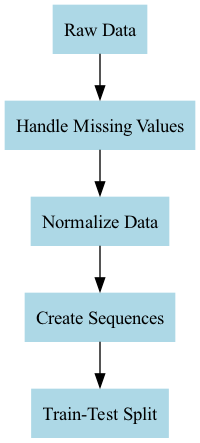

In [10]:
from graphviz import Digraph
from IPython.display import Image

# Create a Digraph object
dot = Digraph()

# Add nodes
dot.node('A', 'Raw Data', shape='box', style='filled', color='lightblue')
dot.node('B', 'Handle Missing Values', shape='box', style='filled', color='lightblue')
dot.node('C', 'Normalize Data', shape='box', style='filled', color='lightblue')
dot.node('D', 'Create Sequences', shape='box', style='filled', color='lightblue')
dot.node('E', 'Train-Test Split', shape='box', style='filled', color='lightblue')

# Add edges
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'D')
dot.edge('D', 'E')

# Render and display the flowchart
dot.render('preprocessing_flowchart', format='png', cleanup=False)
Image(filename='preprocessing_flowchart.png')


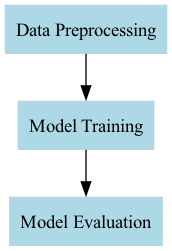

In [11]:
# Create a Digraph object
dot = Digraph()

# Add nodes
dot.node('A', 'Data Preprocessing', shape='box', style='filled', color='lightblue')
dot.node('B', 'Model Training', shape='box', style='filled', color='lightblue')
dot.node('C', 'Model Evaluation', shape='box', style='filled', color='lightblue')

# Add edges
dot.edge('A', 'B')
dot.edge('B', 'C')

# Render and display the flowchart
dot.render('model_training_evaluation_flowchart', format='png', cleanup=False)
Image(filename='model_training_evaluation_flowchart.png')


In [56]:
# Print the column names to verify the correct ones
print(beverage_data.columns)

# Assuming 'Indicator' represents Gross Profit and Total Assets, we filter those rows
key_indicators = beverage_data[(beverage_data['Indicator'].str.contains('Gross profit')) | (beverage_data['Indicator'].str.contains('Total assets'))]

# Pivot the table to get columns for Gross Profit and Total Assets
pivot_table = key_indicators.pivot_table(index=['Company', 'Year'], columns='Indicator', values='Value').reset_index()

# Calculate descriptive statistics
descriptive_stats = pivot_table.describe()

# Display the table
descriptive_stats

Index(['Indicator', 'Company', 'Year', 'Value', 'Category', 'Category 2'], dtype='object')


Indicator,Year,5. Gross profit,Fixed assets/Total assets,Gross profit,Gross profit margin,Long-term assets/Total assets,Short-term assets/Total assets,Total assets
count,27.00000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2021.00000,1360.333333,25.352593,0.718889,19.847037,36.005926,63.994074,5.690000
std,0.83205,2842.998147,10.964164,58.596533,9.117338,16.194499,16.194499,19.996656
min,2020.00000,6.000000,9.340000,-67.960000,3.160000,15.950000,17.020000,-20.460000
25%,2020.00000,35.000000,16.555000,-24.160000,11.455000,24.500000,57.935000,-5.980000
50%,2021.00000,171.000000,22.010000,-10.990000,24.350000,31.760000,68.240000,1.800000
75%,2022.00000,722.500000,32.315000,4.610000,26.730000,42.065000,75.500000,7.570000
max,2022.00000,10771.000000,47.520000,252.210000,30.790000,82.980000,84.050000,65.530000


In [58]:
import pandas as pd

# Assuming 'beverage_data' is the dataframe containing your dataset

# Filter the necessary columns
filtered_data = beverage_data[['Year', 'Value', 'Indicator']]

# Pivot the data to get 'Value' for different indicators
pivot_table = filtered_data.pivot_table(index='Year', columns='Indicator', values='Value')

# Calculate descriptive statistics
descriptive_stats = pivot_table.describe()

# Display the table in a Jupyter notebook
%pip install Jinja2
descriptive_stats.style.set_table_attributes("style='display:inline'").set_caption('Table 2: Descriptive Statistics')

# Save the descriptive statistics to an HTML file for better visualization
descriptive_stats.to_html("descriptive_statistics.html")

descriptive_stats


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 222.9 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Indicator,(Increase)/decrease in inventories,(Increase)/decrease in prepaid expenses,(Increase)/decrease in receivables,(Reversal of provisions)/provisions,"1. Payment for fixed assets, constructions and other long-term assets",1. Profit before tax,1. Revenue,10. General and administrative expenses,11. Operating profit,12. Other income,...,- Common stock with voting right,- Cost,- Undistributed earnings in this period,1. Owner's capital,1. Tangible fixed assets,11. Undistributed earnings after tax,2. Financial leased fixed assets,3. Intangible fixed assets,- Accumulated depreciation,- Cost
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000
mean,-21.819444,7.809524,10.527778,-22.211111,-78.939815,818.037037,4905.888889,155.888889,799.222222,26.134259,...,1079.111111,45.833333,601.703704,1079.111111,724.148148,1769.074074,169.000000,140.285714,-889.55000,1283.483333
std,96.052161,18.945455,106.480667,42.883956,21.378543,131.110374,645.287255,15.456430,126.550434,17.870636,...,0.000000,29.954479,107.695348,0.000000,72.488171,170.680567,8.185353,10.776960,55.03299,23.239101
min,-116.125000,-5.500000,-95.625000,-59.800000,-103.625000,666.666667,4367.888889,139.666667,654.333333,13.777778,...,1079.111111,23.000000,477.555556,1079.111111,664.666667,1660.111111,162.000000,128.000000,-943.45000,1264.500000
25%,-70.673611,-3.035714,-42.875000,-45.566667,-85.187500,779.055556,4548.166667,148.611111,754.777778,15.888889,...,1079.111111,28.875000,567.555556,1079.111111,683.777778,1670.722222,164.500000,136.357143,-917.60000,1270.525000
50%,-25.222222,-0.571429,9.875000,-31.333333,-66.750000,891.444444,4728.444444,157.555556,855.222222,18.000000,...,1079.111111,34.750000,657.555556,1079.111111,702.888889,1681.333333,167.000000,144.714286,-891.75000,1276.550000
75%,25.333333,14.464286,63.604167,-3.416667,-66.597222,893.722222,5174.888889,164.000000,871.666667,32.312500,...,1079.111111,57.250000,663.777778,1079.111111,753.888889,1823.555556,172.500000,146.428571,-862.60000,1292.975000
max,75.888889,29.500000,117.333333,24.500000,-66.444444,896.000000,5621.333333,170.444444,888.111111,46.625000,...,1079.111111,79.750000,670.000000,1079.111111,804.888889,1965.777778,178.000000,148.142857,-833.45000,1309.400000


In [63]:
# Select a subset of key indicators based on the provided data
key_indicators = [
    'Gross profit',
    'Total assets',
    'Net revenue',
    'Operating profit',
    'Net profit after tax',
    'Gross profit margin',
    'ROA',
    'ROE',
    'Debt to equity'
]

# Filter the data for key indicators
filtered_data = beverage_data[beverage_data['Indicator'].isin(key_indicators)]

# Pivot the data to get 'Value' for different indicators
pivot_table = filtered_data.pivot_table(index='Year', columns='Indicator', values='Value')

# Calculate descriptive statistics for the key indicators
descriptive_stats = pivot_table.describe()

# Select only essential statistics (mean, std, min, max)
essential_stats = descriptive_stats.loc[['mean', 'std', 'min', 'max']]

# Display the essential descriptive statistics table
print(essential_stats)


Indicator  Debt to equity  Gross profit  Gross profit margin  Net revenue  \
mean            32.792963      0.718889            19.847037     0.514444   
std             30.034726     35.171263             1.410885    24.586093   
min              5.582222    -25.656667            18.728889   -15.312222   
max             65.020000     40.651111            21.432222    28.838889   

Indicator        ROA        ROE  Total assets  
mean        8.197778  11.774444      5.690000  
std         2.605647   4.444736      7.506447  
min         6.047778   8.327778     -1.448889  
max        11.095556  16.791111     13.516667  


In [1]:
x = 'Financial Performance Analysis and AI-Based Stock Price Prediction of Sabeco'
x.upper()

'FINANCIAL PERFORMANCE ANALYSIS AND AI-BASED STOCK PRICE PREDICTION OF SABECO'